 # MACHINE LEARNING PROJECT

### 1. Import libraries

In [1]:
# Import all libraries used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


### 2. Load the dataset

In [2]:
# Read the mixed_playlist data
data = pd.read_csv('data/mixed_playlist.csv')
# Create a copy of the data frame for the second part (predicting the year)
data_copy = data.copy()
# Print the data to check if it has been uploaded correctly
data.head()

name  \
0  Variations on a Polish Theme, Op. 10: No. 5 An...   
1  Je vous trouve un charme fou - En duo avec Gaë...   
2                                           Me Gusta   
3                               L’amour en Solitaire   
4                                     Goodnight Moon   

                                   album             artist release_date  \
0       Szymanowski: Piano Works, Vol. 2  Karol Szymanowski   06/12/1996   
1  Il suffit d'y croire (Version deluxe)              Hoshi   2018-11-30   
2                            On ira où ?                DTF   2019-10-11   
3                   Petite Amie (Deluxe)   Juliette Armanet   2018-02-02   
4                                  Volta    Boogie Belgique   2016-09-23   

   length  popularity  acousticness  danceability   energy  instrumentalness  \
0   76933          53        0.9960         0.329  0.00695          0.866000   
1  172626          62        0.6220         0.615  0.59900          0.000008   
2  175269          72        0.4130         0.834  0.73400          0.000040   
3  175266           0        0.4040         0.797  0.50600          0.000153   
4  264735          53        0.0616         0.788  0.67500          0.711000   

   ...  speechiness    tempo  valence  time_signature  key  mode  \
0  ...       0.0448   70.295    0.238               4   11     0   
1  ...       0.2530   86.976    0.626               4    1     1   
2  ...       0.3410   89.989    0.356               4    6     0   
3  ...       0.0327  128.027    0.539               4    5     0   
4  ...       0.0318  107.993    0.525               4    7     0   

                                    uri  release_year top_year     user  
0  spotify:track:3bcdLMrAxrfn5dxInjIdI2          1996  unknown  unknown  
1  spotify:track:0C2yaSWVgCUiiqPyYxSOkd          2018     2022    delta  
2  spotify:track:6P3FBaZfUjeWYExU2ShaPZ          2019     2020    gamma  
3  spotify:track:2tn51grfchxArwPXeXkoX5          2018     2018    gamma  
4  spotify:track:2rvo9Ddv18aRV0OJldhWTf          2016     2020    alpha  

[5 rows x 22 columns]

In [3]:
#Read the data from each year for each user
users = ['alpha', 'beta', 'delta', 'epsilon', 'gamma', 'zeta']

# Function to read CSV files for each user and saves the information in a dictionary
def read_user_databases(user):
    user_data = {}
    for year in range(2016, 2023):
        file_path = f"data/recovered_data/user_{user}/user_{user}_{year}.csv"
        try:
            df = pd.read_csv(file_path)  # Read CSV file for each year
            user_data[year] = df  # Store DataFrame in a dictionary using year as key
        except FileNotFoundError:
            print(f"File not found for {user} in year {year}")
    return user_data

# Read databases for all users
all_users_data = {}
for user in users:
    all_users_data[user] = read_user_databases(user)


File not found for zeta in year 2016
File not found for zeta in year 2017
File not found for zeta in year 2018
File not found for zeta in year 2019


### 3. Exploratory Data Analysis

In [4]:
#Description of the data
data.describe()

length   popularity  acousticness  danceability       energy  \
count  3.899000e+03  3899.000000   3899.000000   3899.000000  3899.000000   
mean   2.438545e+05    31.931521      0.425282      0.554342     0.522426   
std    1.051106e+05    24.938656      0.363239      0.192042     0.265516   
min    0.000000e+00     0.000000      0.000001      0.000000     0.000545   
25%    1.878725e+05     1.000000      0.057900      0.424000     0.312000   
50%    2.241330e+05    34.000000      0.339000      0.575000     0.547000   
75%    2.743165e+05    51.000000      0.793000      0.700000     0.738000   
max    1.921683e+06    91.000000      0.996000      0.971000     0.995000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       3899.000000  3899.000000  3899.000000  3899.000000  3899.000000   
mean           0.298067     0.167223   -10.454061     0.085069   115.836808   
std            0.387045     0.143566     6.221795     0.092619    28.683508   
min            0.000000     0.017900   -42.117000     0.000000     0.000000   
25%            0.000004     0.094500   -12.837500     0.036800    94.554500   
50%            0.005820     0.112000    -8.599000     0.047000   115.241000   
75%            0.774000     0.172000    -6.225000     0.086500   131.984500   
max            0.995000     0.991000     0.532000     0.952000   209.596000   

           valence  time_signature          key         mode  release_year  
count  3899.000000     3899.000000  3899.000000  3899.000000   3899.000000  
mean      0.384133        3.873044     5.298025     0.467556   2008.102077  
std       0.254657        0.467562     3.505024     0.499010     97.161336  
min       0.000000        0.000000     0.000000     0.000000      0.000000  
25%       0.160000        4.000000     2.000000     0.000000   2012.000000  
50%       0.355000        4.000000     5.000000     0.000000   2016.000000  
75%       0.572000        4.000000     8.000000     1.000000   2018.000000  
max       0.981000        5.000000    11.000000     1.000000   2022.000000

In [5]:
#Columns name of the data
data.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'time_signature', 'key', 'mode', 'uri', 'release_year', 'top_year',
       'user'],
      dtype='object')

In [6]:
#Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3890 non-null   object 
 1   album             3890 non-null   object 
 2   artist            3899 non-null   object 
 3   release_date      3899 non-null   object 
 4   length            3899 non-null   int64  
 5   popularity        3899 non-null   int64  
 6   acousticness      3899 non-null   float64
 7   danceability      3899 non-null   float64
 8   energy            3899 non-null   float64
 9   instrumentalness  3899 non-null   float64
 10  liveness          3899 non-null   float64
 11  loudness          3899 non-null   float64
 12  speechiness       3899 non-null   float64
 13  tempo             3899 non-null   float64
 14  valence           3899 non-null   float64
 15  time_signature    3899 non-null   int64  
 16  key               3899 non-null   int64  


### 4. Pre-processing data

In [7]:
# Calculate total length for each year from 2016 to 2022 across all users
for year in range(2016, 2023):
    total_length_for_year = 0

    for user_data in all_users_data.values():
        if year in user_data:
            total_length_for_year += len(user_data[year])

    print(f"Total length of all DataFrames for year {year}: {total_length_for_year}")
print(f"Total length of the mixed_playlist: {len(data)}")


Total length of all DataFrames for year 2016: 500
Total length of all DataFrames for year 2017: 500
Total length of all DataFrames for year 2018: 500
Total length of all DataFrames for year 2019: 500
Total length of all DataFrames for year 2020: 600
Total length of all DataFrames for year 2021: 600
Total length of all DataFrames for year 2022: 599
Total length of the mixed_playlist: 3899


As we can see there is in total 3799 data across all users, so this means there are 100 songs that need to be assigned to one user and one year.

In [8]:
import itertools

# Generate combinations of all databases
databases = list(all_users_data.values())
combinations = list(itertools.combinations(databases, 2))  # Generate all possible combinations of 2 databases

columns_to_compare = ['name', 'album']  # Adjust this list to include the columns you want to compare

all_different = True

# Iterate through combinations and check if selected columns in DataFrames are equal for any pair of databases
for combination in combinations:
    db1 = combination[0]
    db2 = combination[1]

    for year in range(2016, 2023):
        for user in db1.keys():
            if year in db1[user] and year in db2[user]:
                for col in columns_to_compare:
                    if not db1[user][year][col].equals(db2[user][year][col]):
                        all_different = False
                        break  # Exit the loop if any pair of selected columns are found to be equal
                if not all_different:
                    break  # Exit the loop if any pair of selected columns are found to be equal
            else:
                break
        if not all_different:
            break  # Exit the loop if any pair of selected columns are found to be equal

# Print the result
print(f"All selected columns across databases are different: {all_different}")


All selected columns across databases are different: True


Every user has different songs for every year. Threre are no repeated songs in the playlists.

In [9]:
# drop NA values 
data.dropna(inplace=True)

# Remove duplicates for the mixed_playlist
data.drop_duplicates(inplace=True)

In [10]:
# display the correlation matrix between numeric variables
corr = data.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

There is strong correlation between loudness and energy, so fo this case loudness will be removed from the dataframe

In [11]:
#remove the  loudness feature 
data.drop(columns = 'loudness', inplace = True)
data.head()

name  \
0  Variations on a Polish Theme, Op. 10: No. 5 An...   
1  Je vous trouve un charme fou - En duo avec Gaë...   
2                                           Me Gusta   
3                               L’amour en Solitaire   
4                                     Goodnight Moon   

                                   album             artist release_date  \
0       Szymanowski: Piano Works, Vol. 2  Karol Szymanowski   06/12/1996   
1  Il suffit d'y croire (Version deluxe)              Hoshi   2018-11-30   
2                            On ira où ?                DTF   2019-10-11   
3                   Petite Amie (Deluxe)   Juliette Armanet   2018-02-02   
4                                  Volta    Boogie Belgique   2016-09-23   

   length  popularity  acousticness  danceability   energy  instrumentalness  \
0   76933          53        0.9960         0.329  0.00695          0.866000   
1  172626          62        0.6220         0.615  0.59900          0.000008   
2  175269          72        0.4130         0.834  0.73400          0.000040   
3  175266           0        0.4040         0.797  0.50600          0.000153   
4  264735          53        0.0616         0.788  0.67500          0.711000   

   ...  speechiness    tempo  valence  time_signature  key  mode  \
0  ...       0.0448   70.295    0.238               4   11     0   
1  ...       0.2530   86.976    0.626               4    1     1   
2  ...       0.3410   89.989    0.356               4    6     0   
3  ...       0.0327  128.027    0.539               4    5     0   
4  ...       0.0318  107.993    0.525               4    7     0   

                                    uri release_year  top_year     user  
0  spotify:track:3bcdLMrAxrfn5dxInjIdI2         1996   unknown  unknown  
1  spotify:track:0C2yaSWVgCUiiqPyYxSOkd         2018      2022    delta  
2  spotify:track:6P3FBaZfUjeWYExU2ShaPZ         2019      2020    gamma  
3  spotify:track:2tn51grfchxArwPXeXkoX5         2018      2018    gamma  
4  spotify:track:2rvo9Ddv18aRV0OJldhWTf         2016      2020    alpha  

[5 rows x 21 columns]

In [12]:
#Create a new object LabelEncoder
label_encoder = LabelEncoder()

# Use the label encoder to encode name, artiste and albums in order to use it in the classification
data['name'] = label_encoder.fit_transform(data['name'])
data['artist'] = label_encoder.fit_transform(data['artist'])
data['album'] = label_encoder.fit_transform(data['album'])

#Show the first rows 
data.head()

name  album  artist release_date  length  popularity  acousticness  \
0  2825   1732     682   06/12/1996   76933          53        0.9960   
1  1279    858     543   2018-11-30  172626          62        0.6220   
2  1655   1316     274   2019-10-11  175269          72        0.4130   
3  1592   1373     661   2018-02-02  175266           0        0.4040   
4   971   1990     169   2016-09-23  264735          53        0.0616   

   danceability   energy  instrumentalness  ...  speechiness    tempo  \
0         0.329  0.00695          0.866000  ...       0.0448   70.295   
1         0.615  0.59900          0.000008  ...       0.2530   86.976   
2         0.834  0.73400          0.000040  ...       0.3410   89.989   
3         0.797  0.50600          0.000153  ...       0.0327  128.027   
4         0.788  0.67500          0.711000  ...       0.0318  107.993   

   valence  time_signature  key  mode                                   uri  \
0    0.238               4   11     0  spotify:track:3bcdLMrAxrfn5dxInjIdI2   
1    0.626               4    1     1  spotify:track:0C2yaSWVgCUiiqPyYxSOkd   
2    0.356               4    6     0  spotify:track:6P3FBaZfUjeWYExU2ShaPZ   
3    0.539               4    5     0  spotify:track:2tn51grfchxArwPXeXkoX5   
4    0.525               4    7     0  spotify:track:2rvo9Ddv18aRV0OJldhWTf   

  release_year  top_year     user  
0         1996   unknown  unknown  
1         2018      2022    delta  
2         2019      2020    gamma  
3         2018      2018    gamma  
4         2016      2020    alpha  

[5 rows x 21 columns]

In [13]:
#Remove extreme outliers
Q1 = data.quantile(0.05, numeric_only=True)
Q3 = data.quantile(0.95, numeric_only=True)
IQR = Q3 - Q1

# Define a function to remove outliers based on IQR
def remove_outliers(col):
    global data
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


# Remove outliers from each numerical column
for col in ['name','artist','album','length', 'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'time_signature', 'key', 'mode']:
    remove_outliers(col)


Now, we are going separate the known and unknown data in two diferent dataframes

In [14]:
# Filter out rows with 'unknown' in the 'user' column
unkown_data= data[data['user'] == 'unknown']
known_data = data[data['user'] != 'unknown']

In this case, a new column will be created and this will merge the 'user' and 'top_year' columns, to have all possible targets

In [15]:
known_data = known_data.copy()

# Replace NaN values in 'user' column with empty string
known_data['user'].fillna('', inplace=True)  

# Replace NaN values in 'top_year' column with empty string
known_data['top_year'].fillna('', inplace=True)  

In [16]:
#Create the target series
target_TopYear = pd.Series(known_data["top_year"])
target_user = pd.Series(known_data["user"])

#Create the feature_df
# I keep only the numerical values        
feature_df = known_data.drop(columns = ['release_date','uri','top_year','user'])
feature_df.head()

name  album  artist  length  popularity  acousticness  danceability  \
1  1279    858     543  172626          62        0.6220         0.615   
2  1655   1316     274  175269          72        0.4130         0.834   
3  1592   1373     661  175266           0        0.4040         0.797   
4   971   1990     169  264735          53        0.0616         0.788   
5  2435   1571     747  256906           0        0.4190         0.677   

   energy  instrumentalness  liveness  speechiness    tempo  valence  \
1   0.599          0.000008     0.192       0.2530   86.976    0.626   
2   0.734          0.000040     0.113       0.3410   89.989    0.356   
3   0.506          0.000153     0.255       0.0327  128.027    0.539   
4   0.675          0.711000     0.100       0.0318  107.993    0.525   
5   0.298          0.080200     0.108       0.0501  143.219    0.552   

   time_signature  key  mode  release_year  
1               4    1     1          2018  
2               4    6     0          2019  
3               4    5     0          2018  
4               4    7     0          2016  
5               4    2     0          2017

In [17]:
# Create the target labels for topYear
year_mapping = {'2016': 0, '2017': 1, '2018': 2, '2019': 3, '2020': 4, '2021': 5, '2022': 6}
target_TopYear.replace(year_mapping, inplace=True)

# Create the target labels for user
user_mapping = {'alpha': 0, 'beta': 1, 'delta': 2, 'epsilon': 3, 'gamma': 4, 'dzeta': 5}
target_user.replace(user_mapping, inplace=True)

### 5. Apply models to see which one fits the best for User

In [18]:
# Split the dataset into testing and training part
X_train_User, X_test_User, y_train_User, y_test_User = train_test_split(
    feature_df.values,
    target_user.values,
    train_size = 0.7,
    shuffle = True,
)

## MULTI-CLASS LOGISTIC REGRESSION

In [19]:
param_dict_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'lr__penalty': ['l1', 'l2'],  # Type of regularization used
    'lr__solver': ['liblinear', 'saga'],  # Solvers that support both l1 and l2
    'select__k': range(1, 18)  # Parameter for SelectKBest
}

clf_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('lr', LogisticRegression())
])


In [20]:
grid_clf_lr = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_dict_lr,
    scoring='f1_weighted',
    refit=True,
    cv=3,
    verbose=10,
    error_score='raise'
)

grid_clf_lr.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 340 candidates, totalling 1020 fits
[CV 1/3; 1/340] START lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=1
[CV 1/3; 1/340] END lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=1;, score=0.058 total time=   0.0s
[CV 2/3; 1/340] START lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=1
[CV 2/3; 1/340] END lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=1;, score=0.058 total time=   0.0s
[CV 3/3; 1/340] START lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=1
[CV 3/3; 1/340] END lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=1;, score=0.057 total time=   0.0s
[CV 1/3; 2/340] START lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=2
[CV 1/3; 2/340] END lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=2;, score=0.058 total time=   0.0s
[CV 2/3; 2/340] START lr__C=0.001, lr__penalty=l1, lr__solver=liblinear, select__k=2
[CV 2/3; 2/340] END lr__C=0.001, lr__penalty=l1

[CV 3/3; 20/340] END lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=3;, score=0.055 total time=   0.0s
[CV 1/3; 21/340] START lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=4
[CV 1/3; 21/340] END lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=4;, score=0.058 total time=   0.0s
[CV 2/3; 21/340] START lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=4
[CV 2/3; 21/340] END lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=4;, score=0.060 total time=   0.0s
[CV 3/3; 21/340] START lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=4
[CV 3/3; 21/340] END lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=4;, score=0.060 total time=   0.0s
[CV 1/3; 22/340] START lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=5
[CV 1/3; 22/340] END lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=5;, score=0.060 total time=   0.0s
[CV 2/3; 22/340] START lr__C=0.001, lr__penalty=l1, lr__solver=saga, select__k=5
[CV 2/3; 22/340] END lr__C=0.001, l

[CV 2/3; 36/340] END lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=2;, score=0.206 total time=   0.0s
[CV 3/3; 36/340] START lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=2
[CV 3/3; 36/340] END lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=2;, score=0.201 total time=   0.0s
[CV 1/3; 37/340] START lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=3
[CV 1/3; 37/340] END lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=3;, score=0.251 total time=   0.0s
[CV 2/3; 37/340] START lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=3
[CV 2/3; 37/340] END lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=3;, score=0.270 total time=   0.0s
[CV 3/3; 37/340] START lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=3
[CV 3/3; 37/340] END lr__C=0.001, lr__penalty=l2, lr__solver=liblinear, select__k=3;, score=0.256 total time=   0.0s
[CV 1/3; 38/340] START lr__C=0.001, lr__penalty=l2, lr__solver=liblinea

[CV 3/3; 58/340] END lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=7;, score=0.293 total time=   0.0s
[CV 1/3; 59/340] START lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=8
[CV 1/3; 59/340] END lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=8;, score=0.304 total time=   0.0s
[CV 2/3; 59/340] START lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=8
[CV 2/3; 59/340] END lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=8;, score=0.337 total time=   0.0s
[CV 3/3; 59/340] START lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=8
[CV 3/3; 59/340] END lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=8;, score=0.305 total time=   0.0s
[CV 1/3; 60/340] START lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=9
[CV 1/3; 60/340] END lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=9;, score=0.322 total time=   0.0s
[CV 2/3; 60/340] START lr__C=0.001, lr__penalty=l2, lr__solver=saga, select__k=9
[CV 2/3; 60/340] END lr__C=0.001, l

[CV 2/3; 80/340] END lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=12;, score=0.310 total time=   0.0s
[CV 3/3; 80/340] START lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=12
[CV 3/3; 80/340] END lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=12;, score=0.312 total time=   0.0s
[CV 1/3; 81/340] START lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 1/3; 81/340] END lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.259 total time=   0.0s
[CV 2/3; 81/340] START lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 2/3; 81/340] END lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.310 total time=   0.0s
[CV 3/3; 81/340] START lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 3/3; 81/340] END lr__C=0.01, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.312 total time=   0.0s
[CV 1/3; 82/340] START lr__C=0.01, lr__penalty=l1, lr__solver=liblinear

[CV 1/3; 96/340] END lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=11;, score=0.287 total time=   0.0s
[CV 2/3; 96/340] START lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=11
[CV 2/3; 96/340] END lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=11;, score=0.323 total time=   0.0s
[CV 3/3; 96/340] START lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=11
[CV 3/3; 96/340] END lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=11;, score=0.322 total time=   0.0s
[CV 1/3; 97/340] START lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=12
[CV 1/3; 97/340] END lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=12;, score=0.278 total time=   0.0s
[CV 2/3; 97/340] START lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=12
[CV 2/3; 97/340] END lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=12;, score=0.323 total time=   0.0s
[CV 3/3; 97/340] START lr__C=0.01, lr__penalty=l1, lr__solver=saga, select__k=12
[CV 3/3; 97/340] END lr__C=0.01, lr

[CV 1/3; 110/340] END lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=8;, score=0.350 total time=   0.0s
[CV 2/3; 110/340] START lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=8
[CV 2/3; 110/340] END lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=8;, score=0.349 total time=   0.0s
[CV 3/3; 110/340] START lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=8
[CV 3/3; 110/340] END lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=8;, score=0.328 total time=   0.0s
[CV 1/3; 111/340] START lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=9
[CV 1/3; 111/340] END lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=9;, score=0.379 total time=   0.0s
[CV 2/3; 111/340] START lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=9
[CV 2/3; 111/340] END lr__C=0.01, lr__penalty=l2, lr__solver=liblinear, select__k=9;, score=0.349 total time=   0.0s
[CV 3/3; 111/340] START lr__C=0.01, lr__penalty=l2, lr__solver=liblinea

[CV 2/3; 127/340] END lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=8;, score=0.353 total time=   0.0s
[CV 3/3; 127/340] START lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=8
[CV 3/3; 127/340] END lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=8;, score=0.335 total time=   0.0s
[CV 1/3; 128/340] START lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=9
[CV 1/3; 128/340] END lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=9;, score=0.384 total time=   0.0s
[CV 2/3; 128/340] START lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=9
[CV 2/3; 128/340] END lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=9;, score=0.355 total time=   0.0s
[CV 3/3; 128/340] START lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=9
[CV 3/3; 128/340] END lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=9;, score=0.341 total time=   0.0s
[CV 1/3; 129/340] START lr__C=0.01, lr__penalty=l2, lr__solver=saga, select__k=10
[CV 1/3; 129/340] END lr__C=0.01, 

[CV 3/3; 148/340] END lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=12;, score=0.365 total time=   0.0s
[CV 1/3; 149/340] START lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 1/3; 149/340] END lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.402 total time=   0.0s
[CV 2/3; 149/340] START lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 2/3; 149/340] END lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.416 total time=   0.0s
[CV 3/3; 149/340] START lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 3/3; 149/340] END lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.368 total time=   0.0s
[CV 1/3; 150/340] START lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=14
[CV 1/3; 150/340] END lr__C=0.1, lr__penalty=l1, lr__solver=liblinear, select__k=14;, score=0.402 total time=   0.0s
[CV 2/3; 150/340] START lr__C=0.1, lr__penalty=l1, lr__solver=liblinear

[CV 1/3; 165/340] END lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=12;, score=0.412 total time=   0.0s
[CV 2/3; 165/340] START lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=12
[CV 2/3; 165/340] END lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=12;, score=0.423 total time=   0.0s
[CV 3/3; 165/340] START lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=12
[CV 3/3; 165/340] END lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=12;, score=0.371 total time=   0.0s
[CV 1/3; 166/340] START lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=13
[CV 1/3; 166/340] END lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=13;, score=0.407 total time=   0.0s
[CV 2/3; 166/340] START lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=13
[CV 2/3; 166/340] END lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=13;, score=0.425 total time=   0.0s
[CV 3/3; 166/340] START lr__C=0.1, lr__penalty=l1, lr__solver=saga, select__k=13
[CV 3/3; 166/340] END lr__C=0.1, lr

[CV 3/3; 182/340] END lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=12;, score=0.364 total time=   0.0s
[CV 1/3; 183/340] START lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=13
[CV 1/3; 183/340] END lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=13;, score=0.399 total time=   0.0s
[CV 2/3; 183/340] START lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=13
[CV 2/3; 183/340] END lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=13;, score=0.418 total time=   0.0s
[CV 3/3; 183/340] START lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=13
[CV 3/3; 183/340] END lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=13;, score=0.372 total time=   0.0s
[CV 1/3; 184/340] START lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=14
[CV 1/3; 184/340] END lr__C=0.1, lr__penalty=l2, lr__solver=liblinear, select__k=14;, score=0.393 total time=   0.0s
[CV 2/3; 184/340] START lr__C=0.1, lr__penalty=l2, lr__solver=liblinear

[CV 2/3; 197/340] END lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=10;, score=0.390 total time=   0.0s
[CV 3/3; 197/340] START lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=10
[CV 3/3; 197/340] END lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=10;, score=0.354 total time=   0.0s
[CV 1/3; 198/340] START lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=11
[CV 1/3; 198/340] END lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=11;, score=0.398 total time=   0.0s
[CV 2/3; 198/340] START lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=11
[CV 2/3; 198/340] END lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=11;, score=0.389 total time=   0.0s
[CV 3/3; 198/340] START lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=11
[CV 3/3; 198/340] END lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=11;, score=0.366 total time=   0.0s
[CV 1/3; 199/340] START lr__C=0.1, lr__penalty=l2, lr__solver=saga, select__k=12
[CV 1/3; 199/340] END lr__C=0.1, lr

[CV 1/3; 216/340] END lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=12;, score=0.392 total time=   0.0s
[CV 2/3; 216/340] START lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=12
[CV 2/3; 216/340] END lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=12;, score=0.414 total time=   0.0s
[CV 3/3; 216/340] START lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=12
[CV 3/3; 216/340] END lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=12;, score=0.363 total time=   0.0s
[CV 1/3; 217/340] START lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 1/3; 217/340] END lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.397 total time=   0.0s
[CV 2/3; 217/340] START lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 2/3; 217/340] END lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.415 total time=   0.0s
[CV 3/3; 217/340] START lr__C=1, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 3

[CV 3/3; 230/340] END lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=9;, score=0.374 total time=   0.0s
[CV 1/3; 231/340] START lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=10..
[CV 1/3; 231/340] END lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=10;, score=0.387 total time=   0.0s
[CV 2/3; 231/340] START lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=10..
[CV 2/3; 231/340] END lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=10;, score=0.392 total time=   0.0s
[CV 3/3; 231/340] START lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=10..
[CV 3/3; 231/340] END lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=10;, score=0.361 total time=   0.0s
[CV 1/3; 232/340] START lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=11..
[CV 1/3; 232/340] END lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=11;, score=0.402 total time=   0.0s
[CV 2/3; 232/340] START lr__C=1, lr__penalty=l1, lr__solver=saga, select__k=11..
[CV 2/3; 232/340] END lr__C=1, lr__penalty=l1,

[CV 1/3; 250/340] END lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=12;, score=0.386 total time=   0.0s
[CV 2/3; 250/340] START lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=12
[CV 2/3; 250/340] END lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=12;, score=0.410 total time=   0.0s
[CV 3/3; 250/340] START lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=12
[CV 3/3; 250/340] END lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=12;, score=0.360 total time=   0.0s
[CV 1/3; 251/340] START lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=13
[CV 1/3; 251/340] END lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=13;, score=0.402 total time=   0.0s
[CV 2/3; 251/340] START lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=13
[CV 2/3; 251/340] END lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=13;, score=0.416 total time=   0.0s
[CV 3/3; 251/340] START lr__C=1, lr__penalty=l2, lr__solver=liblinear, select__k=13
[CV 3

[CV 2/3; 268/340] END lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=13;, score=0.420 total time=   0.0s
[CV 3/3; 268/340] START lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=13..
[CV 3/3; 268/340] END lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=13;, score=0.373 total time=   0.0s
[CV 1/3; 269/340] START lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=14..
[CV 1/3; 269/340] END lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=14;, score=0.409 total time=   0.0s
[CV 2/3; 269/340] START lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=14..
[CV 2/3; 269/340] END lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=14;, score=0.428 total time=   0.0s
[CV 3/3; 269/340] START lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=14..
[CV 3/3; 269/340] END lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=14;, score=0.376 total time=   0.0s
[CV 1/3; 270/340] START lr__C=1, lr__penalty=l2, lr__solver=saga, select__k=15..
[CV 1/3; 270/340] END lr__C=1, lr__penalty=l2

[CV 3/3; 284/340] END lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=12;, score=0.362 total time=   0.0s
[CV 1/3; 285/340] START lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 1/3; 285/340] END lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.400 total time=   0.0s
[CV 2/3; 285/340] START lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 2/3; 285/340] END lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.414 total time=   0.0s
[CV 3/3; 285/340] START lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=13
[CV 3/3; 285/340] END lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=13;, score=0.369 total time=   0.0s
[CV 1/3; 286/340] START lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=14
[CV 1/3; 286/340] END lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__k=14;, score=0.403 total time=   0.0s
[CV 2/3; 286/340] START lr__C=10, lr__penalty=l1, lr__solver=liblinear, select__

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 293/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=4;, score=0.365 total time=   0.0s
[CV 3/3; 293/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=4..
[CV 3/3; 293/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=4;, score=0.332 total time=   0.0s
[CV 1/3; 294/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=5..
[CV 1/3; 294/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=5;, score=0.343 total time=   0.0s
[CV 2/3; 294/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=5..
[CV 2/3; 294/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=5;, score=0.348 total time=   0.0s
[CV 3/3; 294/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=5..
[CV 3/3; 294/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=5;, score=0.355 total time=   0.0s
[CV 1/3; 295/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=6..
[CV 1/3; 295/340] END lr__C=10, lr__penalty=l

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/3; 295/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=6;, score=0.349 total time=   0.0s
[CV 3/3; 295/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=6..
[CV 3/3; 295/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=6;, score=0.351 total time=   0.0s
[CV 1/3; 296/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=7..
[CV 1/3; 296/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=7;, score=0.376 total time=   0.0s
[CV 2/3; 296/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=7..
[CV 2/3; 296/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=7;, score=0.366 total time=   0.1s
[CV 3/3; 296/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=7..


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/3; 296/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=7;, score=0.351 total time=   0.1s
[CV 1/3; 297/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=8..
[CV 1/3; 297/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=8;, score=0.377 total time=   0.1s
[CV 2/3; 297/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=8..
[CV 2/3; 297/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=8;, score=0.364 total time=   0.1s
[CV 3/3; 297/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=8..
[CV 3/3; 297/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=8;, score=0.369 total time=   0.1s
[CV 1/3; 298/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=9..


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 298/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=9;, score=0.393 total time=   0.1s
[CV 2/3; 298/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=9..
[CV 2/3; 298/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=9;, score=0.364 total time=   0.1s
[CV 3/3; 298/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=9..
[CV 3/3; 298/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=9;, score=0.371 total time=   0.1s
[CV 1/3; 299/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=10.


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 299/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=10;, score=0.391 total time=   0.1s
[CV 2/3; 299/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=10.
[CV 2/3; 299/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=10;, score=0.389 total time=   0.1s
[CV 3/3; 299/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=10.
[CV 3/3; 299/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=10;, score=0.362 total time=   0.1s
[CV 1/3; 300/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=11.


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 300/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=11;, score=0.406 total time=   0.1s
[CV 2/3; 300/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=11.
[CV 2/3; 300/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=11;, score=0.393 total time=   0.1s
[CV 3/3; 300/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=11.
[CV 3/3; 300/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=11;, score=0.360 total time=   0.1s
[CV 1/3; 301/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=12.


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 301/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=12;, score=0.401 total time=   0.1s
[CV 2/3; 301/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=12.
[CV 2/3; 301/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=12;, score=0.413 total time=   0.1s
[CV 3/3; 301/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=12.
[CV 3/3; 301/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=12;, score=0.361 total time=   0.1s
[CV 1/3; 302/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=13.


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 302/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=13;, score=0.408 total time=   0.1s
[CV 2/3; 302/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=13.
[CV 2/3; 302/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=13;, score=0.417 total time=   0.1s
[CV 3/3; 302/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=13.
[CV 3/3; 302/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=13;, score=0.370 total time=   0.1s
[CV 1/3; 303/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=14.


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 303/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=14;, score=0.410 total time=   0.1s
[CV 2/3; 303/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=14.
[CV 2/3; 303/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=14;, score=0.424 total time=   0.1s
[CV 3/3; 303/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=14.
[CV 3/3; 303/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=14;, score=0.375 total time=   0.1s
[CV 1/3; 304/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=15.


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 304/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=15;, score=0.428 total time=   0.1s
[CV 2/3; 304/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=15.
[CV 2/3; 304/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=15;, score=0.445 total time=   0.1s
[CV 3/3; 304/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=15.
[CV 3/3; 304/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=15;, score=0.420 total time=   0.1s
[CV 1/3; 305/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=16.


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 305/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=16;, score=0.416 total time=   0.1s
[CV 2/3; 305/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=16.
[CV 2/3; 305/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=16;, score=0.446 total time=   0.1s
[CV 3/3; 305/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=16.
[CV 3/3; 305/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=16;, score=0.417 total time=   0.1s
[CV 1/3; 306/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=17.


/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/3; 306/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=17;, score=0.426 total time=   0.1s
[CV 2/3; 306/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=17.
[CV 2/3; 306/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=17;, score=0.440 total time=   0.1s
[CV 3/3; 306/340] START lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=17.
[CV 3/3; 306/340] END lr__C=10, lr__penalty=l1, lr__solver=saga, select__k=17;, score=0.401 total time=   0.1s
[CV 1/3; 307/340] START lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=1
[CV 1/3; 307/340] END lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=1;, score=0.158 total time=   0.0s
[CV 2/3; 307/340] START lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=1
[CV 2/3; 307/340] END lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=1;, score=0.178 total time=   0.0s
[CV 3/3; 307/340] START lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=1
[CV 3/3; 307/340] END l

[CV 1/3; 323/340] END lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=17;, score=0.423 total time=   0.0s
[CV 2/3; 323/340] START lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=17
[CV 2/3; 323/340] END lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=17;, score=0.440 total time=   0.0s
[CV 3/3; 323/340] START lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=17
[CV 3/3; 323/340] END lr__C=10, lr__penalty=l2, lr__solver=liblinear, select__k=17;, score=0.401 total time=   0.0s
[CV 1/3; 324/340] START lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=1..
[CV 1/3; 324/340] END lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=1;, score=0.167 total time=   0.0s
[CV 2/3; 324/340] START lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=1..
[CV 2/3; 324/340] END lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=1;, score=0.178 total time=   0.0s
[CV 3/3; 324/340] START lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=1..
[CV 3/3; 324/340] E

[CV 1/3; 339/340] END lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=16;, score=0.415 total time=   0.0s
[CV 2/3; 339/340] START lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=16.
[CV 2/3; 339/340] END lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=16;, score=0.446 total time=   0.0s
[CV 3/3; 339/340] START lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=16.
[CV 3/3; 339/340] END lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=16;, score=0.417 total time=   0.0s
[CV 1/3; 340/340] START lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=17.
[CV 1/3; 340/340] END lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=17;, score=0.426 total time=   0.0s
[CV 2/3; 340/340] START lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=17.
[CV 2/3; 340/340] END lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=17;, score=0.440 total time=   0.0s
[CV 3/3; 340/340] START lr__C=10, lr__penalty=l2, lr__solver=saga, select__k=17.
[CV 3/3; 340/340] END lr__C=10, lr__pena

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('select',
                                        SelectKBest(score_func=<function f_regression at 0x15b959d00>)),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.001, 0.01, 0.1, 1, 10],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear', 'saga'],
                         'select__k': range(1, 18)},
             scoring='f1_weighted', verbose=10)

In [21]:
# Predict categories for testing dataset LR
y_pred_lr = grid_clf_lr.predict(X_test_User)
y_pred_proba_lr = grid_clf_lr.predict_proba(X_test_User)

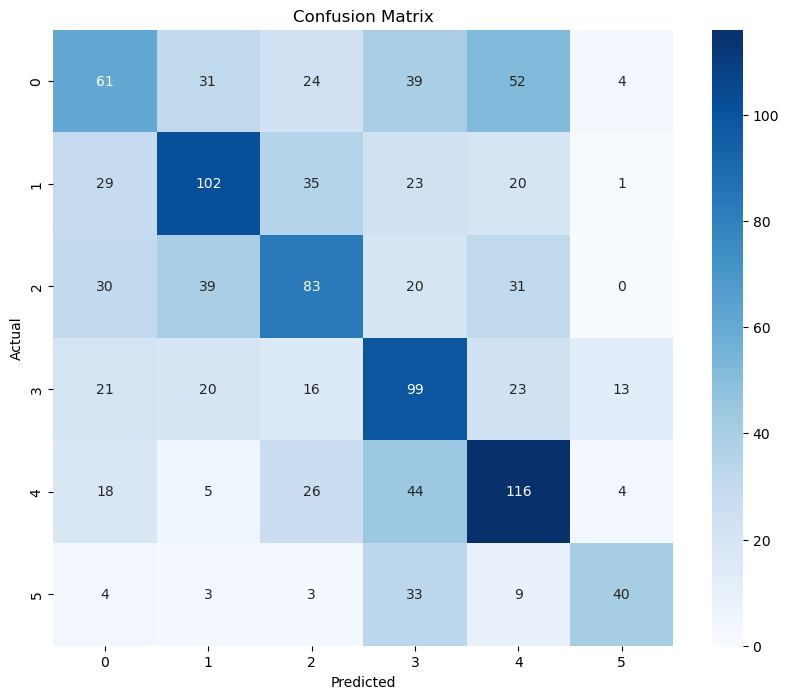

In [22]:
# Compute and visualize the confusion matrix LR
cm_lr = confusion_matrix(y_test_User, y_pred_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
print("Classification report Multi-Class Logistic Regression : ")
print(classification_report(y_test_User, y_pred_lr))

Classification report Multi-Class Logistic Regression : 
              precision    recall  f1-score   support

           0       0.37      0.29      0.33       211
           1       0.51      0.49      0.50       210
           2       0.44      0.41      0.43       203
           3       0.38      0.52      0.44       192
           4       0.46      0.54      0.50       213
           5       0.65      0.43      0.52        92

    accuracy                           0.45      1121
   macro avg       0.47      0.45      0.45      1121
weighted avg       0.45      0.45      0.44      1121



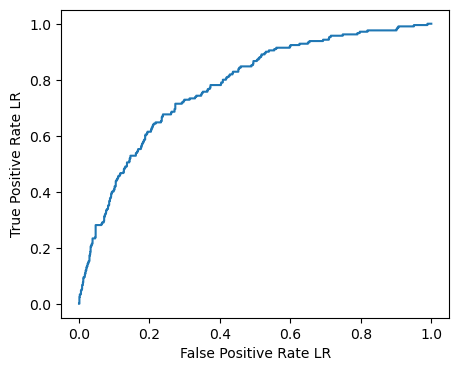

In [24]:
# Compute ROC curve LR
fpr_lr, tpr_lr, thresholds_lr = roc_curve(
    y_test_User, # the true class
    y_pred_proba_lr[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve LR
plt.figure(figsize = [5, 4])
plt.plot(fpr_lr, tpr_lr, '-')
plt.xlabel('False Positive Rate LR')
plt.ylabel('True Positive Rate LR')
plt.show()


## K NEAREST NEIGHBORS

In [25]:
param_dict_knn = {
    'knn__n_neighbors': range(3,32,2),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'select__k': range(6,18),  # Parameter for SelectKBest
}

# construct the pipeline
clf_knn = Pipeline([
    ('standard scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('knn', KNeighborsClassifier())
])


In [26]:
# Perform grid search with cross-validation KNN
max_iter=999
grid_clf_knn = RandomizedSearchCV(
    estimator=clf_knn,
    param_distributions=param_dict_knn,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=10
)

grid_clf_knn.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 999 candidates, totalling 2997 fits
[CV 1/3; 1/999] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=7
[CV 1/3; 1/999] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=7;, score=0.500 total time=   0.0s
[CV 2/3; 1/999] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=7
[CV 2/3; 1/999] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=7;, score=0.464 total time=   0.0s
[CV 3/3; 1/999] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=7
[CV 3/3; 1/999] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=7;, score=0.452 total time=   0.0s
[CV 1/3; 2/999] START knn__metric=manhattan, knn__n_neighbors=21, knn__weights=distance, select__k=12
[CV 1/3; 2/999] END knn__metric=manhattan, knn__n_neighbors=21, knn__weights=distance, select__k=12;, score=0.511 total time=   0.0s
[C

[CV 2/3; 13/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=13;, score=0.500 total time=   0.0s
[CV 3/3; 13/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=13
[CV 3/3; 13/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=13;, score=0.492 total time=   0.0s
[CV 1/3; 14/999] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance, select__k=15
[CV 1/3; 14/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance, select__k=15;, score=0.493 total time=   0.0s
[CV 2/3; 14/999] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance, select__k=15
[CV 2/3; 14/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance, select__k=15;, score=0.487 total time=   0.0s
[CV 3/3; 14/999] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance, select__k=15
[CV 3/3; 14/999] END knn__metric=minkowski, knn__n_n

[CV 2/3; 25/999] END knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=11;, score=0.405 total time=   0.0s
[CV 3/3; 25/999] START knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=11
[CV 3/3; 25/999] END knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=11;, score=0.360 total time=   0.0s
[CV 1/3; 26/999] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance, select__k=17
[CV 1/3; 26/999] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance, select__k=17;, score=0.469 total time=   0.0s
[CV 2/3; 26/999] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance, select__k=17
[CV 2/3; 26/999] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance, select__k=17;, score=0.465 total time=   0.0s
[CV 3/3; 26/999] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance, select__k=17
[CV 3/3; 26/999] END knn__metric=euclidean, knn__n_neighbors

[CV 3/3; 38/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=13;, score=0.439 total time=   0.0s
[CV 1/3; 39/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=13
[CV 1/3; 39/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=13;, score=0.420 total time=   0.0s
[CV 2/3; 39/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=13
[CV 2/3; 39/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=13;, score=0.406 total time=   0.0s
[CV 3/3; 39/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=13
[CV 3/3; 39/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=13;, score=0.383 total time=   0.0s
[CV 1/3; 40/999] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform, select__k=12
[CV 1/3; 40/999] END knn__metric=euclidean, knn__n_neighbors=

[CV 3/3; 50/999] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform, select__k=13;, score=0.365 total time=   0.1s
[CV 1/3; 51/999] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance, select__k=7
[CV 1/3; 51/999] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance, select__k=7;, score=0.491 total time=   0.0s
[CV 2/3; 51/999] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance, select__k=7
[CV 2/3; 51/999] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance, select__k=7;, score=0.462 total time=   0.0s
[CV 3/3; 51/999] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance, select__k=7
[CV 3/3; 51/999] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance, select__k=7;, score=0.448 total time=   0.0s
[CV 1/3; 52/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform, select__k=6
[CV 1/3; 52/999] END knn__metric=euclidean, knn__n_neighbors=1

[CV 3/3; 64/999] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform, select__k=6;, score=0.380 total time=   0.0s
[CV 1/3; 65/999] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=distance, select__k=8
[CV 1/3; 65/999] END knn__metric=euclidean, knn__n_neighbors=21, knn__weights=distance, select__k=8;, score=0.471 total time=   0.0s
[CV 2/3; 65/999] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=distance, select__k=8
[CV 2/3; 65/999] END knn__metric=euclidean, knn__n_neighbors=21, knn__weights=distance, select__k=8;, score=0.476 total time=   0.0s
[CV 3/3; 65/999] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=distance, select__k=8
[CV 3/3; 65/999] END knn__metric=euclidean, knn__n_neighbors=21, knn__weights=distance, select__k=8;, score=0.465 total time=   0.0s
[CV 1/3; 66/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=9
[CV 1/3; 66/999] END knn__metric=minkowski, knn__n_neighbors=

[CV 1/3; 77/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance, select__k=8;, score=0.497 total time=   0.0s
[CV 2/3; 77/999] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance, select__k=8
[CV 2/3; 77/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance, select__k=8;, score=0.493 total time=   0.0s
[CV 3/3; 77/999] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance, select__k=8
[CV 3/3; 77/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance, select__k=8;, score=0.484 total time=   0.0s
[CV 1/3; 78/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance, select__k=15
[CV 1/3; 78/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance, select__k=15;, score=0.536 total time=   0.0s
[CV 2/3; 78/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance, select__k=15
[CV 2/3; 78/999] END knn__metric=manhattan, knn__n_neighbors

[CV 3/3; 90/999] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=uniform, select__k=11;, score=0.371 total time=   0.0s
[CV 1/3; 91/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=13
[CV 1/3; 91/999] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=13;, score=0.468 total time=   0.0s
[CV 2/3; 91/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=13
[CV 2/3; 91/999] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=13;, score=0.469 total time=   0.0s
[CV 3/3; 91/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=13
[CV 3/3; 91/999] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=13;, score=0.459 total time=   0.0s
[CV 1/3; 92/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=14
[CV 1/3; 92/999] END knn__metric=manhattan, knn__n_neighbors=

[CV 2/3; 104/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=9;, score=0.405 total time=   0.0s
[CV 3/3; 104/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=9
[CV 3/3; 104/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=9;, score=0.406 total time=   0.0s
[CV 1/3; 105/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=16
[CV 1/3; 105/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=16;, score=0.489 total time=   0.0s
[CV 2/3; 105/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=16
[CV 2/3; 105/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=16;, score=0.473 total time=   0.0s
[CV 3/3; 105/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=16
[CV 3/3; 105/999] END knn__metric=manhattan, knn__n_neighbor

[CV 2/3; 117/999] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform, select__k=11;, score=0.397 total time=   0.0s
[CV 3/3; 117/999] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform, select__k=11
[CV 3/3; 117/999] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform, select__k=11;, score=0.370 total time=   0.0s
[CV 1/3; 118/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=15
[CV 1/3; 118/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=15;, score=0.492 total time=   0.0s
[CV 2/3; 118/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=15
[CV 2/3; 118/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=15;, score=0.503 total time=   0.0s
[CV 3/3; 118/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=15
[CV 3/3; 118/999] END knn__metric=minkowski, kn

[CV 1/3; 129/999] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=17;, score=0.435 total time=   0.0s
[CV 2/3; 129/999] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=17
[CV 2/3; 129/999] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=17;, score=0.444 total time=   0.0s
[CV 3/3; 129/999] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=17
[CV 3/3; 129/999] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=17;, score=0.430 total time=   0.0s
[CV 1/3; 130/999] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=9
[CV 1/3; 130/999] END knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=9;, score=0.395 total time=   0.0s
[CV 2/3; 130/999] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=9
[CV 2/3; 130/999] END knn__metric=minkowski, knn__n_neighb

[CV 1/3; 141/999] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=11;, score=0.446 total time=   0.0s
[CV 2/3; 141/999] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=11
[CV 2/3; 141/999] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=11;, score=0.448 total time=   0.0s
[CV 3/3; 141/999] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=11
[CV 3/3; 141/999] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=11;, score=0.461 total time=   0.0s
[CV 1/3; 142/999] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=17
[CV 1/3; 142/999] END knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=17;, score=0.429 total time=   0.0s
[CV 2/3; 142/999] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=17
[CV 2/3; 142/999] END knn__metric=minkowski, knn__

[CV 3/3; 153/999] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform, select__k=14;, score=0.391 total time=   0.0s
[CV 1/3; 154/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=15
[CV 1/3; 154/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=15;, score=0.497 total time=   0.0s
[CV 2/3; 154/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=15
[CV 2/3; 154/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=15;, score=0.479 total time=   0.0s
[CV 3/3; 154/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=15
[CV 3/3; 154/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=15;, score=0.457 total time=   0.0s
[CV 1/3; 155/999] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance, select__k=15
[CV 1/3; 155/999] END knn__metric=minkowski, knn__n

[CV 3/3; 165/999] END knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform, select__k=16;, score=0.449 total time=   0.0s
[CV 1/3; 166/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform, select__k=9
[CV 1/3; 166/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform, select__k=9;, score=0.396 total time=   0.0s
[CV 2/3; 166/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform, select__k=9
[CV 2/3; 166/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform, select__k=9;, score=0.388 total time=   0.0s
[CV 3/3; 166/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform, select__k=9
[CV 3/3; 166/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform, select__k=9;, score=0.388 total time=   0.0s
[CV 1/3; 167/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform, select__k=15
[CV 1/3; 167/999] END knn__metric=euclidean, knn__n_neighbors=11

[CV 3/3; 179/999] END knn__metric=manhattan, knn__n_neighbors=21, knn__weights=distance, select__k=16;, score=0.501 total time=   0.0s
[CV 1/3; 180/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=distance, select__k=8
[CV 1/3; 180/999] END knn__metric=minkowski, knn__n_neighbors=29, knn__weights=distance, select__k=8;, score=0.469 total time=   0.0s
[CV 2/3; 180/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=distance, select__k=8
[CV 2/3; 180/999] END knn__metric=minkowski, knn__n_neighbors=29, knn__weights=distance, select__k=8;, score=0.460 total time=   0.0s
[CV 3/3; 180/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=distance, select__k=8
[CV 3/3; 180/999] END knn__metric=minkowski, knn__n_neighbors=29, knn__weights=distance, select__k=8;, score=0.465 total time=   0.0s
[CV 1/3; 181/999] START knn__metric=minkowski, knn__n_neighbors=27, knn__weights=distance, select__k=9
[CV 1/3; 181/999] END knn__metric=minkowski, knn__n

[CV 2/3; 192/999] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=14;, score=0.448 total time=   0.0s
[CV 3/3; 192/999] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=14
[CV 3/3; 192/999] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=14;, score=0.445 total time=   0.0s
[CV 1/3; 193/999] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=6
[CV 1/3; 193/999] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=6;, score=0.393 total time=   0.0s
[CV 2/3; 193/999] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=6
[CV 2/3; 193/999] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=6;, score=0.379 total time=   0.0s
[CV 3/3; 193/999] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=6
[CV 3/3; 193/999] END knn__metric=euclidean, knn__n_neigh

[CV 1/3; 206/999] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=15;, score=0.420 total time=   0.0s
[CV 2/3; 206/999] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=15
[CV 2/3; 206/999] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=15;, score=0.439 total time=   0.0s
[CV 3/3; 206/999] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=15
[CV 3/3; 206/999] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=15;, score=0.434 total time=   0.0s
[CV 1/3; 207/999] START knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=9
[CV 1/3; 207/999] END knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=9;, score=0.409 total time=   0.0s
[CV 2/3; 207/999] START knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=9
[CV 2/3; 207/999] END knn__metric=minkowski, knn__n_nei

[CV 3/3; 217/999] END knn__metric=manhattan, knn__n_neighbors=31, knn__weights=uniform, select__k=10;, score=0.412 total time=   0.0s
[CV 1/3; 218/999] START knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=8
[CV 1/3; 218/999] END knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=8;, score=0.377 total time=   0.0s
[CV 2/3; 218/999] START knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=8
[CV 2/3; 218/999] END knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=8;, score=0.396 total time=   0.0s
[CV 3/3; 218/999] START knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=8
[CV 3/3; 218/999] END knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=8;, score=0.387 total time=   0.0s
[CV 1/3; 219/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=uniform, select__k=11
[CV 1/3; 219/999] END knn__metric=euclidean, knn__n_neighb

[CV 3/3; 230/999] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=7;, score=0.376 total time=   0.0s
[CV 1/3; 231/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=16
[CV 1/3; 231/999] END knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=16;, score=0.422 total time=   0.0s
[CV 2/3; 231/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=16
[CV 2/3; 231/999] END knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=16;, score=0.442 total time=   0.0s
[CV 3/3; 231/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=16
[CV 3/3; 231/999] END knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=16;, score=0.425 total time=   0.0s
[CV 1/3; 232/999] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=6
[CV 1/3; 232/999] END knn__metric=euclidean, knn__n_ne

[CV 2/3; 245/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=10;, score=0.420 total time=   0.0s
[CV 3/3; 245/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=10
[CV 3/3; 245/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=10;, score=0.366 total time=   0.0s
[CV 1/3; 246/999] START knn__metric=manhattan, knn__n_neighbors=29, knn__weights=distance, select__k=11
[CV 1/3; 246/999] END knn__metric=manhattan, knn__n_neighbors=29, knn__weights=distance, select__k=11;, score=0.492 total time=   0.0s
[CV 2/3; 246/999] START knn__metric=manhattan, knn__n_neighbors=29, knn__weights=distance, select__k=11
[CV 2/3; 246/999] END knn__metric=manhattan, knn__n_neighbors=29, knn__weights=distance, select__k=11;, score=0.493 total time=   0.0s
[CV 3/3; 246/999] START knn__metric=manhattan, knn__n_neighbors=29, knn__weights=distance, select__k=11
[CV 3/3; 246/999] END knn__metric=manhattan, kn

[CV 3/3; 258/999] END knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=11;, score=0.367 total time=   0.0s
[CV 1/3; 259/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=12
[CV 1/3; 259/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=12;, score=0.433 total time=   0.0s
[CV 2/3; 259/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=12
[CV 2/3; 259/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=12;, score=0.436 total time=   0.0s
[CV 3/3; 259/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=12
[CV 3/3; 259/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=12;, score=0.413 total time=   0.0s
[CV 1/3; 260/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=14
[CV 1/3; 260/999] END knn__metric=minkowski, knn__n

[CV 2/3; 270/999] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance, select__k=12;, score=0.482 total time=   0.0s
[CV 3/3; 270/999] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance, select__k=12
[CV 3/3; 270/999] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=distance, select__k=12;, score=0.449 total time=   0.0s
[CV 1/3; 271/999] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance, select__k=15
[CV 1/3; 271/999] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance, select__k=15;, score=0.488 total time=   0.0s
[CV 2/3; 271/999] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance, select__k=15
[CV 2/3; 271/999] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance, select__k=15;, score=0.500 total time=   0.0s
[CV 3/3; 271/999] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=distance, select__k=15
[CV 3/3; 271/999] END knn__metric=minkowski,

[CV 2/3; 283/999] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=14;, score=0.409 total time=   0.0s
[CV 3/3; 283/999] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=14
[CV 3/3; 283/999] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=14;, score=0.400 total time=   0.0s
[CV 1/3; 284/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=17
[CV 1/3; 284/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=17;, score=0.480 total time=   0.0s
[CV 2/3; 284/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=17
[CV 2/3; 284/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=17;, score=0.492 total time=   0.0s
[CV 3/3; 284/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=17
[CV 3/3; 284/999] END knn__metric=manhattan, knn__n_neigh

[CV 3/3; 296/999] END knn__metric=manhattan, knn__n_neighbors=29, knn__weights=distance, select__k=14;, score=0.510 total time=   0.0s
[CV 1/3; 297/999] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=16
[CV 1/3; 297/999] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=16;, score=0.423 total time=   0.0s
[CV 2/3; 297/999] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=16
[CV 2/3; 297/999] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=16;, score=0.422 total time=   0.0s
[CV 3/3; 297/999] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=16
[CV 3/3; 297/999] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=16;, score=0.396 total time=   0.0s
[CV 1/3; 298/999] START knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=14
[CV 1/3; 298/999] END knn__metric=minkowski, knn__n_neigh

[CV 3/3; 308/999] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform, select__k=7;, score=0.375 total time=   0.0s
[CV 1/3; 309/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=10
[CV 1/3; 309/999] END knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=10;, score=0.473 total time=   0.0s
[CV 2/3; 309/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=10
[CV 2/3; 309/999] END knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=10;, score=0.487 total time=   0.0s
[CV 3/3; 309/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=10
[CV 3/3; 309/999] END knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=10;, score=0.471 total time=   0.0s
[CV 1/3; 310/999] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=8
[CV 1/3; 310/999] END knn__metric=manhattan, knn

[CV 2/3; 322/999] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance, select__k=12;, score=0.497 total time=   0.0s
[CV 3/3; 322/999] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance, select__k=12
[CV 3/3; 322/999] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance, select__k=12;, score=0.451 total time=   0.0s
[CV 1/3; 323/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=13
[CV 1/3; 323/999] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=13;, score=0.515 total time=   0.0s
[CV 2/3; 323/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=13
[CV 2/3; 323/999] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=13;, score=0.478 total time=   0.0s
[CV 3/3; 323/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=13
[CV 3/3; 323/999] END knn__metric=manhattan, knn__n_

[CV 3/3; 336/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=uniform, select__k=17;, score=0.411 total time=   0.0s
[CV 1/3; 337/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=6
[CV 1/3; 337/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=6;, score=0.493 total time=   0.0s
[CV 2/3; 337/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=6
[CV 2/3; 337/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=6;, score=0.448 total time=   0.0s
[CV 3/3; 337/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=6
[CV 3/3; 337/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=6;, score=0.473 total time=   0.0s
[CV 1/3; 338/999] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=distance, select__k=12
[CV 1/3; 338/999] END knn__metric=manhattan, knn__n_n

[CV 3/3; 350/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=16;, score=0.484 total time=   0.0s
[CV 1/3; 351/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=10
[CV 1/3; 351/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=10;, score=0.396 total time=   0.0s
[CV 2/3; 351/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=10
[CV 2/3; 351/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=10;, score=0.420 total time=   0.0s
[CV 3/3; 351/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=10
[CV 3/3; 351/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=10;, score=0.366 total time=   0.0s
[CV 1/3; 352/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform, select__k=16
[CV 1/3; 352/999] END knn__metric=euclidean, knn__n

[CV 3/3; 363/999] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform, select__k=8;, score=0.413 total time=   0.0s
[CV 1/3; 364/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=6
[CV 1/3; 364/999] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=6;, score=0.475 total time=   0.0s
[CV 2/3; 364/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=6
[CV 2/3; 364/999] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=6;, score=0.458 total time=   0.0s
[CV 3/3; 364/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=6
[CV 3/3; 364/999] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=6;, score=0.443 total time=   0.0s
[CV 1/3; 365/999] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=distance, select__k=10
[CV 1/3; 365/999] END knn__metric=minkowski, knn__n_neighbor

[CV 2/3; 378/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=17;, score=0.525 total time=   0.0s
[CV 3/3; 378/999] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=17
[CV 3/3; 378/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=17;, score=0.511 total time=   0.0s
[CV 1/3; 379/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=14
[CV 1/3; 379/999] END knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=14;, score=0.398 total time=   0.0s
[CV 2/3; 379/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=14
[CV 2/3; 379/999] END knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=14;, score=0.399 total time=   0.0s
[CV 3/3; 379/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=uniform, select__k=14
[CV 3/3; 379/999] END knn__metric=minkowski, knn__n_

[CV 1/3; 394/999] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=12;, score=0.441 total time=   0.0s
[CV 2/3; 394/999] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=12
[CV 2/3; 394/999] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=12;, score=0.429 total time=   0.0s
[CV 3/3; 394/999] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=12
[CV 3/3; 394/999] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=12;, score=0.411 total time=   0.0s
[CV 1/3; 395/999] START knn__metric=minkowski, knn__n_neighbors=25, knn__weights=distance, select__k=12
[CV 1/3; 395/999] END knn__metric=minkowski, knn__n_neighbors=25, knn__weights=distance, select__k=12;, score=0.495 total time=   0.0s
[CV 2/3; 395/999] START knn__metric=minkowski, knn__n_neighbors=25, knn__weights=distance, select__k=12
[CV 2/3; 395/999] END knn__metric=minkowski, knn_

[CV 3/3; 408/999] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=10;, score=0.470 total time=   0.0s
[CV 1/3; 409/999] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=16
[CV 1/3; 409/999] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=16;, score=0.429 total time=   0.0s
[CV 2/3; 409/999] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=16
[CV 2/3; 409/999] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=16;, score=0.437 total time=   0.0s
[CV 3/3; 409/999] START knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=16
[CV 3/3; 409/999] END knn__metric=minkowski, knn__n_neighbors=11, knn__weights=uniform, select__k=16;, score=0.403 total time=   0.0s
[CV 1/3; 410/999] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=uniform, select__k=17
[CV 1/3; 410/999] END knn__metric=minkowski, knn__n_

[CV 1/3; 421/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=11;, score=0.465 total time=   0.0s
[CV 2/3; 421/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=11
[CV 2/3; 421/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=11;, score=0.457 total time=   0.0s
[CV 3/3; 421/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=11
[CV 3/3; 421/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=11;, score=0.458 total time=   0.0s
[CV 1/3; 422/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=6
[CV 1/3; 422/999] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=6;, score=0.487 total time=   0.0s
[CV 2/3; 422/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=6
[CV 2/3; 422/999] END knn__metric=euclidean, kn

[CV 1/3; 435/999] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform, select__k=15;, score=0.427 total time=   0.0s
[CV 2/3; 435/999] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform, select__k=15
[CV 2/3; 435/999] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform, select__k=15;, score=0.434 total time=   0.0s
[CV 3/3; 435/999] START knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform, select__k=15
[CV 3/3; 435/999] END knn__metric=minkowski, knn__n_neighbors=15, knn__weights=uniform, select__k=15;, score=0.422 total time=   0.0s
[CV 1/3; 436/999] START knn__metric=manhattan, knn__n_neighbors=31, knn__weights=distance, select__k=9
[CV 1/3; 436/999] END knn__metric=manhattan, knn__n_neighbors=31, knn__weights=distance, select__k=9;, score=0.509 total time=   0.0s
[CV 2/3; 436/999] START knn__metric=manhattan, knn__n_neighbors=31, knn__weights=distance, select__k=9
[CV 2/3; 436/999] END knn__metric=manhattan, knn__n_

[CV 1/3; 447/999] END knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=6;, score=0.391 total time=   0.0s
[CV 2/3; 447/999] START knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=6
[CV 2/3; 447/999] END knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=6;, score=0.392 total time=   0.0s
[CV 3/3; 447/999] START knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=6
[CV 3/3; 447/999] END knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=6;, score=0.371 total time=   0.0s
[CV 1/3; 448/999] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=17
[CV 1/3; 448/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=17;, score=0.461 total time=   0.0s
[CV 2/3; 448/999] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=17
[CV 2/3; 448/999] END knn__metric=manhattan, knn__n_neigh

[CV 1/3; 461/999] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=16;, score=0.510 total time=   0.0s
[CV 2/3; 461/999] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=16
[CV 2/3; 461/999] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=16;, score=0.502 total time=   0.0s
[CV 3/3; 461/999] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=16
[CV 3/3; 461/999] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance, select__k=16;, score=0.495 total time=   0.0s
[CV 1/3; 462/999] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=9
[CV 1/3; 462/999] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=9;, score=0.401 total time=   0.0s
[CV 2/3; 462/999] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=9
[CV 2/3; 462/999] END knn__metric=minkowski, knn__n_n

[CV 3/3; 473/999] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=10;, score=0.374 total time=   0.0s
[CV 1/3; 474/999] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=10
[CV 1/3; 474/999] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=10;, score=0.384 total time=   0.0s
[CV 2/3; 474/999] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=10
[CV 2/3; 474/999] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=10;, score=0.421 total time=   0.0s
[CV 3/3; 474/999] START knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=10
[CV 3/3; 474/999] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=uniform, select__k=10;, score=0.384 total time=   0.0s
[CV 1/3; 475/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=10
[CV 1/3; 475/999] END knn__metric=manhattan, knn__n_n

[CV 2/3; 487/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=6;, score=0.387 total time=   0.0s
[CV 3/3; 487/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=6
[CV 3/3; 487/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=6;, score=0.393 total time=   0.0s
[CV 1/3; 488/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=15
[CV 1/3; 488/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=15;, score=0.520 total time=   0.0s
[CV 2/3; 488/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=15
[CV 2/3; 488/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=15;, score=0.525 total time=   0.0s
[CV 3/3; 488/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=15
[CV 3/3; 488/999] END knn__metric=manhattan, knn__

[CV 2/3; 501/999] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance, select__k=12;, score=0.479 total time=   0.0s
[CV 3/3; 501/999] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance, select__k=12
[CV 3/3; 501/999] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance, select__k=12;, score=0.450 total time=   0.0s
[CV 1/3; 502/999] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=16
[CV 1/3; 502/999] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=16;, score=0.498 total time=   0.0s
[CV 2/3; 502/999] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=16
[CV 2/3; 502/999] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=16;, score=0.486 total time=   0.0s
[CV 3/3; 502/999] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=16
[CV 3/3; 502/999] END knn__metric=manhattan, knn__n_

[CV 3/3; 515/999] END knn__metric=minkowski, knn__n_neighbors=5, knn__weights=distance, select__k=14;, score=0.424 total time=   0.0s
[CV 1/3; 516/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=12
[CV 1/3; 516/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=12;, score=0.408 total time=   0.0s
[CV 2/3; 516/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=12
[CV 2/3; 516/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=12;, score=0.410 total time=   0.0s
[CV 3/3; 516/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=12
[CV 3/3; 516/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=12;, score=0.369 total time=   0.0s
[CV 1/3; 517/999] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=distance, select__k=8
[CV 1/3; 517/999] END knn__metric=euclidean, knn__n_

[CV 2/3; 530/999] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance, select__k=9;, score=0.464 total time=   0.0s
[CV 3/3; 530/999] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance, select__k=9
[CV 3/3; 530/999] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance, select__k=9;, score=0.463 total time=   0.0s
[CV 1/3; 531/999] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance, select__k=13
[CV 1/3; 531/999] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance, select__k=13;, score=0.537 total time=   0.0s
[CV 2/3; 531/999] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance, select__k=13
[CV 2/3; 531/999] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance, select__k=13;, score=0.496 total time=   0.0s
[CV 3/3; 531/999] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance, select__k=13
[CV 3/3; 531/999] END knn__metric=manhattan, knn__

[CV 2/3; 543/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=8;, score=0.410 total time=   0.0s
[CV 3/3; 543/999] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=8
[CV 3/3; 543/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=8;, score=0.389 total time=   0.0s
[CV 1/3; 544/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform, select__k=12
[CV 1/3; 544/999] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform, select__k=12;, score=0.377 total time=   0.0s
[CV 2/3; 544/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform, select__k=12
[CV 2/3; 544/999] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform, select__k=12;, score=0.405 total time=   0.0s
[CV 3/3; 544/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform, select__k=12
[CV 3/3; 544/999] END knn__metric=euclidean, knn__n_nei

[CV 2/3; 556/999] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform, select__k=14;, score=0.400 total time=   0.0s
[CV 3/3; 556/999] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform, select__k=14
[CV 3/3; 556/999] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform, select__k=14;, score=0.391 total time=   0.0s
[CV 1/3; 557/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance, select__k=12
[CV 1/3; 557/999] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance, select__k=12;, score=0.474 total time=   0.0s
[CV 2/3; 557/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance, select__k=12
[CV 2/3; 557/999] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance, select__k=12;, score=0.482 total time=   0.0s
[CV 3/3; 557/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance, select__k=12
[CV 3/3; 557/999] END knn__metric=euclidean, kn

[CV 3/3; 569/999] END knn__metric=minkowski, knn__n_neighbors=19, knn__weights=distance, select__k=16;, score=0.492 total time=   0.0s
[CV 1/3; 570/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=11
[CV 1/3; 570/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=11;, score=0.391 total time=   0.0s
[CV 2/3; 570/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=11
[CV 2/3; 570/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=11;, score=0.423 total time=   0.0s
[CV 3/3; 570/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=11
[CV 3/3; 570/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=11;, score=0.416 total time=   0.0s
[CV 1/3; 571/999] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform, select__k=7
[CV 1/3; 571/999] END knn__metric=euclidean, knn__n_n

[CV 3/3; 583/999] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform, select__k=7;, score=0.408 total time=   0.0s
[CV 1/3; 584/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=16
[CV 1/3; 584/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=16;, score=0.504 total time=   0.0s
[CV 2/3; 584/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=16
[CV 2/3; 584/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=16;, score=0.508 total time=   0.0s
[CV 3/3; 584/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=16
[CV 3/3; 584/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=16;, score=0.484 total time=   0.0s
[CV 1/3; 585/999] START knn__metric=minkowski, knn__n_neighbors=21, knn__weights=uniform, select__k=11
[CV 1/3; 585/999] END knn__metric=minkowski, kn

[CV 2/3; 595/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance, select__k=13;, score=0.517 total time=   0.0s
[CV 3/3; 595/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance, select__k=13
[CV 3/3; 595/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance, select__k=13;, score=0.492 total time=   0.0s
[CV 1/3; 596/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=9
[CV 1/3; 596/999] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=9;, score=0.465 total time=   0.0s
[CV 2/3; 596/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=9
[CV 2/3; 596/999] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=9;, score=0.457 total time=   0.0s
[CV 3/3; 596/999] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance, select__k=9
[CV 3/3; 596/999] END knn__metric=euclidean, knn__n_ne

[CV 2/3; 607/999] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=13;, score=0.468 total time=   0.0s
[CV 3/3; 607/999] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=13
[CV 3/3; 607/999] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=13;, score=0.442 total time=   0.0s
[CV 1/3; 608/999] START knn__metric=minkowski, knn__n_neighbors=25, knn__weights=uniform, select__k=11
[CV 1/3; 608/999] END knn__metric=minkowski, knn__n_neighbors=25, knn__weights=uniform, select__k=11;, score=0.399 total time=   0.0s
[CV 2/3; 608/999] START knn__metric=minkowski, knn__n_neighbors=25, knn__weights=uniform, select__k=11
[CV 2/3; 608/999] END knn__metric=minkowski, knn__n_neighbors=25, knn__weights=uniform, select__k=11;, score=0.405 total time=   0.0s
[CV 3/3; 608/999] START knn__metric=minkowski, knn__n_neighbors=25, knn__weights=uniform, select__k=11
[CV 3/3; 608/999] END knn__metric=minkowski, knn__n_

[CV 1/3; 620/999] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance, select__k=14;, score=0.510 total time=   0.0s
[CV 2/3; 620/999] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance, select__k=14
[CV 2/3; 620/999] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance, select__k=14;, score=0.507 total time=   0.0s
[CV 3/3; 620/999] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance, select__k=14
[CV 3/3; 620/999] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance, select__k=14;, score=0.492 total time=   0.0s
[CV 1/3; 621/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=9
[CV 1/3; 621/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=9;, score=0.480 total time=   0.0s
[CV 2/3; 621/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=9
[CV 2/3; 621/999] END knn__metric=euclidean, kn

[CV 3/3; 633/999] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance, select__k=6;, score=0.420 total time=   0.0s
[CV 1/3; 634/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=17
[CV 1/3; 634/999] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=17;, score=0.503 total time=   0.0s
[CV 2/3; 634/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=17
[CV 2/3; 634/999] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=17;, score=0.504 total time=   0.0s
[CV 3/3; 634/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=17
[CV 3/3; 634/999] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=17;, score=0.500 total time=   0.0s
[CV 1/3; 635/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=15
[CV 1/3; 635/999] END knn__metric=manhattan, kn

[CV 1/3; 647/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=9;, score=0.389 total time=   0.0s
[CV 2/3; 647/999] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=9
[CV 2/3; 647/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=9;, score=0.383 total time=   0.0s
[CV 3/3; 647/999] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=9
[CV 3/3; 647/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=9;, score=0.392 total time=   0.0s
[CV 1/3; 648/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=12
[CV 1/3; 648/999] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=12;, score=0.500 total time=   0.0s
[CV 2/3; 648/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=12
[CV 2/3; 648/999] END knn__metric=manhattan, knn__n_neigh

[CV 1/3; 661/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=16;, score=0.517 total time=   0.0s
[CV 2/3; 661/999] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=16
[CV 2/3; 661/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=16;, score=0.530 total time=   0.0s
[CV 3/3; 661/999] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=16
[CV 3/3; 661/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=distance, select__k=16;, score=0.472 total time=   0.0s
[CV 1/3; 662/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=uniform, select__k=14
[CV 1/3; 662/999] END knn__metric=euclidean, knn__n_neighbors=31, knn__weights=uniform, select__k=14;, score=0.386 total time=   0.0s
[CV 2/3; 662/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=uniform, select__k=14
[CV 2/3; 662/999] END knn__metric=euclidean, knn__n_

[CV 3/3; 674/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform, select__k=14;, score=0.387 total time=   0.0s
[CV 1/3; 675/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=10
[CV 1/3; 675/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=10;, score=0.469 total time=   0.0s
[CV 2/3; 675/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=10
[CV 2/3; 675/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=10;, score=0.473 total time=   0.0s
[CV 3/3; 675/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=10
[CV 3/3; 675/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=10;, score=0.465 total time=   0.0s
[CV 1/3; 676/999] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=16
[CV 1/3; 676/999] END knn__metric=euclidean, k

[CV 2/3; 688/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform, select__k=7;, score=0.402 total time=   0.0s
[CV 3/3; 688/999] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform, select__k=7
[CV 3/3; 688/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform, select__k=7;, score=0.394 total time=   0.0s
[CV 1/3; 689/999] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform, select__k=8
[CV 1/3; 689/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform, select__k=8;, score=0.401 total time=   0.0s
[CV 2/3; 689/999] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform, select__k=8
[CV 2/3; 689/999] END knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform, select__k=8;, score=0.407 total time=   0.0s
[CV 3/3; 689/999] START knn__metric=manhattan, knn__n_neighbors=3, knn__weights=uniform, select__k=8
[CV 3/3; 689/999] END knn__metric=manhattan, knn__n_neighbors=3, knn

[CV 2/3; 700/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance, select__k=10;, score=0.481 total time=   0.0s
[CV 3/3; 700/999] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance, select__k=10
[CV 3/3; 700/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=distance, select__k=10;, score=0.478 total time=   0.0s
[CV 1/3; 701/999] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform, select__k=9
[CV 1/3; 701/999] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform, select__k=9;, score=0.422 total time=   0.0s
[CV 2/3; 701/999] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform, select__k=9
[CV 2/3; 701/999] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform, select__k=9;, score=0.424 total time=   0.0s
[CV 3/3; 701/999] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform, select__k=9
[CV 3/3; 701/999] END knn__metric=manhattan, knn__n_ne

[CV 3/3; 713/999] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=7;, score=0.460 total time=   0.0s
[CV 1/3; 714/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=8
[CV 1/3; 714/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=8;, score=0.411 total time=   0.0s
[CV 2/3; 714/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=8
[CV 2/3; 714/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=8;, score=0.426 total time=   0.0s
[CV 3/3; 714/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=8
[CV 3/3; 714/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=8;, score=0.437 total time=   0.0s
[CV 1/3; 715/999] START knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=13
[CV 1/3; 715/999] END knn__metric=minkowski, knn__n_neighbors=31,

[CV 1/3; 726/999] END knn__metric=manhattan, knn__n_neighbors=31, knn__weights=distance, select__k=10;, score=0.497 total time=   0.0s
[CV 2/3; 726/999] START knn__metric=manhattan, knn__n_neighbors=31, knn__weights=distance, select__k=10
[CV 2/3; 726/999] END knn__metric=manhattan, knn__n_neighbors=31, knn__weights=distance, select__k=10;, score=0.510 total time=   0.0s
[CV 3/3; 726/999] START knn__metric=manhattan, knn__n_neighbors=31, knn__weights=distance, select__k=10
[CV 3/3; 726/999] END knn__metric=manhattan, knn__n_neighbors=31, knn__weights=distance, select__k=10;, score=0.503 total time=   0.0s
[CV 1/3; 727/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=9
[CV 1/3; 727/999] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=9;, score=0.489 total time=   0.0s
[CV 2/3; 727/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=9
[CV 2/3; 727/999] END knn__metric=manhattan, knn__

[CV 2/3; 738/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=8;, score=0.418 total time=   0.0s
[CV 3/3; 738/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=8
[CV 3/3; 738/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform, select__k=8;, score=0.395 total time=   0.0s
[CV 1/3; 739/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=14
[CV 1/3; 739/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=14;, score=0.398 total time=   0.0s
[CV 2/3; 739/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=14
[CV 2/3; 739/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=14;, score=0.418 total time=   0.0s
[CV 3/3; 739/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=uniform, select__k=14
[CV 3/3; 739/999] END knn__metric=minkowski, knn__n_nei

[CV 2/3; 750/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=12;, score=0.415 total time=   0.0s
[CV 3/3; 750/999] START knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=12
[CV 3/3; 750/999] END knn__metric=minkowski, knn__n_neighbors=13, knn__weights=uniform, select__k=12;, score=0.372 total time=   0.0s
[CV 1/3; 751/999] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=17
[CV 1/3; 751/999] END knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=17;, score=0.418 total time=   0.0s
[CV 2/3; 751/999] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=17
[CV 2/3; 751/999] END knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=17;, score=0.436 total time=   0.0s
[CV 3/3; 751/999] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=17
[CV 3/3; 751/999] END knn__metric=euclidean, knn__n_

[CV 3/3; 764/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance, select__k=11;, score=0.485 total time=   0.0s
[CV 1/3; 765/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=17
[CV 1/3; 765/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=17;, score=0.496 total time=   0.0s
[CV 2/3; 765/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=17
[CV 2/3; 765/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=17;, score=0.490 total time=   0.0s
[CV 3/3; 765/999] START knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=17
[CV 3/3; 765/999] END knn__metric=minkowski, knn__n_neighbors=23, knn__weights=distance, select__k=17;, score=0.494 total time=   0.0s
[CV 1/3; 766/999] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance, select__k=14
[CV 1/3; 766/999] END knn__metric=euclidean,

[CV 3/3; 777/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=7;, score=0.396 total time=   0.0s
[CV 1/3; 778/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform, select__k=8
[CV 1/3; 778/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform, select__k=8;, score=0.396 total time=   0.0s
[CV 2/3; 778/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform, select__k=8
[CV 2/3; 778/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform, select__k=8;, score=0.392 total time=   0.0s
[CV 3/3; 778/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform, select__k=8
[CV 3/3; 778/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform, select__k=8;, score=0.395 total time=   0.0s
[CV 1/3; 779/999] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform, select__k=12
[CV 1/3; 779/999] END knn__metric=manhattan, knn__n_neighbo

[CV 1/3; 790/999] END knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=9;, score=0.403 total time=   0.0s
[CV 2/3; 790/999] START knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=9
[CV 2/3; 790/999] END knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=9;, score=0.390 total time=   0.0s
[CV 3/3; 790/999] START knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=9
[CV 3/3; 790/999] END knn__metric=minkowski, knn__n_neighbors=31, knn__weights=uniform, select__k=9;, score=0.371 total time=   0.0s
[CV 1/3; 791/999] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=11
[CV 1/3; 791/999] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=11;, score=0.399 total time=   0.0s
[CV 2/3; 791/999] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=11
[CV 2/3; 791/999] END knn__metric=manhattan, knn__n_neigh

[CV 3/3; 801/999] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform, select__k=10;, score=0.383 total time=   0.0s
[CV 1/3; 802/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=17
[CV 1/3; 802/999] END knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=17;, score=0.500 total time=   0.0s
[CV 2/3; 802/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=17
[CV 2/3; 802/999] END knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=17;, score=0.490 total time=   0.0s
[CV 3/3; 802/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=17
[CV 3/3; 802/999] END knn__metric=euclidean, knn__n_neighbors=31, knn__weights=distance, select__k=17;, score=0.488 total time=   0.0s
[CV 1/3; 803/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=16
[CV 1/3; 803/999] END knn__metric=minkowski, kn

[CV 2/3; 814/999] END knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=11;, score=0.401 total time=   0.0s
[CV 3/3; 814/999] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=11
[CV 3/3; 814/999] END knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform, select__k=11;, score=0.364 total time=   0.0s
[CV 1/3; 815/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=8
[CV 1/3; 815/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=8;, score=0.474 total time=   0.0s
[CV 2/3; 815/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=8
[CV 2/3; 815/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=8;, score=0.465 total time=   0.0s
[CV 3/3; 815/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance, select__k=8
[CV 3/3; 815/999] END knn__metric=euclidean, knn__n_

[CV 2/3; 828/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance, select__k=7;, score=0.469 total time=   0.0s
[CV 3/3; 828/999] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance, select__k=7
[CV 3/3; 828/999] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance, select__k=7;, score=0.478 total time=   0.0s
[CV 1/3; 829/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=13
[CV 1/3; 829/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=13;, score=0.488 total time=   0.0s
[CV 2/3; 829/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=13
[CV 2/3; 829/999] END knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=13;, score=0.472 total time=   0.0s
[CV 3/3; 829/999] START knn__metric=minkowski, knn__n_neighbors=9, knn__weights=distance, select__k=13
[CV 3/3; 829/999] END knn__metric=minkowski, knn__n_

[CV 1/3; 840/999] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=15;, score=0.486 total time=   0.0s
[CV 2/3; 840/999] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=15
[CV 2/3; 840/999] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=15;, score=0.498 total time=   0.0s
[CV 3/3; 840/999] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=15
[CV 3/3; 840/999] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance, select__k=15;, score=0.498 total time=   0.0s
[CV 1/3; 841/999] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=11
[CV 1/3; 841/999] END knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=11;, score=0.364 total time=   0.0s
[CV 2/3; 841/999] START knn__metric=minkowski, knn__n_neighbors=7, knn__weights=uniform, select__k=11
[CV 2/3; 841/999] END knn__metric=minkowski, knn__

[CV 3/3; 853/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=14;, score=0.396 total time=   0.0s
[CV 1/3; 854/999] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance, select__k=17
[CV 1/3; 854/999] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance, select__k=17;, score=0.492 total time=   0.0s
[CV 2/3; 854/999] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance, select__k=17
[CV 2/3; 854/999] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance, select__k=17;, score=0.501 total time=   0.0s
[CV 3/3; 854/999] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance, select__k=17
[CV 3/3; 854/999] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance, select__k=17;, score=0.485 total time=   0.0s
[CV 1/3; 855/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=distance, select__k=14
[CV 1/3; 855/999] END knn__metric=manhattan, k

[CV 3/3; 867/999] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform, select__k=13;, score=0.365 total time=   0.0s
[CV 1/3; 868/999] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance, select__k=6
[CV 1/3; 868/999] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance, select__k=6;, score=0.450 total time=   0.0s
[CV 2/3; 868/999] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance, select__k=6
[CV 2/3; 868/999] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance, select__k=6;, score=0.429 total time=   0.0s
[CV 3/3; 868/999] START knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance, select__k=6
[CV 3/3; 868/999] END knn__metric=minkowski, knn__n_neighbors=3, knn__weights=distance, select__k=6;, score=0.420 total time=   0.0s
[CV 1/3; 869/999] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance, select__k=14
[CV 1/3; 869/999] END knn__metric=manhattan, knn__n_neigh

[CV 1/3; 882/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=8;, score=0.380 total time=   0.0s
[CV 2/3; 882/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=8
[CV 2/3; 882/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=8;, score=0.383 total time=   0.0s
[CV 3/3; 882/999] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=8
[CV 3/3; 882/999] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform, select__k=8;, score=0.372 total time=   0.0s
[CV 1/3; 883/999] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance, select__k=14
[CV 1/3; 883/999] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance, select__k=14;, score=0.509 total time=   0.0s
[CV 2/3; 883/999] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance, select__k=14
[CV 2/3; 883/999] END knn__metric=manhattan, knn__n_ne

[CV 3/3; 893/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=uniform, select__k=10;, score=0.376 total time=   0.0s
[CV 1/3; 894/999] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=7
[CV 1/3; 894/999] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=7;, score=0.466 total time=   0.0s
[CV 2/3; 894/999] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=7
[CV 2/3; 894/999] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=7;, score=0.474 total time=   0.0s
[CV 3/3; 894/999] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=7
[CV 3/3; 894/999] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance, select__k=7;, score=0.437 total time=   0.0s
[CV 1/3; 895/999] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance, select__k=14
[CV 1/3; 895/999] END knn__metric=euclidean, knn__n_neigh

[CV 3/3; 907/999] END knn__metric=manhattan, knn__n_neighbors=21, knn__weights=uniform, select__k=12;, score=0.395 total time=   0.0s
[CV 1/3; 908/999] START knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=9
[CV 1/3; 908/999] END knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=9;, score=0.397 total time=   0.0s
[CV 2/3; 908/999] START knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=9
[CV 2/3; 908/999] END knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=9;, score=0.381 total time=   0.0s
[CV 3/3; 908/999] START knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=9
[CV 3/3; 908/999] END knn__metric=minkowski, knn__n_neighbors=27, knn__weights=uniform, select__k=9;, score=0.361 total time=   0.0s
[CV 1/3; 909/999] START knn__metric=minkowski, knn__n_neighbors=29, knn__weights=distance, select__k=10
[CV 1/3; 909/999] END knn__metric=minkowski, knn__n_neigh

[CV 3/3; 920/999] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform, select__k=13;, score=0.417 total time=   0.0s
[CV 1/3; 921/999] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=7
[CV 1/3; 921/999] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=7;, score=0.425 total time=   0.0s
[CV 2/3; 921/999] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=7
[CV 2/3; 921/999] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=7;, score=0.403 total time=   0.0s
[CV 3/3; 921/999] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=7
[CV 3/3; 921/999] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform, select__k=7;, score=0.408 total time=   0.0s
[CV 1/3; 922/999] START knn__metric=minkowski, knn__n_neighbors=5, knn__weights=uniform, select__k=15
[CV 1/3; 922/999] END knn__metric=minkowski, knn__n_neighbo

[CV 1/3; 935/999] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform, select__k=8;, score=0.388 total time=   0.0s
[CV 2/3; 935/999] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform, select__k=8
[CV 2/3; 935/999] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform, select__k=8;, score=0.387 total time=   0.0s
[CV 3/3; 935/999] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform, select__k=8
[CV 3/3; 935/999] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform, select__k=8;, score=0.378 total time=   0.0s
[CV 1/3; 936/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=uniform, select__k=13
[CV 1/3; 936/999] END knn__metric=euclidean, knn__n_neighbors=31, knn__weights=uniform, select__k=13;, score=0.395 total time=   0.0s
[CV 2/3; 936/999] START knn__metric=euclidean, knn__n_neighbors=31, knn__weights=uniform, select__k=13
[CV 2/3; 936/999] END knn__metric=euclidean, knn__n_neigh

[CV 2/3; 947/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=14;, score=0.431 total time=   0.0s
[CV 3/3; 947/999] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=14
[CV 3/3; 947/999] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform, select__k=14;, score=0.416 total time=   0.0s
[CV 1/3; 948/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=11
[CV 1/3; 948/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=11;, score=0.455 total time=   0.0s
[CV 2/3; 948/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=11
[CV 2/3; 948/999] END knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=11;, score=0.464 total time=   0.0s
[CV 3/3; 948/999] START knn__metric=minkowski, knn__n_neighbors=17, knn__weights=distance, select__k=11
[CV 3/3; 948/999] END knn__metric=minkowski, kn

[CV 1/3; 959/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=12;, score=0.422 total time=   0.0s
[CV 2/3; 959/999] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=12
[CV 2/3; 959/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=12;, score=0.431 total time=   0.0s
[CV 3/3; 959/999] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=12
[CV 3/3; 959/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=12;, score=0.389 total time=   0.0s
[CV 1/3; 960/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=11
[CV 1/3; 960/999] END knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=11;, score=0.479 total time=   0.0s
[CV 2/3; 960/999] START knn__metric=manhattan, knn__n_neighbors=5, knn__weights=distance, select__k=11
[CV 2/3; 960/999] END knn__metric=manhattan, knn__n_

[CV 3/3; 971/999] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform, select__k=6;, score=0.396 total time=   0.0s
[CV 1/3; 972/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=14
[CV 1/3; 972/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=14;, score=0.424 total time=   0.0s
[CV 2/3; 972/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=14
[CV 2/3; 972/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=14;, score=0.417 total time=   0.0s
[CV 3/3; 972/999] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=14
[CV 3/3; 972/999] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform, select__k=14;, score=0.437 total time=   0.0s
[CV 1/3; 973/999] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform, select__k=6
[CV 1/3; 973/999] END knn__metric=manhattan, knn__n_neighbor

[CV 1/3; 985/999] END knn__metric=manhattan, knn__n_neighbors=21, knn__weights=distance, select__k=15;, score=0.527 total time=   0.0s
[CV 2/3; 985/999] START knn__metric=manhattan, knn__n_neighbors=21, knn__weights=distance, select__k=15
[CV 2/3; 985/999] END knn__metric=manhattan, knn__n_neighbors=21, knn__weights=distance, select__k=15;, score=0.516 total time=   0.0s
[CV 3/3; 985/999] START knn__metric=manhattan, knn__n_neighbors=21, knn__weights=distance, select__k=15
[CV 3/3; 985/999] END knn__metric=manhattan, knn__n_neighbors=21, knn__weights=distance, select__k=15;, score=0.518 total time=   0.0s
[CV 1/3; 986/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=8
[CV 1/3; 986/999] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=8;, score=0.486 total time=   0.0s
[CV 2/3; 986/999] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance, select__k=8
[CV 2/3; 986/999] END knn__metric=euclidean, kn

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standard scaler',
                                              StandardScaler()),
                                             ('select',
                                              SelectKBest(score_func=<function f_regression at 0x15b959d00>)),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=999,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan',
                                                        'minkowski'],
                                        'knn__n_neighbors': range(3, 32, 2),
                                        'knn__weights': ['uniform', 'distance'],
                                        'select__k': range(6, 18)},
                   scoring='f1_weighted', verbose=10)

In [27]:
# Check the best estimator and the best score
print("Result KNN: ")
print('Best hyper-parameters KNN:', grid_clf_knn.best_params_)
print('Best score KNN:', grid_clf_knn.best_score_)

Result KNN: 
Best hyper-parameters KNN: {'select__k': 17, 'knn__weights': 'distance', 'knn__n_neighbors': 13, 'knn__metric': 'manhattan'}
Best score KNN: 0.5438172624088166


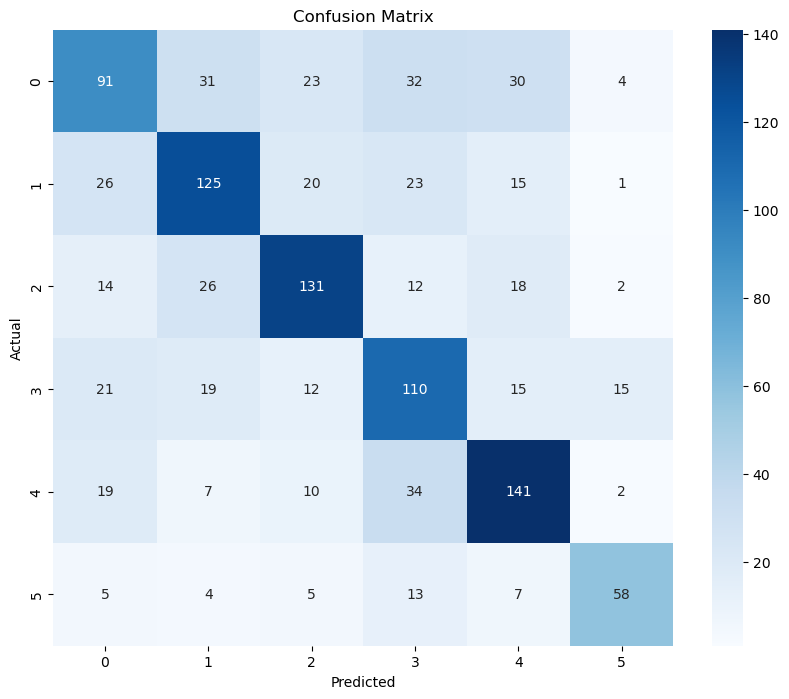

In [28]:
# Predict categories for testing dataset KNN
y_pred_knn = grid_clf_knn.predict(X_test_User)
y_pred_proba_knn = grid_clf_knn.predict_proba(X_test_User)

# compute and visualize the confusion matrix KNN
cm_knn = confusion_matrix(y_test_User, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# get all metrics using `classification_report`
print("Classification report KNN : ")
print(classification_report(y_test_User, y_pred_knn))

Classification report KNN : 
              precision    recall  f1-score   support

           0       0.52      0.43      0.47       211
           1       0.59      0.60      0.59       210
           2       0.65      0.65      0.65       203
           3       0.49      0.57      0.53       192
           4       0.62      0.66      0.64       213
           5       0.71      0.63      0.67        92

    accuracy                           0.59      1121
   macro avg       0.60      0.59      0.59      1121
weighted avg       0.59      0.59      0.58      1121



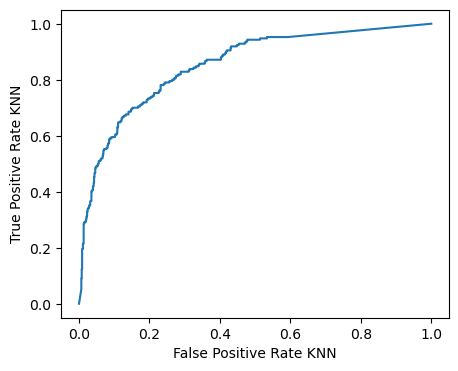

In [30]:
# Compute ROC curve KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(
    y_test_User, # the true class
    y_pred_proba_knn[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve KNN
plt.figure(figsize = [5, 4])
plt.plot(fpr_knn, tpr_knn, '-')
plt.xlabel('False Positive Rate KNN')
plt.ylabel('True Positive Rate KNN')
plt.show()

## SUPPORT VECTOR CLASSIFIER

In [31]:
param_dict_svc = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'select__k': range(1,18),  # Parameter for SelectKBest
}

clf_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression)),
    ('svc', SVC())
])


In [32]:
grid_clf_svc = GridSearchCV(
    estimator=clf_svc,
    param_grid=param_dict_svc,
    scoring='f1_weighted',
    refit=True,
    cv=3,
    verbose=10
)

grid_clf_svc.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 340 candidates, totalling 1020 fits
[CV 1/3; 1/340] START select__k=1, svc__C=0.001, svc__kernel=linear.............
[CV 1/3; 1/340] END select__k=1, svc__C=0.001, svc__kernel=linear;, score=0.060 total time=   0.1s
[CV 2/3; 1/340] START select__k=1, svc__C=0.001, svc__kernel=linear.............
[CV 2/3; 1/340] END select__k=1, svc__C=0.001, svc__kernel=linear;, score=0.060 total time=   0.1s
[CV 3/3; 1/340] START select__k=1, svc__C=0.001, svc__kernel=linear.............
[CV 3/3; 1/340] END select__k=1, svc__C=0.001, svc__kernel=linear;, score=0.060 total time=   0.1s
[CV 1/3; 2/340] START select__k=1, svc__C=0.001, svc__kernel=rbf................
[CV 1/3; 2/340] END select__k=1, svc__C=0.001, svc__kernel=rbf;, score=0.060 total time=   0.1s
[CV 2/3; 2/340] START select__k=1, svc__C=0.001, svc__kernel=rbf................
[CV 2/3; 2/340] END select__k=1, svc__C=0.001, svc__kernel=rbf;, score=0.060 total time=   0.1s
[CV 3/3; 2/340] START select__k=1, svc__C=

[CV 3/3; 16/340] END select__k=1, svc__C=1, svc__kernel=sigmoid;, score=0.135 total time=   0.1s
[CV 1/3; 17/340] START select__k=1, svc__C=10, svc__kernel=linear...............
[CV 1/3; 17/340] END select__k=1, svc__C=10, svc__kernel=linear;, score=0.153 total time=   0.1s
[CV 2/3; 17/340] START select__k=1, svc__C=10, svc__kernel=linear...............
[CV 2/3; 17/340] END select__k=1, svc__C=10, svc__kernel=linear;, score=0.169 total time=   0.1s
[CV 3/3; 17/340] START select__k=1, svc__C=10, svc__kernel=linear...............
[CV 3/3; 17/340] END select__k=1, svc__C=10, svc__kernel=linear;, score=0.155 total time=   0.1s
[CV 1/3; 18/340] START select__k=1, svc__C=10, svc__kernel=rbf..................
[CV 1/3; 18/340] END select__k=1, svc__C=10, svc__kernel=rbf;, score=0.250 total time=   0.2s
[CV 2/3; 18/340] START select__k=1, svc__C=10, svc__kernel=rbf..................
[CV 2/3; 18/340] END select__k=1, svc__C=10, svc__kernel=rbf;, score=0.294 total time=   0.1s
[CV 3/3; 18/340] ST

[CV 2/3; 32/340] END select__k=2, svc__C=0.1, svc__kernel=sigmoid;, score=0.206 total time=   0.1s
[CV 3/3; 32/340] START select__k=2, svc__C=0.1, svc__kernel=sigmoid.............
[CV 3/3; 32/340] END select__k=2, svc__C=0.1, svc__kernel=sigmoid;, score=0.195 total time=   0.1s
[CV 1/3; 33/340] START select__k=2, svc__C=1, svc__kernel=linear................
[CV 1/3; 33/340] END select__k=2, svc__C=1, svc__kernel=linear;, score=0.213 total time=   0.1s
[CV 2/3; 33/340] START select__k=2, svc__C=1, svc__kernel=linear................
[CV 2/3; 33/340] END select__k=2, svc__C=1, svc__kernel=linear;, score=0.220 total time=   0.1s
[CV 3/3; 33/340] START select__k=2, svc__C=1, svc__kernel=linear................
[CV 3/3; 33/340] END select__k=2, svc__C=1, svc__kernel=linear;, score=0.217 total time=   0.1s
[CV 1/3; 34/340] START select__k=2, svc__C=1, svc__kernel=rbf...................
[CV 1/3; 34/340] END select__k=2, svc__C=1, svc__kernel=rbf;, score=0.300 total time=   0.1s
[CV 2/3; 34/340]

[CV 2/3; 48/340] END select__k=3, svc__C=0.01, svc__kernel=sigmoid;, score=0.225 total time=   0.1s
[CV 3/3; 48/340] START select__k=3, svc__C=0.01, svc__kernel=sigmoid............
[CV 3/3; 48/340] END select__k=3, svc__C=0.01, svc__kernel=sigmoid;, score=0.222 total time=   0.1s
[CV 1/3; 49/340] START select__k=3, svc__C=0.1, svc__kernel=linear..............
[CV 1/3; 49/340] END select__k=3, svc__C=0.1, svc__kernel=linear;, score=0.245 total time=   0.1s
[CV 2/3; 49/340] START select__k=3, svc__C=0.1, svc__kernel=linear..............
[CV 2/3; 49/340] END select__k=3, svc__C=0.1, svc__kernel=linear;, score=0.268 total time=   0.1s
[CV 3/3; 49/340] START select__k=3, svc__C=0.1, svc__kernel=linear..............
[CV 3/3; 49/340] END select__k=3, svc__C=0.1, svc__kernel=linear;, score=0.261 total time=   0.1s
[CV 1/3; 50/340] START select__k=3, svc__C=0.1, svc__kernel=rbf.................
[CV 1/3; 50/340] END select__k=3, svc__C=0.1, svc__kernel=rbf;, score=0.303 total time=   0.1s
[CV 2/

[CV 2/3; 64/340] END select__k=4, svc__C=0.001, svc__kernel=sigmoid;, score=0.060 total time=   0.1s
[CV 3/3; 64/340] START select__k=4, svc__C=0.001, svc__kernel=sigmoid...........
[CV 3/3; 64/340] END select__k=4, svc__C=0.001, svc__kernel=sigmoid;, score=0.060 total time=   0.1s
[CV 1/3; 65/340] START select__k=4, svc__C=0.01, svc__kernel=linear.............
[CV 1/3; 65/340] END select__k=4, svc__C=0.01, svc__kernel=linear;, score=0.275 total time=   0.1s
[CV 2/3; 65/340] START select__k=4, svc__C=0.01, svc__kernel=linear.............
[CV 2/3; 65/340] END select__k=4, svc__C=0.01, svc__kernel=linear;, score=0.265 total time=   0.1s
[CV 3/3; 65/340] START select__k=4, svc__C=0.01, svc__kernel=linear.............
[CV 3/3; 65/340] END select__k=4, svc__C=0.01, svc__kernel=linear;, score=0.282 total time=   0.1s
[CV 1/3; 66/340] START select__k=4, svc__C=0.01, svc__kernel=rbf................
[CV 1/3; 66/340] END select__k=4, svc__C=0.01, svc__kernel=rbf;, score=0.140 total time=   0.1s


[CV 3/3; 80/340] END select__k=4, svc__C=10, svc__kernel=sigmoid;, score=0.208 total time=   0.1s
[CV 1/3; 81/340] START select__k=5, svc__C=0.001, svc__kernel=linear............
[CV 1/3; 81/340] END select__k=5, svc__C=0.001, svc__kernel=linear;, score=0.236 total time=   0.1s
[CV 2/3; 81/340] START select__k=5, svc__C=0.001, svc__kernel=linear............
[CV 2/3; 81/340] END select__k=5, svc__C=0.001, svc__kernel=linear;, score=0.213 total time=   0.1s
[CV 3/3; 81/340] START select__k=5, svc__C=0.001, svc__kernel=linear............
[CV 3/3; 81/340] END select__k=5, svc__C=0.001, svc__kernel=linear;, score=0.208 total time=   0.1s
[CV 1/3; 82/340] START select__k=5, svc__C=0.001, svc__kernel=rbf...............
[CV 1/3; 82/340] END select__k=5, svc__C=0.001, svc__kernel=rbf;, score=0.060 total time=   0.1s
[CV 2/3; 82/340] START select__k=5, svc__C=0.001, svc__kernel=rbf...............
[CV 2/3; 82/340] END select__k=5, svc__C=0.001, svc__kernel=rbf;, score=0.060 total time=   0.1s
[CV

[CV 2/3; 96/340] END select__k=5, svc__C=1, svc__kernel=sigmoid;, score=0.249 total time=   0.1s
[CV 3/3; 96/340] START select__k=5, svc__C=1, svc__kernel=sigmoid...............
[CV 3/3; 96/340] END select__k=5, svc__C=1, svc__kernel=sigmoid;, score=0.217 total time=   0.1s
[CV 1/3; 97/340] START select__k=5, svc__C=10, svc__kernel=linear...............
[CV 1/3; 97/340] END select__k=5, svc__C=10, svc__kernel=linear;, score=0.310 total time=   0.2s
[CV 2/3; 97/340] START select__k=5, svc__C=10, svc__kernel=linear...............
[CV 2/3; 97/340] END select__k=5, svc__C=10, svc__kernel=linear;, score=0.344 total time=   0.2s
[CV 3/3; 97/340] START select__k=5, svc__C=10, svc__kernel=linear...............
[CV 3/3; 97/340] END select__k=5, svc__C=10, svc__kernel=linear;, score=0.322 total time=   0.2s
[CV 1/3; 98/340] START select__k=5, svc__C=10, svc__kernel=rbf..................
[CV 1/3; 98/340] END select__k=5, svc__C=10, svc__kernel=rbf;, score=0.413 total time=   0.1s
[CV 2/3; 98/340]

[CV 1/3; 112/340] END select__k=6, svc__C=0.1, svc__kernel=sigmoid;, score=0.282 total time=   0.1s
[CV 2/3; 112/340] START select__k=6, svc__C=0.1, svc__kernel=sigmoid............
[CV 2/3; 112/340] END select__k=6, svc__C=0.1, svc__kernel=sigmoid;, score=0.313 total time=   0.1s
[CV 3/3; 112/340] START select__k=6, svc__C=0.1, svc__kernel=sigmoid............
[CV 3/3; 112/340] END select__k=6, svc__C=0.1, svc__kernel=sigmoid;, score=0.266 total time=   0.1s
[CV 1/3; 113/340] START select__k=6, svc__C=1, svc__kernel=linear...............
[CV 1/3; 113/340] END select__k=6, svc__C=1, svc__kernel=linear;, score=0.317 total time=   0.1s
[CV 2/3; 113/340] START select__k=6, svc__C=1, svc__kernel=linear...............
[CV 2/3; 113/340] END select__k=6, svc__C=1, svc__kernel=linear;, score=0.358 total time=   0.1s
[CV 3/3; 113/340] START select__k=6, svc__C=1, svc__kernel=linear...............
[CV 3/3; 113/340] END select__k=6, svc__C=1, svc__kernel=linear;, score=0.312 total time=   0.1s
[CV 

[CV 3/3; 127/340] END select__k=7, svc__C=0.01, svc__kernel=poly;, score=0.178 total time=   0.1s
[CV 1/3; 128/340] START select__k=7, svc__C=0.01, svc__kernel=sigmoid...........
[CV 1/3; 128/340] END select__k=7, svc__C=0.01, svc__kernel=sigmoid;, score=0.220 total time=   0.2s
[CV 2/3; 128/340] START select__k=7, svc__C=0.01, svc__kernel=sigmoid...........
[CV 2/3; 128/340] END select__k=7, svc__C=0.01, svc__kernel=sigmoid;, score=0.237 total time=   0.2s
[CV 3/3; 128/340] START select__k=7, svc__C=0.01, svc__kernel=sigmoid...........
[CV 3/3; 128/340] END select__k=7, svc__C=0.01, svc__kernel=sigmoid;, score=0.230 total time=   0.2s
[CV 1/3; 129/340] START select__k=7, svc__C=0.1, svc__kernel=linear.............
[CV 1/3; 129/340] END select__k=7, svc__C=0.1, svc__kernel=linear;, score=0.328 total time=   0.1s
[CV 2/3; 129/340] START select__k=7, svc__C=0.1, svc__kernel=linear.............
[CV 2/3; 129/340] END select__k=7, svc__C=0.1, svc__kernel=linear;, score=0.363 total time=   0

[CV 1/3; 143/340] END select__k=8, svc__C=0.001, svc__kernel=poly;, score=0.062 total time=   0.1s
[CV 2/3; 143/340] START select__k=8, svc__C=0.001, svc__kernel=poly.............
[CV 2/3; 143/340] END select__k=8, svc__C=0.001, svc__kernel=poly;, score=0.065 total time=   0.1s
[CV 3/3; 143/340] START select__k=8, svc__C=0.001, svc__kernel=poly.............
[CV 3/3; 143/340] END select__k=8, svc__C=0.001, svc__kernel=poly;, score=0.062 total time=   0.1s
[CV 1/3; 144/340] START select__k=8, svc__C=0.001, svc__kernel=sigmoid..........
[CV 1/3; 144/340] END select__k=8, svc__C=0.001, svc__kernel=sigmoid;, score=0.060 total time=   0.2s
[CV 2/3; 144/340] START select__k=8, svc__C=0.001, svc__kernel=sigmoid..........
[CV 2/3; 144/340] END select__k=8, svc__C=0.001, svc__kernel=sigmoid;, score=0.060 total time=   0.2s
[CV 3/3; 144/340] START select__k=8, svc__C=0.001, svc__kernel=sigmoid..........
[CV 3/3; 144/340] END select__k=8, svc__C=0.001, svc__kernel=sigmoid;, score=0.060 total time=

[CV 2/3; 158/340] END select__k=8, svc__C=10, svc__kernel=rbf;, score=0.462 total time=   0.1s
[CV 3/3; 158/340] START select__k=8, svc__C=10, svc__kernel=rbf.................
[CV 3/3; 158/340] END select__k=8, svc__C=10, svc__kernel=rbf;, score=0.452 total time=   0.1s
[CV 1/3; 159/340] START select__k=8, svc__C=10, svc__kernel=poly................
[CV 1/3; 159/340] END select__k=8, svc__C=10, svc__kernel=poly;, score=0.368 total time=   0.2s
[CV 2/3; 159/340] START select__k=8, svc__C=10, svc__kernel=poly................
[CV 2/3; 159/340] END select__k=8, svc__C=10, svc__kernel=poly;, score=0.422 total time=   0.1s
[CV 3/3; 159/340] START select__k=8, svc__C=10, svc__kernel=poly................
[CV 3/3; 159/340] END select__k=8, svc__C=10, svc__kernel=poly;, score=0.413 total time=   0.1s
[CV 1/3; 160/340] START select__k=8, svc__C=10, svc__kernel=sigmoid.............
[CV 1/3; 160/340] END select__k=8, svc__C=10, svc__kernel=sigmoid;, score=0.221 total time=   0.1s
[CV 2/3; 160/340] 

[CV 1/3; 174/340] END select__k=9, svc__C=1, svc__kernel=rbf;, score=0.433 total time=   0.1s
[CV 2/3; 174/340] START select__k=9, svc__C=1, svc__kernel=rbf..................
[CV 2/3; 174/340] END select__k=9, svc__C=1, svc__kernel=rbf;, score=0.425 total time=   0.1s
[CV 3/3; 174/340] START select__k=9, svc__C=1, svc__kernel=rbf..................
[CV 3/3; 174/340] END select__k=9, svc__C=1, svc__kernel=rbf;, score=0.415 total time=   0.1s
[CV 1/3; 175/340] START select__k=9, svc__C=1, svc__kernel=poly.................
[CV 1/3; 175/340] END select__k=9, svc__C=1, svc__kernel=poly;, score=0.384 total time=   0.1s
[CV 2/3; 175/340] START select__k=9, svc__C=1, svc__kernel=poly.................
[CV 2/3; 175/340] END select__k=9, svc__C=1, svc__kernel=poly;, score=0.415 total time=   0.1s
[CV 3/3; 175/340] START select__k=9, svc__C=1, svc__kernel=poly.................
[CV 3/3; 175/340] END select__k=9, svc__C=1, svc__kernel=poly;, score=0.361 total time=   0.1s
[CV 1/3; 176/340] START sele

[CV 3/3; 189/340] END select__k=10, svc__C=0.1, svc__kernel=linear;, score=0.316 total time=   0.1s
[CV 1/3; 190/340] START select__k=10, svc__C=0.1, svc__kernel=rbf...............
[CV 1/3; 190/340] END select__k=10, svc__C=0.1, svc__kernel=rbf;, score=0.341 total time=   0.1s
[CV 2/3; 190/340] START select__k=10, svc__C=0.1, svc__kernel=rbf...............
[CV 2/3; 190/340] END select__k=10, svc__C=0.1, svc__kernel=rbf;, score=0.387 total time=   0.1s
[CV 3/3; 190/340] START select__k=10, svc__C=0.1, svc__kernel=rbf...............
[CV 3/3; 190/340] END select__k=10, svc__C=0.1, svc__kernel=rbf;, score=0.330 total time=   0.1s
[CV 1/3; 191/340] START select__k=10, svc__C=0.1, svc__kernel=poly..............
[CV 1/3; 191/340] END select__k=10, svc__C=0.1, svc__kernel=poly;, score=0.324 total time=   0.1s
[CV 2/3; 191/340] START select__k=10, svc__C=0.1, svc__kernel=poly..............
[CV 2/3; 191/340] END select__k=10, svc__C=0.1, svc__kernel=poly;, score=0.371 total time=   0.1s
[CV 3/3;

[CV 1/3; 205/340] END select__k=11, svc__C=0.01, svc__kernel=linear;, score=0.351 total time=   0.1s
[CV 2/3; 205/340] START select__k=11, svc__C=0.01, svc__kernel=linear...........
[CV 2/3; 205/340] END select__k=11, svc__C=0.01, svc__kernel=linear;, score=0.341 total time=   0.1s
[CV 3/3; 205/340] START select__k=11, svc__C=0.01, svc__kernel=linear...........
[CV 3/3; 205/340] END select__k=11, svc__C=0.01, svc__kernel=linear;, score=0.334 total time=   0.1s
[CV 1/3; 206/340] START select__k=11, svc__C=0.01, svc__kernel=rbf..............
[CV 1/3; 206/340] END select__k=11, svc__C=0.01, svc__kernel=rbf;, score=0.060 total time=   0.2s
[CV 2/3; 206/340] START select__k=11, svc__C=0.01, svc__kernel=rbf..............
[CV 2/3; 206/340] END select__k=11, svc__C=0.01, svc__kernel=rbf;, score=0.060 total time=   0.2s
[CV 3/3; 206/340] START select__k=11, svc__C=0.01, svc__kernel=rbf..............
[CV 3/3; 206/340] END select__k=11, svc__C=0.01, svc__kernel=rbf;, score=0.060 total time=   0.2

[CV 2/3; 220/340] END select__k=11, svc__C=10, svc__kernel=sigmoid;, score=0.274 total time=   0.1s
[CV 3/3; 220/340] START select__k=11, svc__C=10, svc__kernel=sigmoid............
[CV 3/3; 220/340] END select__k=11, svc__C=10, svc__kernel=sigmoid;, score=0.216 total time=   0.1s
[CV 1/3; 221/340] START select__k=12, svc__C=0.001, svc__kernel=linear..........
[CV 1/3; 221/340] END select__k=12, svc__C=0.001, svc__kernel=linear;, score=0.286 total time=   0.1s
[CV 2/3; 221/340] START select__k=12, svc__C=0.001, svc__kernel=linear..........
[CV 2/3; 221/340] END select__k=12, svc__C=0.001, svc__kernel=linear;, score=0.302 total time=   0.1s
[CV 3/3; 221/340] START select__k=12, svc__C=0.001, svc__kernel=linear..........
[CV 3/3; 221/340] END select__k=12, svc__C=0.001, svc__kernel=linear;, score=0.251 total time=   0.1s
[CV 1/3; 222/340] START select__k=12, svc__C=0.001, svc__kernel=rbf.............
[CV 1/3; 222/340] END select__k=12, svc__C=0.001, svc__kernel=rbf;, score=0.060 total tim

[CV 1/3; 236/340] END select__k=12, svc__C=1, svc__kernel=sigmoid;, score=0.307 total time=   0.1s
[CV 2/3; 236/340] START select__k=12, svc__C=1, svc__kernel=sigmoid.............
[CV 2/3; 236/340] END select__k=12, svc__C=1, svc__kernel=sigmoid;, score=0.332 total time=   0.1s
[CV 3/3; 236/340] START select__k=12, svc__C=1, svc__kernel=sigmoid.............
[CV 3/3; 236/340] END select__k=12, svc__C=1, svc__kernel=sigmoid;, score=0.254 total time=   0.1s
[CV 1/3; 237/340] START select__k=12, svc__C=10, svc__kernel=linear.............
[CV 1/3; 237/340] END select__k=12, svc__C=10, svc__kernel=linear;, score=0.402 total time=   0.4s
[CV 2/3; 237/340] START select__k=12, svc__C=10, svc__kernel=linear.............
[CV 2/3; 237/340] END select__k=12, svc__C=10, svc__kernel=linear;, score=0.431 total time=   0.4s
[CV 3/3; 237/340] START select__k=12, svc__C=10, svc__kernel=linear.............
[CV 3/3; 237/340] END select__k=12, svc__C=10, svc__kernel=linear;, score=0.355 total time=   0.5s
[

[CV 3/3; 251/340] END select__k=13, svc__C=0.1, svc__kernel=poly;, score=0.283 total time=   0.1s
[CV 1/3; 252/340] START select__k=13, svc__C=0.1, svc__kernel=sigmoid...........
[CV 1/3; 252/340] END select__k=13, svc__C=0.1, svc__kernel=sigmoid;, score=0.341 total time=   0.2s
[CV 2/3; 252/340] START select__k=13, svc__C=0.1, svc__kernel=sigmoid...........
[CV 2/3; 252/340] END select__k=13, svc__C=0.1, svc__kernel=sigmoid;, score=0.367 total time=   0.2s
[CV 3/3; 252/340] START select__k=13, svc__C=0.1, svc__kernel=sigmoid...........
[CV 3/3; 252/340] END select__k=13, svc__C=0.1, svc__kernel=sigmoid;, score=0.322 total time=   0.2s
[CV 1/3; 253/340] START select__k=13, svc__C=1, svc__kernel=linear..............
[CV 1/3; 253/340] END select__k=13, svc__C=1, svc__kernel=linear;, score=0.398 total time=   0.1s
[CV 2/3; 253/340] START select__k=13, svc__C=1, svc__kernel=linear..............
[CV 2/3; 253/340] END select__k=13, svc__C=1, svc__kernel=linear;, score=0.426 total time=   0.1

[CV 3/3; 267/340] END select__k=14, svc__C=0.01, svc__kernel=poly;, score=0.106 total time=   0.1s
[CV 1/3; 268/340] START select__k=14, svc__C=0.01, svc__kernel=sigmoid..........
[CV 1/3; 268/340] END select__k=14, svc__C=0.01, svc__kernel=sigmoid;, score=0.237 total time=   0.2s
[CV 2/3; 268/340] START select__k=14, svc__C=0.01, svc__kernel=sigmoid..........
[CV 2/3; 268/340] END select__k=14, svc__C=0.01, svc__kernel=sigmoid;, score=0.266 total time=   0.2s
[CV 3/3; 268/340] START select__k=14, svc__C=0.01, svc__kernel=sigmoid..........
[CV 3/3; 268/340] END select__k=14, svc__C=0.01, svc__kernel=sigmoid;, score=0.181 total time=   0.2s
[CV 1/3; 269/340] START select__k=14, svc__C=0.1, svc__kernel=linear............
[CV 1/3; 269/340] END select__k=14, svc__C=0.1, svc__kernel=linear;, score=0.406 total time=   0.1s
[CV 2/3; 269/340] START select__k=14, svc__C=0.1, svc__kernel=linear............
[CV 2/3; 269/340] END select__k=14, svc__C=0.1, svc__kernel=linear;, score=0.427 total tim

[CV 2/3; 283/340] END select__k=15, svc__C=0.001, svc__kernel=poly;, score=0.060 total time=   0.1s
[CV 3/3; 283/340] START select__k=15, svc__C=0.001, svc__kernel=poly............
[CV 3/3; 283/340] END select__k=15, svc__C=0.001, svc__kernel=poly;, score=0.060 total time=   0.1s
[CV 1/3; 284/340] START select__k=15, svc__C=0.001, svc__kernel=sigmoid.........
[CV 1/3; 284/340] END select__k=15, svc__C=0.001, svc__kernel=sigmoid;, score=0.060 total time=   0.2s
[CV 2/3; 284/340] START select__k=15, svc__C=0.001, svc__kernel=sigmoid.........
[CV 2/3; 284/340] END select__k=15, svc__C=0.001, svc__kernel=sigmoid;, score=0.060 total time=   0.2s
[CV 3/3; 284/340] START select__k=15, svc__C=0.001, svc__kernel=sigmoid.........
[CV 3/3; 284/340] END select__k=15, svc__C=0.001, svc__kernel=sigmoid;, score=0.060 total time=   0.2s
[CV 1/3; 285/340] START select__k=15, svc__C=0.01, svc__kernel=linear...........
[CV 1/3; 285/340] END select__k=15, svc__C=0.01, svc__kernel=linear;, score=0.379 tota

[CV 1/3; 299/340] END select__k=15, svc__C=10, svc__kernel=poly;, score=0.494 total time=   0.1s
[CV 2/3; 299/340] START select__k=15, svc__C=10, svc__kernel=poly...............
[CV 2/3; 299/340] END select__k=15, svc__C=10, svc__kernel=poly;, score=0.481 total time=   0.1s
[CV 3/3; 299/340] START select__k=15, svc__C=10, svc__kernel=poly...............
[CV 3/3; 299/340] END select__k=15, svc__C=10, svc__kernel=poly;, score=0.492 total time=   0.1s
[CV 1/3; 300/340] START select__k=15, svc__C=10, svc__kernel=sigmoid............
[CV 1/3; 300/340] END select__k=15, svc__C=10, svc__kernel=sigmoid;, score=0.286 total time=   0.1s
[CV 2/3; 300/340] START select__k=15, svc__C=10, svc__kernel=sigmoid............
[CV 2/3; 300/340] END select__k=15, svc__C=10, svc__kernel=sigmoid;, score=0.329 total time=   0.1s
[CV 3/3; 300/340] START select__k=15, svc__C=10, svc__kernel=sigmoid............
[CV 3/3; 300/340] END select__k=15, svc__C=10, svc__kernel=sigmoid;, score=0.261 total time=   0.1s
[CV 

[CV 3/3; 314/340] END select__k=16, svc__C=1, svc__kernel=rbf;, score=0.514 total time=   0.1s
[CV 1/3; 315/340] START select__k=16, svc__C=1, svc__kernel=poly................
[CV 1/3; 315/340] END select__k=16, svc__C=1, svc__kernel=poly;, score=0.461 total time=   0.1s
[CV 2/3; 315/340] START select__k=16, svc__C=1, svc__kernel=poly................
[CV 2/3; 315/340] END select__k=16, svc__C=1, svc__kernel=poly;, score=0.469 total time=   0.1s
[CV 3/3; 315/340] START select__k=16, svc__C=1, svc__kernel=poly................
[CV 3/3; 315/340] END select__k=16, svc__C=1, svc__kernel=poly;, score=0.471 total time=   0.1s
[CV 1/3; 316/340] START select__k=16, svc__C=1, svc__kernel=sigmoid.............
[CV 1/3; 316/340] END select__k=16, svc__C=1, svc__kernel=sigmoid;, score=0.335 total time=   0.1s
[CV 2/3; 316/340] START select__k=16, svc__C=1, svc__kernel=sigmoid.............
[CV 2/3; 316/340] END select__k=16, svc__C=1, svc__kernel=sigmoid;, score=0.376 total time=   0.1s
[CV 3/3; 316/3

[CV 2/3; 330/340] END select__k=17, svc__C=0.1, svc__kernel=rbf;, score=0.411 total time=   0.2s
[CV 3/3; 330/340] START select__k=17, svc__C=0.1, svc__kernel=rbf...............
[CV 3/3; 330/340] END select__k=17, svc__C=0.1, svc__kernel=rbf;, score=0.365 total time=   0.2s
[CV 1/3; 331/340] START select__k=17, svc__C=0.1, svc__kernel=poly..............
[CV 1/3; 331/340] END select__k=17, svc__C=0.1, svc__kernel=poly;, score=0.345 total time=   0.1s
[CV 2/3; 331/340] START select__k=17, svc__C=0.1, svc__kernel=poly..............
[CV 2/3; 331/340] END select__k=17, svc__C=0.1, svc__kernel=poly;, score=0.371 total time=   0.1s
[CV 3/3; 331/340] START select__k=17, svc__C=0.1, svc__kernel=poly..............
[CV 3/3; 331/340] END select__k=17, svc__C=0.1, svc__kernel=poly;, score=0.349 total time=   0.1s
[CV 1/3; 332/340] START select__k=17, svc__C=0.1, svc__kernel=sigmoid...........
[CV 1/3; 332/340] END select__k=17, svc__C=0.1, svc__kernel=sigmoid;, score=0.370 total time=   0.2s
[CV 2/

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('select',
                                        SelectKBest(score_func=<function f_regression at 0x15b959d00>)),
                                       ('svc', SVC())]),
             param_grid={'select__k': range(1, 18),
                         'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=10)

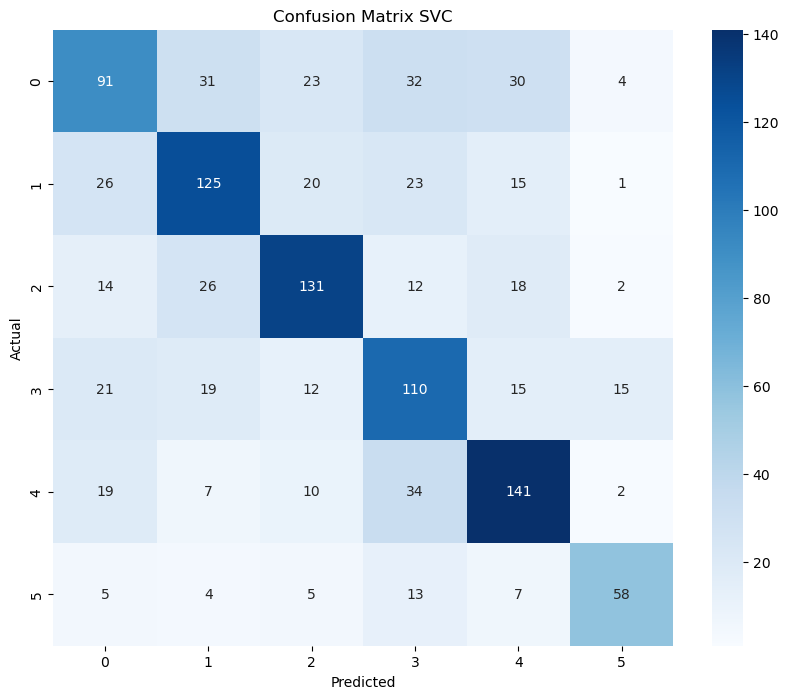

In [33]:
# Predict categories for testing dataset SVC
y_pred_svc = grid_clf_svc.predict(X_test_User)

#Plot the confusion Matrix
cm_svc = confusion_matrix(y_test_User, y_pred_svc)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC')
plt.show()

In [34]:
print("Classification report SVC : ")
print(classification_report(y_test_User, y_pred_svc))

Classification report SVC : 
              precision    recall  f1-score   support

           0       0.43      0.43      0.43       211
           1       0.53      0.52      0.52       210
           2       0.58      0.59      0.58       203
           3       0.53      0.57      0.55       192
           4       0.64      0.62      0.63       213
           5       0.64      0.59      0.61        92

    accuracy                           0.55      1121
   macro avg       0.56      0.55      0.56      1121
weighted avg       0.55      0.55      0.55      1121



## DECISION TREES

In [35]:
param_dict_dt = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': range(1,30,2),
    'dt__min_samples_split': range(1,20),
    'dt__min_samples_leaf' :range(1,10),
    'dt__max_features': ["auto", "sqrt", "log2"],
    'dt__min_impurity_decrease':[0.0,0.1,0.2],
    'select__k': range(6, 18)  # Paramètre pour SelectKBest
}

clf_dt = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('dt', DecisionTreeClassifier())
])

In [36]:

grid_clf_dt = RandomizedSearchCV(
    estimator=clf_dt,
    param_distributions=param_dict_dt,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=10
)

grid_clf_dt.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 999 candidates, totalling 2997 fits
[CV 1/3; 1/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=15
[CV 1/3; 1/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=15;, score=0.060 total time=   0.0s
[CV 2/3; 1/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=15
[CV 2/3; 1/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=15;, score=0.060 total time=   0.0s
[CV 3/3; 1/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_

[CV 1/3; 31/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=15, select__k=6;, score=nan total time=   0.0s
[CV 2/3; 31/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=15, select__k=6
[CV 2/3; 31/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=15, select__k=6;, score=nan total time=   0.0s
[CV 3/3; 31/999] START dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=15, select__k=6
[CV 3/3; 31/999] END dt__criterion=gini, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=15, select__k=6;, score=nan total time=   0.0s
[CV 1/3; 32/999] START dt__criter

[CV 2/3; 59/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=8, select__k=8;, score=0.094 total time=   0.0s
[CV 3/3; 59/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=8, select__k=8
[CV 3/3; 59/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=8, select__k=8;, score=0.142 total time=   0.0s
[CV 1/3; 60/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=8, select__k=15
[CV 1/3; 60/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=8, select__k=15;, score=0.458 total time=   0.0s
[CV 2/3; 60

[CV 2/3; 86/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=15, select__k=8;, score=0.094 total time=   0.0s
[CV 3/3; 86/999] START dt__criterion=log_loss, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=15, select__k=8
[CV 3/3; 86/999] END dt__criterion=log_loss, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=15, select__k=8;, score=0.105 total time=   0.0s
[CV 1/3; 87/999] START dt__criterion=gini, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=5, select__k=11
[CV 1/3; 87/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=4, dt__min_samples_split=5, select__k=11;, score=0.060 total time=   0.0s
[CV 2/3; 87/9

[CV 3/3; 112/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=7, select__k=11;, score=0.388 total time=   0.0s
[CV 1/3; 113/999] START dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=6
[CV 1/3; 113/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=6;, score=0.411 total time=   0.0s
[CV 2/3; 113/999] START dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=6
[CV 2/3; 113/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=6;, score=0.428 total time=   0.0s
[CV 3/3; 113/999]

[CV 2/3; 137/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=3, select__k=7;, score=0.410 total time=   0.0s
[CV 3/3; 137/999] START dt__criterion=gini, dt__max_depth=13, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=3, select__k=7
[CV 3/3; 137/999] END dt__criterion=gini, dt__max_depth=13, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=3, select__k=7;, score=0.407 total time=   0.0s
[CV 1/3; 138/999] START dt__criterion=gini, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=9
[CV 1/3; 138/999] END dt__criterion=gini, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=5, dt__min_samples_split=2, select__k=9;, score=0.131 total time=   0.0s
[CV 2/3; 138/999] START 

[CV 2/3; 161/999] END dt__criterion=log_loss, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=9;, score=0.417 total time=   0.0s
[CV 3/3; 161/999] START dt__criterion=log_loss, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=9
[CV 3/3; 161/999] END dt__criterion=log_loss, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=4, select__k=9;, score=0.422 total time=   0.0s
[CV 1/3; 162/999] START dt__criterion=log_loss, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=1, select__k=16
[CV 1/3; 162/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=1, select__k=16;, score=nan total time=   0.0s
[CV 

[CV 3/3; 189/999] END dt__criterion=gini, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=5, dt__min_samples_split=12, select__k=15;, score=0.060 total time=   0.0s
[CV 1/3; 190/999] START dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=13
[CV 1/3; 190/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=13;, score=nan total time=   0.0s
[CV 2/3; 190/999] START dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=13
[CV 2/3; 190/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=13;, score=nan total time=   0.0s
[CV 3

[CV 2/3; 218/999] END dt__criterion=log_loss, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=16, select__k=9;, score=0.392 total time=   0.0s
[CV 3/3; 218/999] START dt__criterion=log_loss, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=16, select__k=9
[CV 3/3; 218/999] END dt__criterion=log_loss, dt__max_depth=17, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=16, select__k=9;, score=0.395 total time=   0.0s
[CV 1/3; 219/999] START dt__criterion=gini, dt__max_depth=23, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=9, select__k=8
[CV 1/3; 219/999] END dt__criterion=gini, dt__max_depth=23, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=9, select__k=8;, score=0.060 total time=   0.0s
[CV 2/3

[CV 1/3; 250/999] END dt__criterion=gini, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=13, select__k=11;, score=0.060 total time=   0.0s
[CV 2/3; 250/999] START dt__criterion=gini, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=13, select__k=11
[CV 2/3; 250/999] END dt__criterion=gini, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=13, select__k=11;, score=0.060 total time=   0.0s
[CV 3/3; 250/999] START dt__criterion=gini, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=13, select__k=11
[CV 3/3; 250/999] END dt__criterion=gini, dt__max_depth=3, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=13, select__k=11;, score=0.060 total time=   0.0s
[CV 1/3; 251/999]

[CV 3/3; 270/999] END dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=3, dt__min_samples_split=12, select__k=14;, score=0.060 total time=   0.0s
[CV 1/3; 271/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=11
[CV 1/3; 271/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=11;, score=nan total time=   0.0s
[CV 2/3; 271/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=11
[CV 2/3; 271/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=6, dt__min_samples_split=9, select__k=11;, score=nan total time=   0.0s
[CV 3

[CV 2/3; 300/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=13, select__k=9;, score=0.139 total time=   0.0s
[CV 3/3; 300/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=13, select__k=9
[CV 3/3; 300/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=13, select__k=9;, score=0.142 total time=   0.0s
[CV 1/3; 301/999] START dt__criterion=entropy, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=8
[CV 1/3; 301/999] END dt__criterion=entropy, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=2, dt__min_samples_split=9, select__k=8;, score=0.104 total time=   0.0s
[

[CV 1/3; 329/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=17;, score=0.312 total time=   0.0s
[CV 2/3; 329/999] START dt__criterion=log_loss, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=17
[CV 2/3; 329/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=17;, score=0.309 total time=   0.0s
[CV 3/3; 329/999] START dt__criterion=log_loss, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=17
[CV 3/3; 329/999] END dt__criterion=log_loss, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=10, select__k=17;, score=0.239 total time=   0.

[CV 3/3; 364/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=13, select__k=13;, score=0.394 total time=   0.0s
[CV 1/3; 365/999] START dt__criterion=entropy, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=6, select__k=10
[CV 1/3; 365/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=6, select__k=10;, score=0.143 total time=   0.0s
[CV 2/3; 365/999] START dt__criterion=entropy, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=6, select__k=10
[CV 2/3; 365/999] END dt__criterion=entropy, dt__max_depth=29, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=6, select__k=10;, score=0.094 total time=   0.0s


[CV 1/3; 385/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=2, select__k=10;, score=0.104 total time=   0.0s
[CV 2/3; 385/999] START dt__criterion=entropy, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=2, select__k=10
[CV 2/3; 385/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=2, select__k=10;, score=0.148 total time=   0.0s
[CV 3/3; 385/999] START dt__criterion=entropy, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=2, select__k=10
[CV 3/3; 385/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=2, dt__min_samples_split=2, select__k=10;, score=0.136 total time=   0.0s
[CV 1/3

[CV 1/3; 410/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=10, select__k=13;, score=nan total time=   0.0s
[CV 2/3; 410/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=10, select__k=13
[CV 2/3; 410/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=10, select__k=13;, score=nan total time=   0.0s
[CV 3/3; 410/999] START dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=10, select__k=13
[CV 3/3; 410/999] END dt__criterion=entropy, dt__max_depth=11, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=10, select__k=13;, score=nan total time=   0.0s
[CV

[CV 3/3; 434/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=14, select__k=16;, score=0.445 total time=   0.0s
[CV 1/3; 435/999] START dt__criterion=gini, dt__max_depth=19, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=7
[CV 1/3; 435/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=7;, score=nan total time=   0.0s
[CV 2/3; 435/999] START dt__criterion=gini, dt__max_depth=19, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=7
[CV 2/3; 435/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=7;, score=nan total time=   0.0s
[CV 3/3; 435/999]

[CV 1/3; 466/999] END dt__criterion=entropy, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=9;, score=nan total time=   0.0s
[CV 2/3; 466/999] START dt__criterion=entropy, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=9
[CV 2/3; 466/999] END dt__criterion=entropy, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=9;, score=nan total time=   0.0s
[CV 3/3; 466/999] START dt__criterion=entropy, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=9
[CV 3/3; 466/999] END dt__criterion=entropy, dt__max_depth=5, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=4, dt__min_samples_split=16, select__k=9;, score=nan total time=   0.0s
[CV 1/3; 467/

[CV 1/3; 490/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=13, select__k=14;, score=0.400 total time=   0.0s
[CV 2/3; 490/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=13, select__k=14
[CV 2/3; 490/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=13, select__k=14;, score=0.393 total time=   0.0s
[CV 3/3; 490/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=13, select__k=14
[CV 3/3; 490/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=13, select__k=14;, score=0.410 total time=   0.

[CV 3/3; 520/999] END dt__criterion=entropy, dt__max_depth=13, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=17, select__k=9;, score=0.105 total time=   0.0s
[CV 1/3; 521/999] START dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=8, select__k=17
[CV 1/3; 521/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=8, select__k=17;, score=nan total time=   0.0s
[CV 2/3; 521/999] START dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=8, select__k=17
[CV 2/3; 521/999] END dt__criterion=log_loss, dt__max_depth=23, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=6, dt__min_samples_split=8, select__k=17;, score=nan total time=   0.0s
[C

[CV 2/3; 555/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=16;, score=0.060 total time=   0.0s
[CV 3/3; 555/999] START dt__criterion=entropy, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=16
[CV 3/3; 555/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=16;, score=0.060 total time=   0.0s
[CV 1/3; 556/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=19, select__k=16
[CV 1/3; 556/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=19, select__k=16;, score=0.143 total time=   0.0s


[CV 1/3; 580/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=6, select__k=8;, score=nan total time=   0.0s
[CV 2/3; 580/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=6, select__k=8
[CV 2/3; 580/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=6, select__k=8;, score=nan total time=   0.0s
[CV 3/3; 580/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=6, select__k=8
[CV 3/3; 580/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=auto, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=3, dt__min_samples_split=6, select__k=8;, score=nan total time=   0.0s
[CV 1/3; 581/999] 

[CV 1/3; 610/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=9;, score=0.390 total time=   0.0s
[CV 2/3; 610/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=9
[CV 2/3; 610/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=9;, score=0.356 total time=   0.0s
[CV 3/3; 610/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=9
[CV 3/3; 610/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=9;, score=0.387 total time=   0.0s
[C

[CV 1/3; 632/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=8, select__k=17;, score=0.426 total time=   0.0s
[CV 2/3; 632/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=8, select__k=17
[CV 2/3; 632/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=8, select__k=17;, score=0.427 total time=   0.0s
[CV 3/3; 632/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=8, select__k=17
[CV 3/3; 632/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=8, select__k=17;, score=0.455 total time=   0.

[CV 1/3; 661/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=10;, score=nan total time=   0.0s
[CV 2/3; 661/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=10
[CV 2/3; 661/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=10;, score=nan total time=   0.0s
[CV 3/3; 661/999] START dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=10
[CV 3/3; 661/999] END dt__criterion=log_loss, dt__max_depth=9, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=6, select__k=10;, score=nan total time=   0.0s
[CV 1/3;

[CV 1/3; 687/999] END dt__criterion=log_loss, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=7;, score=0.060 total time=   0.0s
[CV 2/3; 687/999] START dt__criterion=log_loss, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=7
[CV 2/3; 687/999] END dt__criterion=log_loss, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=7;, score=0.060 total time=   0.0s
[CV 3/3; 687/999] START dt__criterion=log_loss, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=7
[CV 3/3; 687/999] END dt__criterion=log_loss, dt__max_depth=19, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=18, select__k=7;, score=0.060 total time=   0.

[CV 2/3; 716/999] END dt__criterion=entropy, dt__max_depth=13, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=1, select__k=16;, score=nan total time=   0.0s
[CV 3/3; 716/999] START dt__criterion=entropy, dt__max_depth=13, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=1, select__k=16
[CV 3/3; 716/999] END dt__criterion=entropy, dt__max_depth=13, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=1, select__k=16;, score=nan total time=   0.0s
[CV 1/3; 717/999] START dt__criterion=entropy, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=15, select__k=17
[CV 1/3; 717/999] END dt__criterion=entropy, dt__max_depth=25, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=3, dt__min_samples_split=15, select__k=17;, score=0.143 total time=   0.0s
[CV 

[CV 1/3; 740/999] END dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=3, select__k=9;, score=0.143 total time=   0.0s
[CV 2/3; 740/999] START dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=3, select__k=9
[CV 2/3; 740/999] END dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=3, select__k=9;, score=0.060 total time=   0.0s
[CV 3/3; 740/999] START dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=3, select__k=9
[CV 3/3; 740/999] END dt__criterion=entropy, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=1, dt__min_samples_split=3, select__k=9;, score=0.142 total time=   0.0s
[CV 1/3

[CV 1/3; 771/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=9, select__k=16;, score=0.060 total time=   0.0s
[CV 2/3; 771/999] START dt__criterion=gini, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=9, select__k=16
[CV 2/3; 771/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=9, select__k=16;, score=0.060 total time=   0.0s
[CV 3/3; 771/999] START dt__criterion=gini, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=9, select__k=16
[CV 3/3; 771/999] END dt__criterion=gini, dt__max_depth=21, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=9, select__k=16;, score=0.060 total time=   0.0s
[CV 1/3; 772/999]

[CV 1/3; 800/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=11;, score=0.060 total time=   0.0s
[CV 2/3; 800/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=11
[CV 2/3; 800/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=11;, score=0.060 total time=   0.0s
[CV 3/3; 800/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=11
[CV 3/3; 800/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=9, dt__min_samples_split=17, select__k=11;, score=0.060 total time=

[CV 2/3; 826/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=11, select__k=13;, score=0.409 total time=   0.0s
[CV 3/3; 826/999] START dt__criterion=gini, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=11, select__k=13
[CV 3/3; 826/999] END dt__criterion=gini, dt__max_depth=19, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=7, dt__min_samples_split=11, select__k=13;, score=0.417 total time=   0.0s
[CV 1/3; 827/999] START dt__criterion=log_loss, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=10
[CV 1/3; 827/999] END dt__criterion=log_loss, dt__max_depth=5, dt__max_features=sqrt, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=7, dt__min_samples_split=18, select__k=10;, score=0.144 total time=   0.0s
[CV 2/

[CV 3/3; 852/999] END dt__criterion=gini, dt__max_depth=9, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=18, select__k=8;, score=0.402 total time=   0.0s
[CV 1/3; 853/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=14
[CV 1/3; 853/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=14;, score=0.060 total time=   0.0s
[CV 2/3; 853/999] START dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=14
[CV 2/3; 853/999] END dt__criterion=log_loss, dt__max_depth=27, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=2, dt__min_samples_split=12, select__k=14;, score=0.060 total time=   0.0

[CV 2/3; 881/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=11, select__k=16;, score=nan total time=   0.0s
[CV 3/3; 881/999] START dt__criterion=entropy, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=11, select__k=16
[CV 3/3; 881/999] END dt__criterion=entropy, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=8, dt__min_samples_split=11, select__k=16;, score=nan total time=   0.0s
[CV 1/3; 882/999] START dt__criterion=entropy, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=14
[CV 1/3; 882/999] END dt__criterion=entropy, dt__max_depth=23, dt__max_features=log2, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=10, select__k=14;, score=0.414 total time=   0.0s
[

[CV 1/3; 910/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=6, select__k=17;, score=0.060 total time=   0.0s
[CV 2/3; 910/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=6, select__k=17
[CV 2/3; 910/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=6, select__k=17;, score=0.094 total time=   0.0s
[CV 3/3; 910/999] START dt__criterion=entropy, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=6, select__k=17
[CV 3/3; 910/999] END dt__criterion=entropy, dt__max_depth=3, dt__max_features=log2, dt__min_impurity_decrease=0.1, dt__min_samples_leaf=9, dt__min_samples_split=6, select__k=17;, score=0.142 total time=   0.0s
[CV 1/3

[CV 1/3; 939/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=17, select__k=8;, score=0.417 total time=   0.0s
[CV 2/3; 939/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=17, select__k=8
[CV 2/3; 939/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=17, select__k=8;, score=0.398 total time=   0.0s
[CV 3/3; 939/999] START dt__criterion=log_loss, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=17, select__k=8
[CV 3/3; 939/999] END dt__criterion=log_loss, dt__max_depth=11, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=8, dt__min_samples_split=17, select__k=8;, score=0.408 total time=   0.

[CV 2/3; 968/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=16, select__k=9;, score=0.060 total time=   0.0s
[CV 3/3; 968/999] START dt__criterion=entropy, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=16, select__k=9
[CV 3/3; 968/999] END dt__criterion=entropy, dt__max_depth=1, dt__max_features=sqrt, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=7, dt__min_samples_split=16, select__k=9;, score=0.060 total time=   0.0s
[CV 1/3; 969/999] START dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=18, select__k=13
[CV 1/3; 969/999] END dt__criterion=gini, dt__max_depth=15, dt__max_features=auto, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=8, dt__min_samples_split=18, select__k=13;, score=nan total time=   0.0s
[CV 2/3; 96

[CV 3/3; 995/999] END dt__criterion=log_loss, dt__max_depth=13, dt__max_features=sqrt, dt__min_impurity_decrease=0.0, dt__min_samples_leaf=1, dt__min_samples_split=12, select__k=7;, score=0.401 total time=   0.0s
[CV 1/3; 996/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=11
[CV 1/3; 996/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=11;, score=0.060 total time=   0.0s
[CV 2/3; 996/999] START dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=11
[CV 2/3; 996/999] END dt__criterion=log_loss, dt__max_depth=15, dt__max_features=log2, dt__min_impurity_decrease=0.2, dt__min_samples_leaf=6, dt__min_samples_split=6, select__k=11;, score=0.060 total time=   0.

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1059 fits failed out of a total of 2997.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
963 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('select',
                                              SelectKBest(score_func=<function f_regression at 0x15b959d00>)),
                                             ('dt', DecisionTreeClassifier())]),
                   n_iter=999,
                   param_distributions={'dt__criterion': ['gini', 'entropy',
                                                          'log_loss'],
                                        'dt__max_depth': range(1, 30, 2),
                                        'dt__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'dt__min_impurity_decrease': [0.0, 0.1,
                                                                      0.2],
                                        'dt__min_samples_leaf': range(1, 10),
                                        'dt__min_samples_split': range(1, 20),
                                        'select__k': range(6, 18)},
                   scoring='f1_weighted', verbose=10)

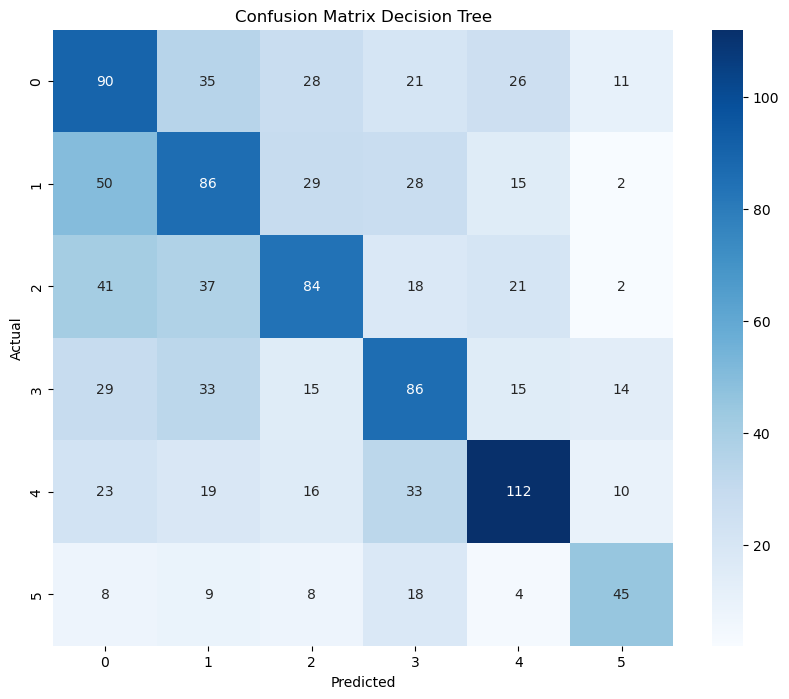

In [37]:
# Predict categories for testing dataset DT
y_pred_dt = grid_clf_dt.predict(X_test_User)
y_pred_proba_dt = grid_clf_dt.predict_proba(X_test_User)

#Plot the confusion Matrix
cm_dt = confusion_matrix(y_test_User, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

In [38]:
print("Classification report Decision Trees : ")
print(classification_report(y_test_User, y_pred_dt))
print()

Classification report Decision Trees : 
              precision    recall  f1-score   support

           0       0.37      0.43      0.40       211
           1       0.39      0.41      0.40       210
           2       0.47      0.41      0.44       203
           3       0.42      0.45      0.43       192
           4       0.58      0.53      0.55       213
           5       0.54      0.49      0.51        92

    accuracy                           0.45      1121
   macro avg       0.46      0.45      0.46      1121
weighted avg       0.45      0.45      0.45      1121




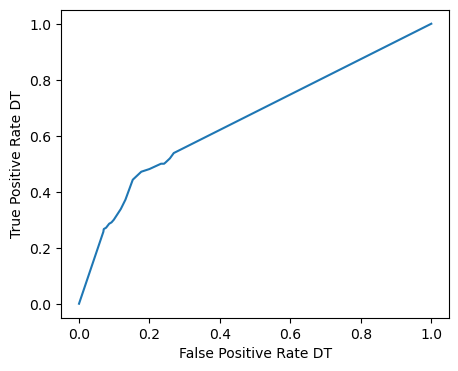

In [39]:
# Compute ROC curve DT
fpr_dt, tpr_dt, thresholds_dt = roc_curve(
    y_test_User, # the true class
    y_pred_proba_dt[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve DT
plt.figure(figsize = [5, 4])
plt.plot(fpr_dt, tpr_dt, '-')
plt.xlabel('False Positive Rate DT')
plt.ylabel('True Positive Rate DT')
plt.show()

## RANDOM FOREST


In [40]:
param_dict_rf = {
    'rf__n_estimators': [200,250,300,350],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth': range(5, 10),
    'rf__criterion': ['gini', 'entropy'],
    'select__k': range(1,18),  # Parameter for SelectKBest
}

clf_rf = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('rf', RandomForestClassifier())
])

In [41]:
max_iter = 100
grid_clf_rf = RandomizedSearchCV(
    estimator=clf_rf,
    param_distributions=param_dict_rf,
    scoring='f1_weighted',
    n_iter=max_iter,
    refit=True,
    cv=3,
    verbose=10
)

grid_clf_rf.fit(X_train_User, y_train_User)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=10
[CV 1/3; 1/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=10;, score=0.529 total time=   0.6s
[CV 2/3; 1/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=10
[CV 2/3; 1/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=10;, score=0.545 total time=   0.5s
[CV 3/3; 1/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=10
[CV 3/3; 1/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=10;, score=0.502 total time=   0.6s
[CV 1/3; 2/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=5
[CV 1/3;

[CV 2/3; 11/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=2;, score=0.355 total time=   0.4s
[CV 3/3; 11/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=2
[CV 3/3; 11/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=2;, score=0.349 total time=   0.4s
[CV 1/3; 12/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=3
[CV 1/3; 12/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=3;, score=0.427 total time=   0.3s
[CV 2/3; 12/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=3
[CV 2/3; 12/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=3;, score=0.433 total time=   0.3s
[CV 3/3; 12/100] START rf__criterion=entropy,

[CV 3/3; 21/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=15;, score=0.555 total time=   0.7s
[CV 1/3; 22/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=15
[CV 1/3; 22/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=15;, score=nan total time=   0.0s
[CV 2/3; 22/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=15
[CV 2/3; 22/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=15;, score=nan total time=   0.0s
[CV 3/3; 22/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=15
[CV 3/3; 22/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=350, select__k=15;, score=nan total time=   0.0s
[CV 1/3; 23/100] START rf__criterio

[CV 1/3; 33/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=250, select__k=2;, score=0.363 total time=   0.4s
[CV 2/3; 33/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=250, select__k=2
[CV 2/3; 33/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=250, select__k=2;, score=0.368 total time=   0.4s
[CV 3/3; 33/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=250, select__k=2
[CV 3/3; 33/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=250, select__k=2;, score=0.372 total time=   0.4s
[CV 1/3; 34/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=13
[CV 1/3; 34/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=13;, score=nan total time=   0.0s
[CV 2/3; 34/100] START rf__criterion

[CV 2/3; 43/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=15;, score=0.527 total time=   0.4s
[CV 3/3; 43/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=15
[CV 3/3; 43/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=15;, score=0.493 total time=   0.4s
[CV 1/3; 44/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=1
[CV 1/3; 44/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=1;, score=0.325 total time=   0.3s
[CV 2/3; 44/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=1
[CV 2/3; 44/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=300, select__k=1;, score=0.343 total time=   0.3s
[CV 3/3; 44/100] START rf__criterion=gini, rf

[CV 3/3; 53/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=7;, score=0.438 total time=   0.4s
[CV 1/3; 54/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=17
[CV 1/3; 54/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=17;, score=nan total time=   0.0s
[CV 2/3; 54/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=17
[CV 2/3; 54/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=17;, score=nan total time=   0.0s
[CV 3/3; 54/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=17
[CV 3/3; 54/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=200, select__k=17;, score=nan total time=   0.0s
[CV 1/3; 55/100] START rf__criterion=gini, rf__max_dep

[CV 1/3; 64/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=5;, score=0.515 total time=   0.7s
[CV 2/3; 64/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=5
[CV 2/3; 64/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=5;, score=0.539 total time=   0.7s
[CV 3/3; 64/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=5
[CV 3/3; 64/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=5;, score=0.496 total time=   0.7s
[CV 1/3; 65/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=13
[CV 1/3; 65/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=200, select__k=13;, score=nan total time=   0.0s
[CV 2/3; 65/100] START rf__criterion

[CV 1/3; 76/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=300, select__k=5;, score=0.496 total time=   0.7s
[CV 2/3; 76/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=300, select__k=5
[CV 2/3; 76/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=300, select__k=5;, score=0.526 total time=   0.7s
[CV 3/3; 76/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=300, select__k=5
[CV 3/3; 76/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=300, select__k=5;, score=0.491 total time=   0.7s
[CV 1/3; 77/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=15
[CV 1/3; 77/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=15;, score=nan total time=   0.0s
[CV 2/3; 77/100] START rf__criterion=gini,

[CV 2/3; 86/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=6;, score=0.462 total time=   0.3s
[CV 3/3; 86/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=6
[CV 3/3; 86/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=6;, score=0.423 total time=   0.3s
[CV 1/3; 87/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=6
[CV 1/3; 87/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=6;, score=0.459 total time=   0.4s
[CV 2/3; 87/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=6
[CV 2/3; 87/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=6;, score=0.465 total time=   0.4s
[CV 3/3; 87/100] START rf__criterion

[CV 3/3; 96/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=14;, score=0.536 total time=   0.7s
[CV 1/3; 97/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=5
[CV 1/3; 97/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=5;, score=nan total time=   0.0s
[CV 2/3; 97/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=5
[CV 2/3; 97/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=5;, score=nan total time=   0.0s
[CV 3/3; 97/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=5
[CV 3/3; 97/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=250, select__k=5;, score=nan total time=   0.0s
[CV 1/3; 98/100] START rf__criterion=entropy, rf__max_depth

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
93 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
93 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/pip

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('select',
                                              SelectKBest(score_func=<function f_regression at 0x15b959d00>)),
                                             ('rf', RandomForestClassifier())]),
                   n_iter=100,
                   param_distributions={'rf__criterion': ['gini', 'entropy'],
                                        'rf__max_depth': range(5, 10),
                                        'rf__max_features': ['auto', 'sqrt',
                                                             'log2'],
                                        'rf__n_estimators': [200, 250, 300,
                                                             350],
                                        'select__k': range(1, 18)},
                   scoring='f1_weighted', verbose=10)

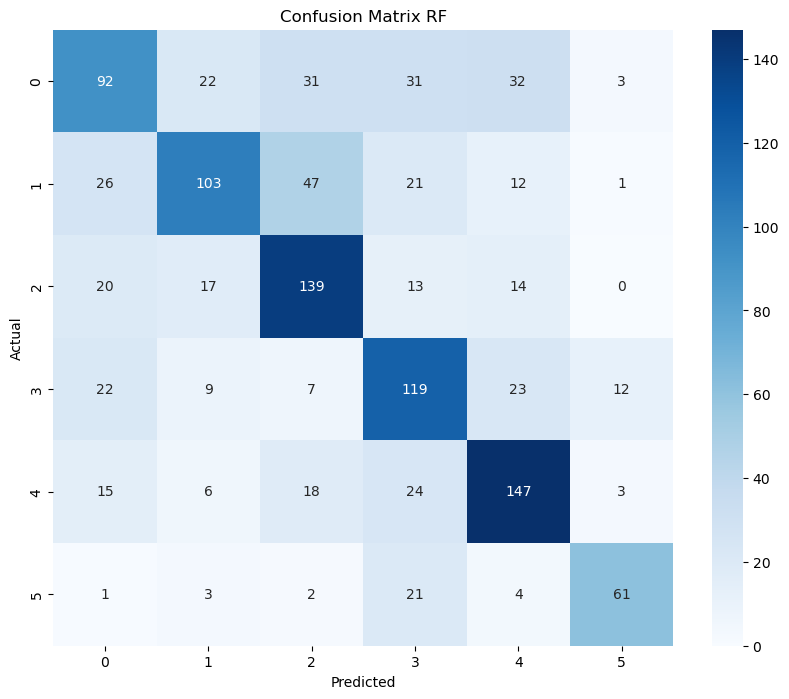

In [42]:
# Predict categories for testing dataset RF
y_pred_rf = grid_clf_rf.predict(X_test_User)
y_pred_proba_rf = grid_clf_rf.predict_proba(X_test_User)

# Create the confusion matrix for RF
cm_rf = confusion_matrix(y_test_User, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

In [43]:
print("Classification report Random Forest : ")
print(classification_report(y_test_User, y_pred_rf))
print()

Classification report Random Forest : 
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       211
           1       0.64      0.49      0.56       210
           2       0.57      0.68      0.62       203
           3       0.52      0.62      0.57       192
           4       0.63      0.69      0.66       213
           5       0.76      0.66      0.71        92

    accuracy                           0.59      1121
   macro avg       0.61      0.60      0.60      1121
weighted avg       0.59      0.59      0.59      1121




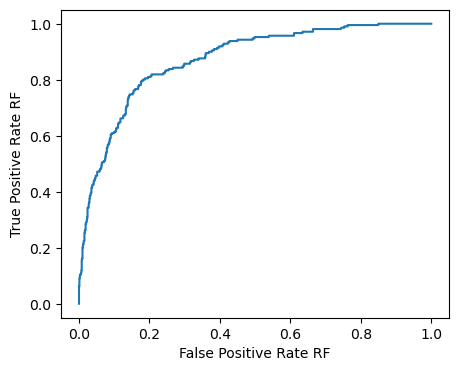

In [44]:
# Compute ROC curve RF
fpr_rf, tpr_rf, thresholds_rf = roc_curve(
    y_test_User, # the true class
    y_pred_proba_rf[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# Plot ROC curve RF
plt.figure(figsize = [5, 4])
plt.plot(fpr_rf, tpr_rf, '-')
plt.xlabel('False Positive Rate RF')
plt.ylabel('True Positive Rate RF')
plt.show()

We found that the most efficient algortihm is : 

### 6. Apply models to see which one fits the best for Year

Now that we have created the first model for predicting the user. we are going to create 6 models for predicting the year for each user.

In [45]:
#  Create 6 data frames for each user
# Group data by 'User' column and create a dictionary of DataFrames for each user
user_data = {}
# drop NA values 
data_copy.dropna(inplace=True)
# Remove duplicates for the mixed_playlist
data_copy.drop_duplicates(inplace=True)

known_data_copy = data_copy[data_copy['user'] != 'unknown']

users_list = known_data_copy['user'].unique()

delta_data= known_data_copy[known_data_copy['user'] == users_list[0]]
gamma_data = known_data_copy[known_data_copy['user'] == users_list[1]]
alpha_data = known_data_copy[known_data_copy['user'] == users_list[2]]
zeta_data = known_data_copy[known_data_copy['user'] == users_list[3]]
beta_data = known_data_copy[known_data_copy['user'] == users_list[4]]
epsilon_data = known_data_copy[known_data_copy['user'] == users_list[5]]


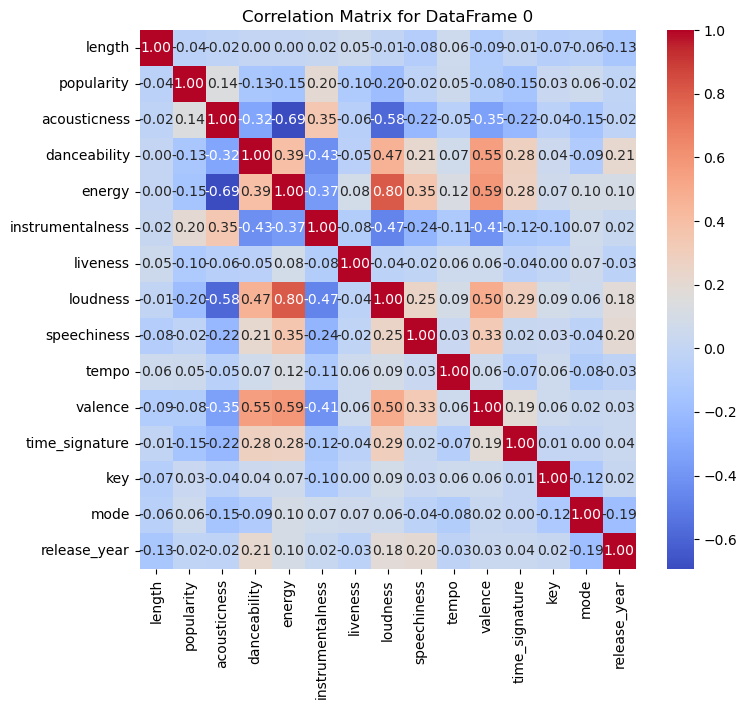

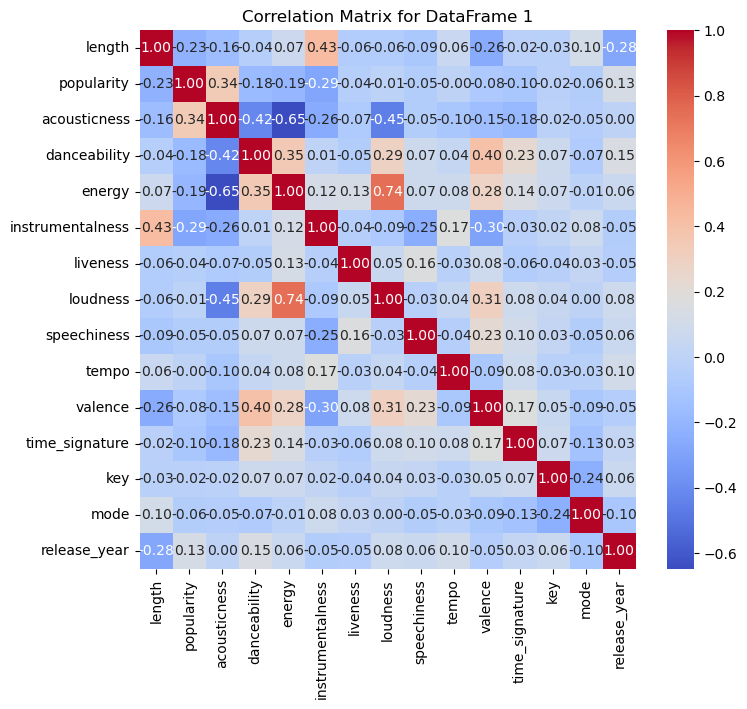

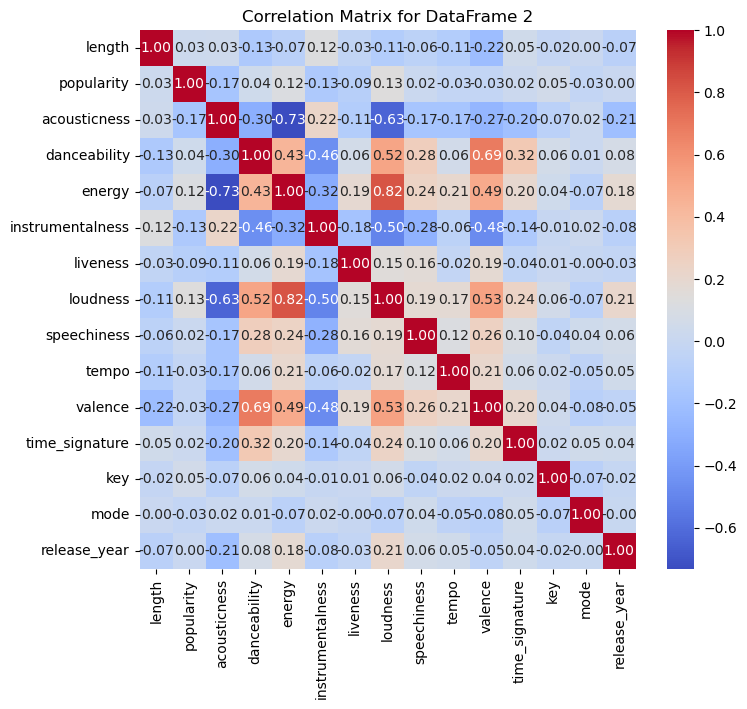

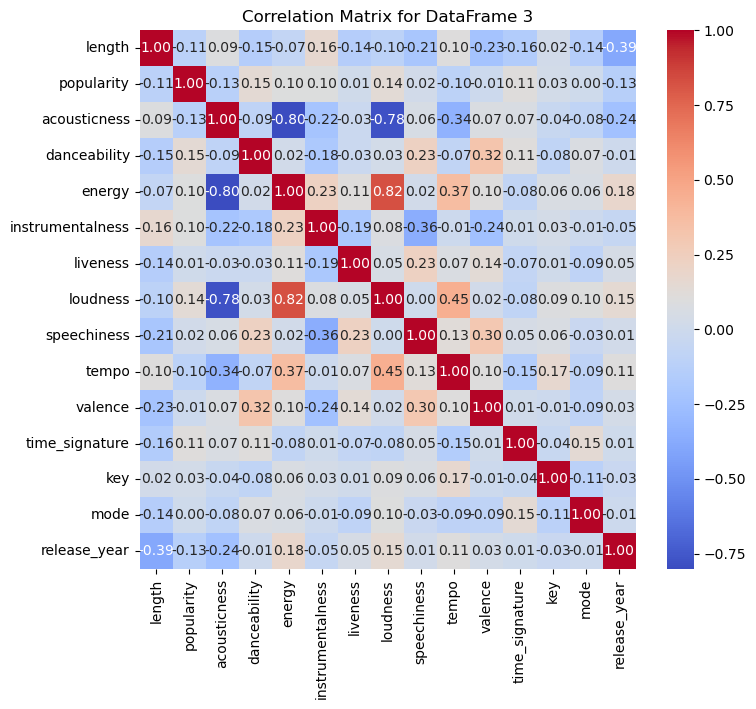

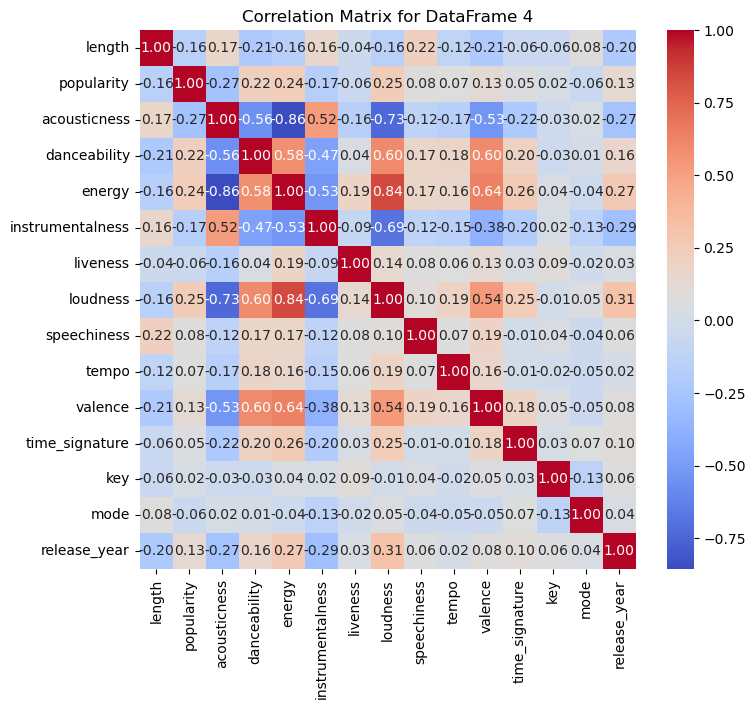

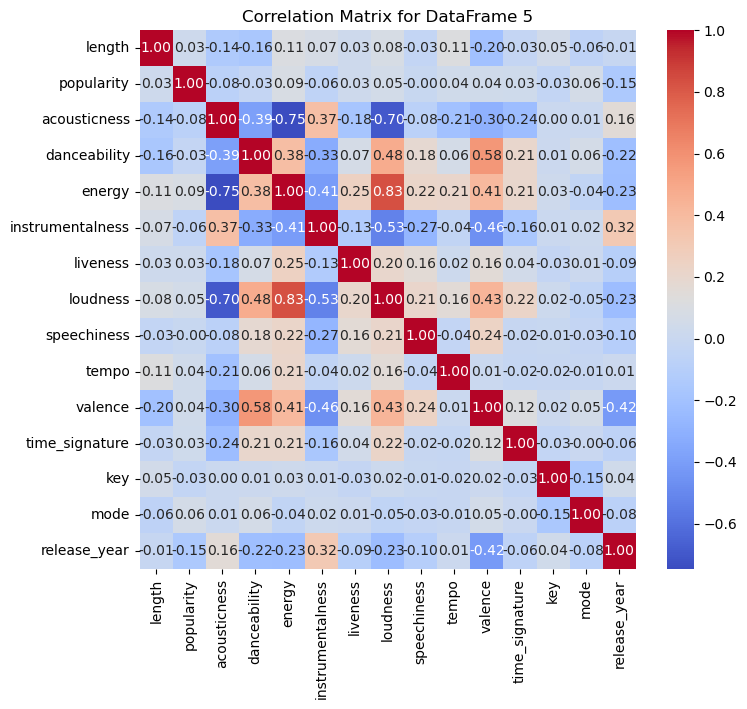

In [46]:
# Save each data frame in a list, in order to loop all lists and create the models
data_list = [delta_data, gamma_data, alpha_data, zeta_data, beta_data, epsilon_data]

# Create a heatmap for every user
for i, data in enumerate(data_list):
    corr = data.corr(numeric_only=True)
    plt.figure(figsize=(8,7))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for DataFrame {i}")
    plt.show()

In general, the feature loudness has a strong correlation with the energy feature, so we are going to remove loudness

In [47]:
# Assuming data_list is a list of pandas DataFrames
column_to_delete = 'loudness'
for i, data in enumerate(data_list):
    # Check if the column exists in the dataframe
    if column_to_delete in data.columns:
        # Delete the column and create a new DataFrame
        data_list[i] = data.drop(column_to_delete, axis=1)

    # Make sure 'name', 'artist', and 'album' columns exist before transforming
    if 'name' in data.columns:
        data_list[i]['name'] = label_encoder.fit_transform(data['name'])
    if 'artist' in data.columns:
        data_list[i]['artist'] = label_encoder.fit_transform(data['artist'])
    if 'album' in data.columns:
        data_list[i]['album'] = label_encoder.fit_transform(data['album'])

In [48]:
# Function to remove outliers from specified columns in each DataFrame
def remove_outliers(data_list, columns_to_check, threshold=3):
    for i, data in enumerate(data_list):
        for column in columns_to_check:
            if column in data.columns:
                z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
                data_list[i] = data[(z_scores < threshold)]
    return data_list

# Specify columns and call the function to remove outliers
columns_to_check = ['name','artist','album','length', 'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'time_signature', 'key', 'mode'] # Specify columns to check for outliers
data_list = remove_outliers(data_list, columns_to_check)

Now, its time to create the models for each user, for this part we are going to use a for loop and for each iteratiion we are going to create the target and feature values. And then we are going to apply a random forest algorithm since this one had very good results in the first part

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=14
[CV 1/3; 1/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=14;, score=0.335 total time=   0.1s
[CV 2/3; 1/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=14
[CV 2/3; 1/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=14;, score=0.298 total time=   0.1s
[CV 3/3; 1/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=14
[CV 3/3; 1/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=14;, score=0.297 total time=   0.1s
[CV 1/3; 2/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=9
[CV 1/3; 2/100] END rf_

[CV 2/3; 12/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=17;, score=0.311 total time=   0.1s
[CV 3/3; 12/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=17
[CV 3/3; 12/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=200, select__k=17;, score=0.308 total time=   0.1s
[CV 1/3; 13/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=14
[CV 1/3; 13/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=14;, score=nan total time=   0.0s
[CV 2/3; 13/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=14
[CV 2/3; 13/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=14;, score=nan total time=   0.0s
[CV 3/3; 13/100] START rf__criterion=entro

[CV 1/3; 23/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=15;, score=0.337 total time=   0.3s
[CV 2/3; 23/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=15
[CV 2/3; 23/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=15;, score=0.289 total time=   0.3s
[CV 3/3; 23/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=15
[CV 3/3; 23/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=15;, score=0.323 total time=   0.3s
[CV 1/3; 24/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=7
[CV 1/3; 24/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=7;, score=0.336 total time=   0.2s
[CV 2/3; 24/100] START rf__criterion=

[CV 2/3; 33/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=12;, score=0.309 total time=   0.1s
[CV 3/3; 33/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=12
[CV 3/3; 33/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=12;, score=0.290 total time=   0.1s
[CV 1/3; 34/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=6
[CV 1/3; 34/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=6;, score=0.277 total time=   0.2s
[CV 2/3; 34/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=6
[CV 2/3; 34/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=300, select__k=6;, score=0.245 total time=   0.2s
[CV 3/3; 34/100] START rf__criterion=entro

[CV 3/3; 43/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=9;, score=0.304 total time=   0.1s
[CV 1/3; 44/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=8
[CV 1/3; 44/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=8;, score=0.326 total time=   0.1s
[CV 2/3; 44/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=8
[CV 2/3; 44/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=8;, score=0.308 total time=   0.1s
[CV 3/3; 44/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=8
[CV 3/3; 44/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=8;, score=0.347 total time=   0.1s
[CV 1/3; 45/100] START rf__criterion=gini, rf__max_dep

[CV 1/3; 54/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=5;, score=0.256 total time=   0.2s
[CV 2/3; 54/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=5
[CV 2/3; 54/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=5;, score=0.251 total time=   0.2s
[CV 3/3; 54/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=5
[CV 3/3; 54/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=5;, score=0.277 total time=   0.2s
[CV 1/3; 55/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=16
[CV 1/3; 55/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=16;, score=nan total time=   0.0s
[CV 2/3; 55/100] START rf__criterion

[CV 1/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=5;, score=0.252 total time=   0.2s
[CV 2/3; 65/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=5
[CV 2/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=5;, score=0.287 total time=   0.2s
[CV 3/3; 65/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=5
[CV 3/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=5;, score=0.262 total time=   0.2s
[CV 1/3; 66/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=200, select__k=2
[CV 1/3; 66/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=200, select__k=2;, score=nan total time=   0.0s
[CV 2/3; 66/100] START rf__criterion=e

[CV 1/3; 76/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=5;, score=0.257 total time=   0.1s
[CV 2/3; 76/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=5
[CV 2/3; 76/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=5;, score=0.246 total time=   0.1s
[CV 3/3; 76/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=5
[CV 3/3; 76/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=5;, score=0.308 total time=   0.1s
[CV 1/3; 77/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=13
[CV 1/3; 77/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=13;, score=nan total time=   0.0s
[CV 2/3; 77/100] START rf__criterion=gini, rf__max_depth=

[CV 3/3; 86/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=11;, score=0.297 total time=   0.1s
[CV 1/3; 87/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=11
[CV 1/3; 87/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=11;, score=0.337 total time=   0.2s
[CV 2/3; 87/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=11
[CV 2/3; 87/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=11;, score=0.310 total time=   0.2s
[CV 3/3; 87/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=11
[CV 3/3; 87/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=300, select__k=11;, score=0.295 total time=   0.2s
[CV 1/3; 88/100] START rf__criterion=entropy, rf__

[CV 1/3; 97/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=16;, score=0.362 total time=   0.2s
[CV 2/3; 97/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=16
[CV 2/3; 97/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=16;, score=0.278 total time=   0.2s
[CV 3/3; 97/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=16
[CV 3/3; 97/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=16;, score=0.282 total time=   0.2s
[CV 1/3; 98/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=8
[CV 1/3; 98/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=350, select__k=8;, score=nan total time=   0.0s
[CV 2/3; 98/100] START rf__criter

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/p

Best hyper-parameters: {'select__k': 11, 'rf__n_estimators': 200, 'rf__max_features': 'sqrt', 'rf__max_depth': 7, 'rf__criterion': 'entropy'}
Best score: 0.3368622618818145


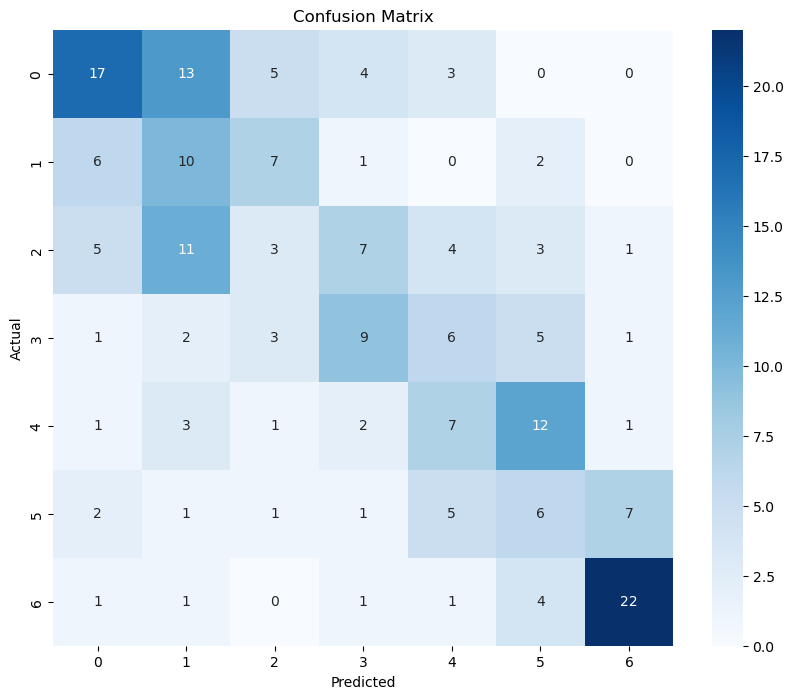

              precision    recall  f1-score   support

           0       0.52      0.40      0.45        42
           1       0.24      0.38      0.30        26
           2       0.15      0.09      0.11        34
           3       0.36      0.33      0.35        27
           4       0.27      0.26      0.26        27
           5       0.19      0.26      0.22        23
           6       0.69      0.73      0.71        30

    accuracy                           0.35       209
   macro avg       0.34      0.35      0.34       209
weighted avg       0.36      0.35      0.35       209

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=2
[CV 1/3; 1/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=2;, score=0.163 total time=   0.1s
[CV 2/3; 1/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_f

[CV 3/3; 10/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=3;, score=0.209 total time=   0.1s
[CV 1/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=16
[CV 1/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=16;, score=nan total time=   0.0s
[CV 2/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=16
[CV 2/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=16;, score=nan total time=   0.0s
[CV 3/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=16
[CV 3/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=auto, rf__n_estimators=300, select__k=16;, score=nan total time=   0.0s
[CV 1/3; 12/100] START rf__criterion=gini, rf__max_depth=

[CV 1/3; 21/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=8;, score=0.313 total time=   0.1s
[CV 2/3; 21/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=8
[CV 2/3; 21/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=8;, score=0.272 total time=   0.1s
[CV 3/3; 21/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=8
[CV 3/3; 21/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=8;, score=0.314 total time=   0.1s
[CV 1/3; 22/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=12
[CV 1/3; 22/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=12;, score=nan total time=   0.0s
[CV 2/3; 22/100] START rf__criterion=gini,

[CV 2/3; 31/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=17;, score=0.318 total time=   0.2s
[CV 3/3; 31/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=17
[CV 3/3; 31/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=17;, score=0.301 total time=   0.2s
[CV 1/3; 32/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=5
[CV 1/3; 32/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=5;, score=nan total time=   0.0s
[CV 2/3; 32/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=5
[CV 2/3; 32/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=5;, score=nan total time=   0.0s
[CV 3/3; 32/100] START rf__criterion=entropy, 

[CV 3/3; 41/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=350, select__k=16;, score=0.292 total time=   0.3s
[CV 1/3; 42/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=4
[CV 1/3; 42/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=4;, score=0.386 total time=   0.1s
[CV 2/3; 42/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=4
[CV 2/3; 42/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=4;, score=0.302 total time=   0.1s
[CV 3/3; 42/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=4
[CV 3/3; 42/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=4;, score=0.228 total time=   0.1s
[CV 1/3; 43/100] START rf__criterion=gini, rf__max_de

[CV 2/3; 52/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=4;, score=0.346 total time=   0.1s
[CV 3/3; 52/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=4
[CV 3/3; 52/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=4;, score=0.214 total time=   0.1s
[CV 1/3; 53/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=2
[CV 1/3; 53/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=2;, score=0.182 total time=   0.1s
[CV 2/3; 53/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=2
[CV 2/3; 53/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=2;, score=0.173 total time=   0.1s
[CV 3/3; 53/100] START rf__criterion

[CV 3/3; 62/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=8;, score=0.318 total time=   0.2s
[CV 1/3; 63/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=13
[CV 1/3; 63/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=13;, score=0.349 total time=   0.2s
[CV 2/3; 63/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=13
[CV 2/3; 63/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=13;, score=0.323 total time=   0.2s
[CV 3/3; 63/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=13
[CV 3/3; 63/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=13;, score=0.298 total time=   0.2s
[CV 1/3; 64/100] START rf__criter

[CV 2/3; 74/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=11;, score=0.280 total time=   0.2s
[CV 3/3; 74/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=11
[CV 3/3; 74/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=11;, score=0.318 total time=   0.2s
[CV 1/3; 75/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=15
[CV 1/3; 75/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=15;, score=0.337 total time=   0.2s
[CV 2/3; 75/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=15
[CV 2/3; 75/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=250, select__k=15;, score=0.291 total time=   0.1s
[CV 3/3; 75/100] START rf__criterion=gini

[CV 3/3; 84/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=1;, score=0.229 total time=   0.1s
[CV 1/3; 85/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=12
[CV 1/3; 85/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=12;, score=0.331 total time=   0.2s
[CV 2/3; 85/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=12
[CV 2/3; 85/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=12;, score=0.274 total time=   0.2s
[CV 3/3; 85/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=12
[CV 3/3; 85/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=300, select__k=12;, score=0.331 total time=   0.2s
[CV 1/3; 86/100] START rf__cri

[CV 1/3; 95/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=14;, score=0.352 total time=   0.2s
[CV 2/3; 95/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=14
[CV 2/3; 95/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=14;, score=0.319 total time=   0.2s
[CV 3/3; 95/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=14
[CV 3/3; 95/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=14;, score=0.294 total time=   0.2s
[CV 1/3; 96/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=11
[CV 1/3; 96/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=11;, score=0.375 total time=   0.2s
[CV 2/3; 96/100] START rf__criterion=gini, rf__max

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/pip

Best hyper-parameters: {'select__k': 6, 'rf__n_estimators': 350, 'rf__max_features': 'log2', 'rf__max_depth': 5, 'rf__criterion': 'entropy'}
Best score: 0.3363752807635812


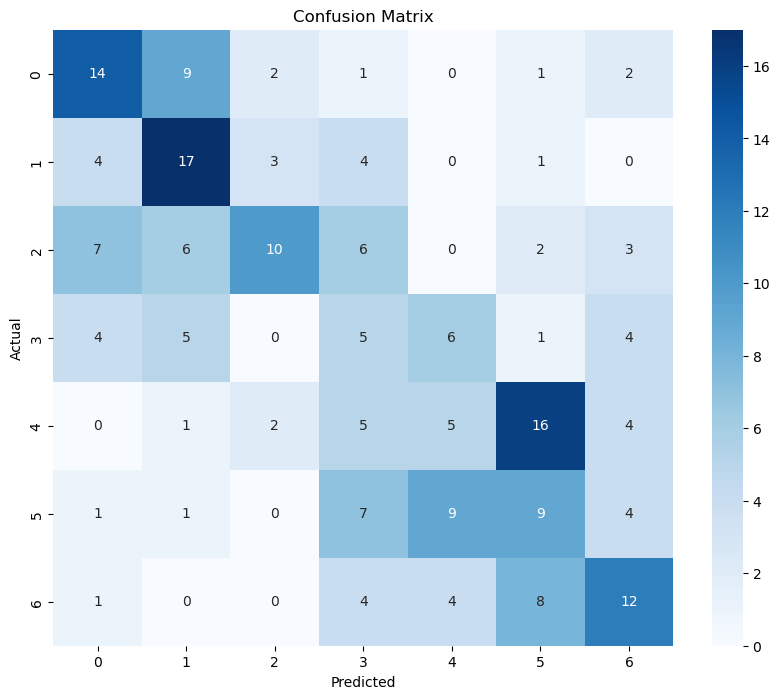

              precision    recall  f1-score   support

           0       0.45      0.48      0.47        29
           1       0.44      0.59      0.50        29
           2       0.59      0.29      0.39        34
           3       0.16      0.20      0.18        25
           4       0.21      0.15      0.18        33
           5       0.24      0.29      0.26        31
           6       0.41      0.41      0.41        29

    accuracy                           0.34       210
   macro avg       0.36      0.35      0.34       210
weighted avg       0.36      0.34      0.34       210

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=1
[CV 1/3; 1/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=250, select__k=1;, score=0.194 total time=   0.1s
[CV 2/3; 1/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=s

[CV 1/3; 11/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=5;, score=0.405 total time=   0.1s
[CV 2/3; 11/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=5
[CV 2/3; 11/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=5;, score=0.266 total time=   0.1s
[CV 3/3; 11/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=5
[CV 3/3; 11/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=5;, score=0.371 total time=   0.1s
[CV 1/3; 12/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=350, select__k=8
[CV 1/3; 12/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=350, select__k=8;, score=0.417 total time=   0.3s
[CV 2/3; 12/100] START rf__criterion

[CV 2/3; 21/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=250, select__k=5;, score=0.305 total time=   0.2s
[CV 3/3; 21/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=250, select__k=5
[CV 3/3; 21/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=250, select__k=5;, score=0.361 total time=   0.2s
[CV 1/3; 22/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=4
[CV 1/3; 22/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=4;, score=nan total time=   0.0s
[CV 2/3; 22/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=4
[CV 2/3; 22/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=4;, score=nan total time=   0.0s
[CV 3/3; 22/100] START rf__criterion=gini, rf__max_d

[CV 1/3; 32/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=14;, score=0.410 total time=   0.1s
[CV 2/3; 32/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=14
[CV 2/3; 32/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=14;, score=0.393 total time=   0.1s
[CV 3/3; 32/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=14
[CV 3/3; 32/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=14;, score=0.365 total time=   0.1s
[CV 1/3; 33/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=12
[CV 1/3; 33/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=12;, score=0.455 total time=   0.1s
[CV 2/3; 33/100] START rf__criterion=gini, rf__max

[CV 2/3; 42/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=300, select__k=1;, score=0.145 total time=   0.1s
[CV 3/3; 42/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=300, select__k=1
[CV 3/3; 42/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=300, select__k=1;, score=0.174 total time=   0.1s
[CV 1/3; 43/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=11
[CV 1/3; 43/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=11;, score=nan total time=   0.0s
[CV 2/3; 43/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=11
[CV 2/3; 43/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=11;, score=nan total time=   0.0s
[CV 3/3; 43/100] START rf__criterion=gini, rf__max_depth=

[CV 1/3; 53/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=13;, score=0.441 total time=   0.1s
[CV 2/3; 53/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=13
[CV 2/3; 53/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=13;, score=0.384 total time=   0.1s
[CV 3/3; 53/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=13
[CV 3/3; 53/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=13;, score=0.421 total time=   0.1s
[CV 1/3; 54/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=13
[CV 1/3; 54/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=250, select__k=13;, score=nan total time=   0.0s
[CV 2/3; 54/100] START rf__criterion=entropy, 

[CV 1/3; 64/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=7;, score=0.360 total time=   0.1s
[CV 2/3; 64/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=7
[CV 2/3; 64/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=7;, score=0.350 total time=   0.1s
[CV 3/3; 64/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=7
[CV 3/3; 64/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=7;, score=0.409 total time=   0.1s
[CV 1/3; 65/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=11
[CV 1/3; 65/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=350, select__k=11;, score=0.428 total time=   0.2s
[CV 2/3; 65/100] START rf__criterion=gin

[CV 2/3; 76/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=6;, score=0.341 total time=   0.2s
[CV 3/3; 76/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=6
[CV 3/3; 76/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=6;, score=0.411 total time=   0.2s
[CV 1/3; 77/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=13
[CV 1/3; 77/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=13;, score=nan total time=   0.0s
[CV 2/3; 77/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=13
[CV 2/3; 77/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=auto, rf__n_estimators=250, select__k=13;, score=nan total time=   0.0s
[CV 3/3; 77/100] START rf__criterion

[CV 3/3; 86/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=9;, score=0.410 total time=   0.2s
[CV 1/3; 87/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=16
[CV 1/3; 87/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=16;, score=0.469 total time=   0.2s
[CV 2/3; 87/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=16
[CV 2/3; 87/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=16;, score=0.361 total time=   0.2s
[CV 3/3; 87/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=16
[CV 3/3; 87/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=350, select__k=16;, score=0.394 total time=   0.2s
[CV 1/3; 88/100] START rf__criterion=gini, rf__max_

[CV 1/3; 97/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=3;, score=0.335 total time=   0.1s
[CV 2/3; 97/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=3
[CV 2/3; 97/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=3;, score=0.300 total time=   0.1s
[CV 3/3; 97/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=3
[CV 3/3; 97/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=3;, score=0.330 total time=   0.1s
[CV 1/3; 98/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=17
[CV 1/3; 98/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=17;, score=0.443 total time=   0.1s
[CV 2/3; 98/100] START rf__criterion=gin

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/pip

Best hyper-parameters: {'select__k': 16, 'rf__n_estimators': 200, 'rf__max_features': 'log2', 'rf__max_depth': 9, 'rf__criterion': 'entropy'}
Best score: 0.41979453710036446


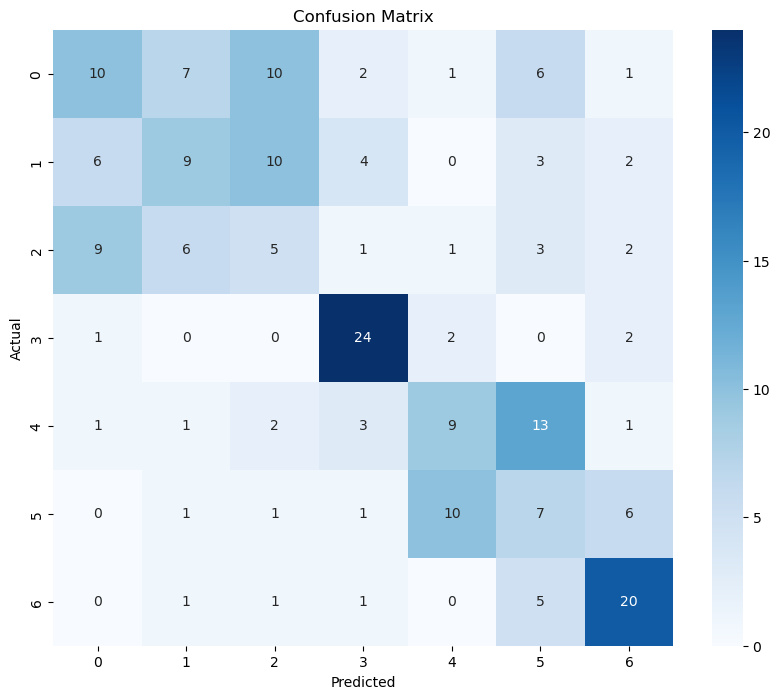

              precision    recall  f1-score   support

           0       0.37      0.27      0.31        37
           1       0.36      0.26      0.31        34
           2       0.17      0.19      0.18        27
           3       0.67      0.83      0.74        29
           4       0.39      0.30      0.34        30
           5       0.19      0.27      0.22        26
           6       0.59      0.71      0.65        28

    accuracy                           0.40       211
   macro avg       0.39      0.40      0.39       211
weighted avg       0.39      0.40      0.39       211

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=9
[CV 1/3; 1/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=9;, score=0.507 total time=   0.1s
[CV 2/3; 1/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_f

[CV 1/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=17;, score=0.569 total time=   0.2s
[CV 2/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=17
[CV 2/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=17;, score=0.551 total time=   0.1s
[CV 3/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=17
[CV 3/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=17;, score=0.512 total time=   0.1s
[CV 1/3; 12/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=15
[CV 1/3; 12/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=250, select__k=15;, score=0.606 total time=   0.1s
[CV 2/3; 12/100] START rf__criterion=gini, rf__max

[CV 2/3; 21/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=12;, score=0.593 total time=   0.1s
[CV 3/3; 21/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=12
[CV 3/3; 21/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=12;, score=0.531 total time=   0.1s
[CV 1/3; 22/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=2
[CV 1/3; 22/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=2;, score=nan total time=   0.0s
[CV 2/3; 22/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=2
[CV 2/3; 22/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=auto, rf__n_estimators=300, select__k=2;, score=nan total time=   0.0s
[CV 3/3; 22/100] START rf__criterion=entropy, 

[CV 1/3; 32/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=6;, score=0.504 total time=   0.1s
[CV 2/3; 32/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=6
[CV 2/3; 32/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=6;, score=0.383 total time=   0.1s
[CV 3/3; 32/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=6
[CV 3/3; 32/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=6;, score=0.497 total time=   0.1s
[CV 1/3; 33/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=13
[CV 1/3; 33/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=13;, score=0.607 total time=   0.1s
[CV 2/3; 33/100] START rf__criterion=gin

[CV 3/3; 42/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=2;, score=0.505 total time=   0.1s
[CV 1/3; 43/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=4
[CV 1/3; 43/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=4;, score=0.387 total time=   0.1s
[CV 2/3; 43/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=4
[CV 2/3; 43/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=4;, score=0.396 total time=   0.1s
[CV 3/3; 43/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=4
[CV 3/3; 43/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=4;, score=0.537 total time=   0.1s
[CV 1/3; 44/100] START rf__criterion

[CV 3/3; 53/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=6;, score=0.524 total time=   0.1s
[CV 1/3; 54/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=1
[CV 1/3; 54/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=1;, score=0.285 total time=   0.1s
[CV 2/3; 54/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=1
[CV 2/3; 54/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=1;, score=0.283 total time=   0.1s
[CV 3/3; 54/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=1
[CV 3/3; 54/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=1;, score=0.374 total time=   0.1s
[CV 1/3; 55/100] START rf__criterion=gini, rf__max_depth=

[CV 3/3; 66/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=250, select__k=7;, score=0.460 total time=   0.1s
[CV 1/3; 67/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=14
[CV 1/3; 67/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=14;, score=0.590 total time=   0.1s
[CV 2/3; 67/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=14
[CV 2/3; 67/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=14;, score=0.604 total time=   0.1s
[CV 3/3; 67/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=14
[CV 3/3; 67/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=14;, score=0.517 total time=   0.1s
[CV 1/3; 68/100] START rf__criterion=entropy, rf__m

[CV 1/3; 77/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=5;, score=0.444 total time=   0.1s
[CV 2/3; 77/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=5
[CV 2/3; 77/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=5;, score=0.473 total time=   0.1s
[CV 3/3; 77/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=5
[CV 3/3; 77/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=350, select__k=5;, score=0.565 total time=   0.1s
[CV 1/3; 78/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=10
[CV 1/3; 78/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=350, select__k=10;, score=0.487 total time=   0.2s
[CV 2/3; 78/100] START rf__criteri

[CV 2/3; 87/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=17;, score=0.578 total time=   0.1s
[CV 3/3; 87/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=17
[CV 3/3; 87/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=17;, score=0.525 total time=   0.1s
[CV 1/3; 88/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=13
[CV 1/3; 88/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=13;, score=0.565 total time=   0.1s
[CV 2/3; 88/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=13
[CV 2/3; 88/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=250, select__k=13;, score=0.590 total time=   0.1s
[CV 3/3; 88/100] START rf__criterion=gini, rf__max

[CV 3/3; 97/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=250, select__k=10;, score=0.504 total time=   0.1s
[CV 1/3; 98/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=8
[CV 1/3; 98/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=8;, score=0.487 total time=   0.1s
[CV 2/3; 98/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=8
[CV 2/3; 98/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=8;, score=0.358 total time=   0.1s
[CV 3/3; 98/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=8
[CV 3/3; 98/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=8;, score=0.555 total time=   0.1s
[CV 1/3; 99/100] START rf__criterio

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
111 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/p

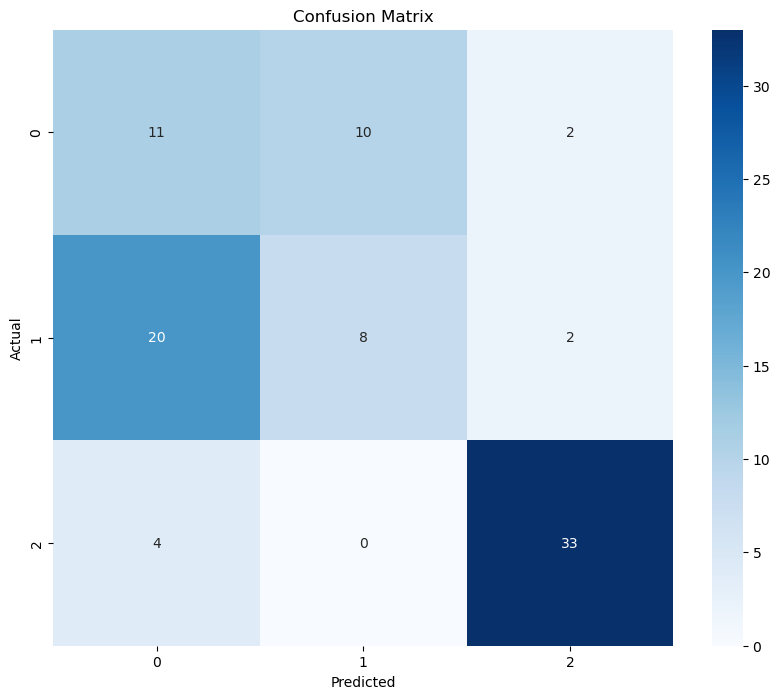

              precision    recall  f1-score   support

           4       0.31      0.48      0.38        23
           5       0.44      0.27      0.33        30
           6       0.89      0.89      0.89        37

    accuracy                           0.58        90
   macro avg       0.55      0.55      0.53        90
weighted avg       0.60      0.58      0.57        90

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=4
[CV 1/3; 1/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=4;, score=0.286 total time=   0.1s
[CV 2/3; 1/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=4
[CV 2/3; 1/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=200, select__k=4;, score=0.482 total time=   0.1s
[CV 3/3; 1/100] ST

[CV 1/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=6;, score=0.465 total time=   0.1s
[CV 2/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=6
[CV 2/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=6;, score=0.475 total time=   0.1s
[CV 3/3; 11/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=6
[CV 3/3; 11/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=6;, score=0.458 total time=   0.1s
[CV 1/3; 12/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=7
[CV 1/3; 12/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=200, select__k=7;, score=0.492 total time=   0.1s
[CV 2/3; 12/100] START rf__criterion=entropy, rf__m

[CV 2/3; 21/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=350, select__k=13;, score=0.595 total time=   0.2s
[CV 3/3; 21/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=350, select__k=13
[CV 3/3; 21/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=350, select__k=13;, score=0.598 total time=   0.2s
[CV 1/3; 22/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=14
[CV 1/3; 22/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=14;, score=0.530 total time=   0.2s
[CV 2/3; 22/100] START rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=14
[CV 2/3; 22/100] END rf__criterion=gini, rf__max_depth=6, rf__max_features=log2, rf__n_estimators=350, select__k=14;, score=0.540 total time=   0.2s
[CV 3/3; 22/100] START rf__criterion=gini, rf__max

[CV 3/3; 31/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=3;, score=0.293 total time=   0.2s
[CV 1/3; 32/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=17
[CV 1/3; 32/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=17;, score=0.503 total time=   0.1s
[CV 2/3; 32/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=17
[CV 2/3; 32/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=17;, score=0.594 total time=   0.1s
[CV 3/3; 32/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=17
[CV 3/3; 32/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=17;, score=0.562 total time=   0.1s
[CV 1/3; 33/100] START rf__criterion=entropy, rf

[CV 1/3; 43/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=16;, score=0.515 total time=   0.2s
[CV 2/3; 43/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=16
[CV 2/3; 43/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=16;, score=0.610 total time=   0.2s
[CV 3/3; 43/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=16
[CV 3/3; 43/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=16;, score=0.573 total time=   0.2s
[CV 1/3; 44/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=11
[CV 1/3; 44/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=200, select__k=11;, score=0.539 total time=   0.1s
[CV 2/3; 44/100] START rf__criterio

[CV 2/3; 54/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=5;, score=0.462 total time=   0.1s
[CV 3/3; 54/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=5
[CV 3/3; 54/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=5;, score=0.486 total time=   0.1s
[CV 1/3; 55/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=1
[CV 1/3; 55/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=1;, score=nan total time=   0.0s
[CV 2/3; 55/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=1
[CV 2/3; 55/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=300, select__k=1;, score=nan total time=   0.0s
[CV 3/3; 55/100] START rf__criterion=gini, rf__max_depth=5, r

[CV 3/3; 64/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=16;, score=0.587 total time=   0.2s
[CV 1/3; 65/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=1
[CV 1/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=1;, score=0.224 total time=   0.1s
[CV 2/3; 65/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=1
[CV 2/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=1;, score=0.181 total time=   0.1s
[CV 3/3; 65/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=1
[CV 3/3; 65/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=250, select__k=1;, score=0.216 total time=   0.1s
[CV 1/3; 66/100] START rf__criterion=g

[CV 1/3; 75/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=6;, score=0.478 total time=   0.2s
[CV 2/3; 75/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=6
[CV 2/3; 75/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=6;, score=0.486 total time=   0.2s
[CV 3/3; 75/100] START rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=6
[CV 3/3; 75/100] END rf__criterion=gini, rf__max_depth=5, rf__max_features=sqrt, rf__n_estimators=350, select__k=6;, score=0.477 total time=   0.2s
[CV 1/3; 76/100] START rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=9
[CV 1/3; 76/100] END rf__criterion=gini, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=9;, score=0.501 total time=   0.2s
[CV 2/3; 76/100] START rf__criterion=gini, rf__max_depth=

[CV 2/3; 85/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=2;, score=0.478 total time=   0.1s
[CV 3/3; 85/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=2
[CV 3/3; 85/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=2;, score=0.229 total time=   0.1s
[CV 1/3; 86/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=2
[CV 1/3; 86/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=2;, score=nan total time=   0.0s
[CV 2/3; 86/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=2
[CV 2/3; 86/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=200, select__k=2;, score=nan total time=   0.0s
[CV 3/3; 86/100] START rf__criterion=entropy, rf_

[CV 1/3; 96/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=5;, score=0.488 total time=   0.2s
[CV 2/3; 96/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=5
[CV 2/3; 96/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=5;, score=0.475 total time=   0.2s
[CV 3/3; 96/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=5
[CV 3/3; 96/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=5;, score=0.509 total time=   0.2s
[CV 1/3; 97/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=3
[CV 1/3; 97/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=auto, rf__n_estimators=250, select__k=3;, score=nan total time=   0.0s
[CV 2/3; 97/100] START rf__criterion=e

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/p

Best hyper-parameters: {'select__k': 16, 'rf__n_estimators': 250, 'rf__max_features': 'log2', 'rf__max_depth': 9, 'rf__criterion': 'gini'}
Best score: 0.5777819399535945


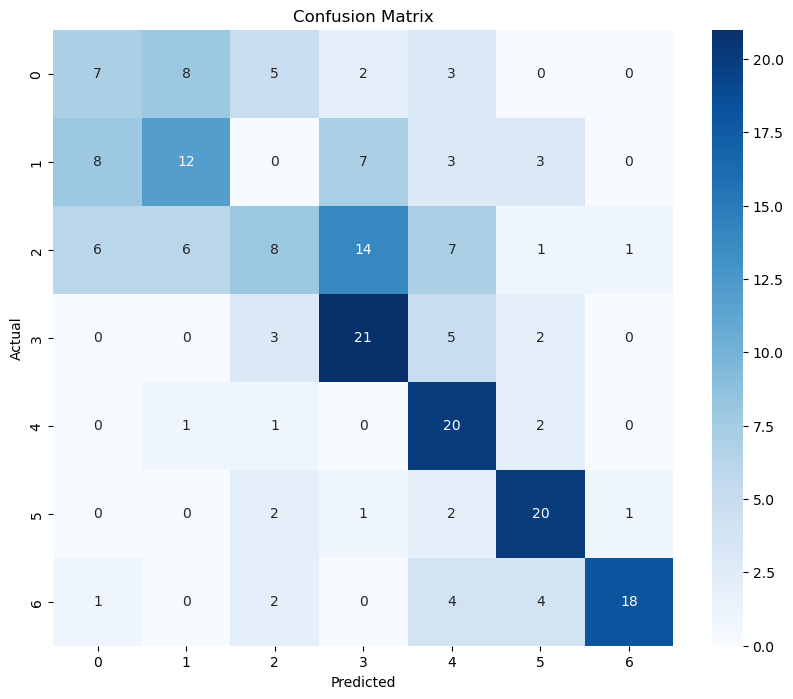

              precision    recall  f1-score   support

           0       0.32      0.28      0.30        25
           1       0.44      0.36      0.40        33
           2       0.38      0.19      0.25        43
           3       0.47      0.68      0.55        31
           4       0.45      0.83      0.59        24
           5       0.62      0.77      0.69        26
           6       0.90      0.62      0.73        29

    accuracy                           0.50       211
   macro avg       0.51      0.53      0.50       211
weighted avg       0.51      0.50      0.48       211

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=1
[CV 1/3; 1/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=1;, score=0.161 total time=   0.2s
[CV 2/3; 1/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_f

[CV 2/3; 10/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=4;, score=0.346 total time=   0.2s
[CV 3/3; 10/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=4
[CV 3/3; 10/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=250, select__k=4;, score=0.359 total time=   0.2s
[CV 1/3; 11/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=6
[CV 1/3; 11/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=6;, score=0.406 total time=   0.2s
[CV 2/3; 11/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=6
[CV 2/3; 11/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=6;, score=0.375 total time=   0.2s
[CV 3/3; 11/100] START rf__criterion

[CV 3/3; 20/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=300, select__k=11;, score=0.456 total time=   0.2s
[CV 1/3; 21/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=12
[CV 1/3; 21/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=12;, score=0.445 total time=   0.2s
[CV 2/3; 21/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=12
[CV 2/3; 21/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=12;, score=0.424 total time=   0.2s
[CV 3/3; 21/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=12
[CV 3/3; 21/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=300, select__k=12;, score=0.471 total time=   0.2s
[CV 1/3; 22/100] START rf__cr

[CV 1/3; 33/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=14;, score=0.392 total time=   0.1s
[CV 2/3; 33/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=14
[CV 2/3; 33/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=14;, score=0.391 total time=   0.2s
[CV 3/3; 33/100] START rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=14
[CV 3/3; 33/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=log2, rf__n_estimators=200, select__k=14;, score=0.414 total time=   0.2s
[CV 1/3; 34/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=6
[CV 1/3; 34/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=auto, rf__n_estimators=300, select__k=6;, score=nan total time=   0.0s
[CV 2/3; 34/100] START rf__criter

[CV 1/3; 45/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=350, select__k=7;, score=0.375 total time=   0.2s
[CV 2/3; 45/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=350, select__k=7
[CV 2/3; 45/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=350, select__k=7;, score=0.404 total time=   0.2s
[CV 3/3; 45/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=350, select__k=7
[CV 3/3; 45/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=350, select__k=7;, score=0.464 total time=   0.2s
[CV 1/3; 46/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=6
[CV 1/3; 46/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=6;, score=0.397 total time=   0.1s
[CV 2/3; 46/100] START rf__criterion

[CV 2/3; 56/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=9;, score=0.450 total time=   0.2s
[CV 3/3; 56/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=9
[CV 3/3; 56/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=9;, score=0.485 total time=   0.2s
[CV 1/3; 57/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=13
[CV 1/3; 57/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=13;, score=0.421 total time=   0.1s
[CV 2/3; 57/100] START rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=13
[CV 2/3; 57/100] END rf__criterion=entropy, rf__max_depth=7, rf__max_features=sqrt, rf__n_estimators=200, select__k=13;, score=0.447 total time=   0.1s
[CV 3/3; 57/100] START rf__crite

[CV 3/3; 66/100] END rf__criterion=entropy, rf__max_depth=8, rf__max_features=sqrt, rf__n_estimators=300, select__k=17;, score=0.450 total time=   0.3s
[CV 1/3; 67/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=17
[CV 1/3; 67/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=17;, score=0.441 total time=   0.2s
[CV 2/3; 67/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=17
[CV 2/3; 67/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=17;, score=0.405 total time=   0.2s
[CV 3/3; 67/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=17
[CV 3/3; 67/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=250, select__k=17;, score=0.452 total time=   0.2s
[CV 1/3; 68/100] START rf__cr

[CV 2/3; 77/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=13;, score=0.425 total time=   0.1s
[CV 3/3; 77/100] START rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=13
[CV 3/3; 77/100] END rf__criterion=entropy, rf__max_depth=5, rf__max_features=log2, rf__n_estimators=200, select__k=13;, score=0.455 total time=   0.1s
[CV 1/3; 78/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=10
[CV 1/3; 78/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=10;, score=0.392 total time=   0.2s
[CV 2/3; 78/100] START rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=10
[CV 2/3; 78/100] END rf__criterion=entropy, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=10;, score=0.422 total time=   0.2s
[CV 3/3; 78/100] START rf__cr

[CV 1/3; 89/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=4;, score=0.362 total time=   0.2s
[CV 2/3; 89/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=4
[CV 2/3; 89/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=4;, score=0.340 total time=   0.2s
[CV 3/3; 89/100] START rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=4
[CV 3/3; 89/100] END rf__criterion=gini, rf__max_depth=7, rf__max_features=log2, rf__n_estimators=350, select__k=4;, score=0.386 total time=   0.2s
[CV 1/3; 90/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=8
[CV 1/3; 90/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=sqrt, rf__n_estimators=200, select__k=8;, score=0.410 total time=   0.1s
[CV 2/3; 90/100] START rf__criterion=gini, rf__max_depth=

[CV 2/3; 99/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=7;, score=0.381 total time=   0.1s
[CV 3/3; 99/100] START rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=7
[CV 3/3; 99/100] END rf__criterion=gini, rf__max_depth=9, rf__max_features=log2, rf__n_estimators=200, select__k=7;, score=0.418 total time=   0.1s
[CV 1/3; 100/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=10
[CV 1/3; 100/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=10;, score=0.424 total time=   0.1s
[CV 2/3; 100/100] START rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=10
[CV 2/3; 100/100] END rf__criterion=entropy, rf__max_depth=6, rf__max_features=sqrt, rf__n_estimators=200, select__k=10;, score=0.413 total time=   0.1s
[CV 3/3; 100/100] START rf__criterion

/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
84 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/emiletardy/anaconda3/lib/python3.11/site-packages/sklearn/pip

Best hyper-parameters: {'select__k': 16, 'rf__n_estimators': 300, 'rf__max_features': 'sqrt', 'rf__max_depth': 5, 'rf__criterion': 'entropy'}
Best score: 0.4484481196524401


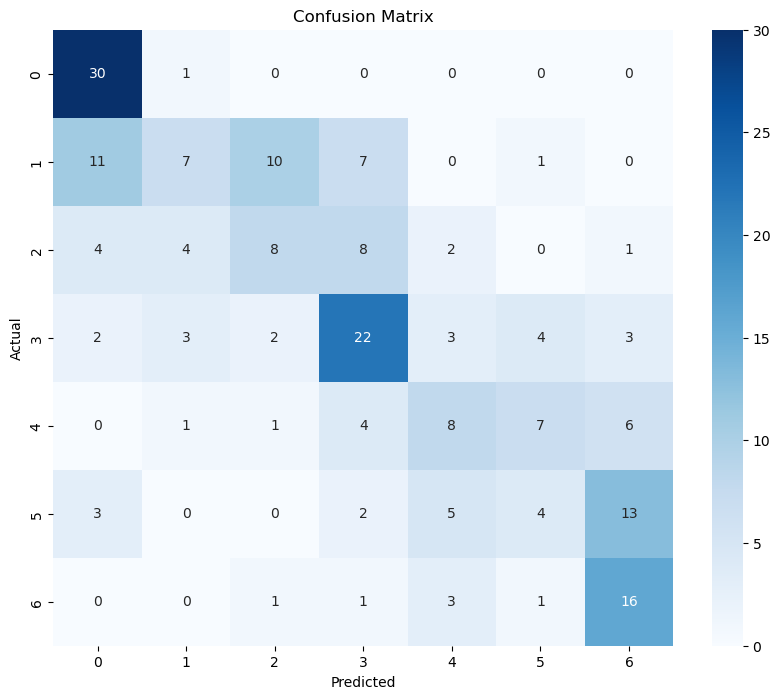

              precision    recall  f1-score   support

           0       0.60      0.97      0.74        31
           1       0.44      0.19      0.27        36
           2       0.36      0.30      0.33        27
           3       0.50      0.56      0.53        39
           4       0.38      0.30      0.33        27
           5       0.24      0.15      0.18        27
           6       0.41      0.73      0.52        22

    accuracy                           0.45       209
   macro avg       0.42      0.46      0.42       209
weighted avg       0.43      0.45      0.42       209



In [49]:
# Create a list in which the we are going to save the fit model for each user
grid_clf_rf_list = []
# Create a list to save the best score of the model for each user
best_scores_list = []

# for loop for each model 
for i, data in enumerate(data_list):   
    # Create the target values 
    target_TopYear_user = pd.Series(data["top_year"])
    target_TopYear_user.replace(year_mapping, inplace=True)
    #Create the feature_df with only numerical data    
    feature_df_user = data.drop(columns = ['release_date','uri','top_year','user'])
    # Split the dataset into testing and training part
    X_train_User, X_test_User, y_train_User, y_test_User = train_test_split(
        feature_df_user.values,
        target_TopYear_user.values,
        train_size = 0.7,
        shuffle = True,
    )
    # Create pipeline
    clf_rf = Pipeline([
        ('select', SelectKBest(score_func=f_regression)),
        ('rf', RandomForestClassifier())
    ])
    # Define a max number of iterations
    max_iter = 100
    # Use the RandomizedSearchCV

    grid_clf_rf = RandomizedSearchCV(
        estimator=clf_rf,
        param_distributions=param_dict_rf,
        scoring='f1_weighted',
        n_iter=max_iter,
        refit=True,
        cv=3,
        verbose=10
    )
    # Save the model in the grid_clf_rf_list
    grid_clf_rf_list.append(grid_clf_rf.fit(X_train_User, y_train_User))
    # Save the best results in the best_scores_list
    best_scores_list.append(grid_clf_rf.best_score_)
    print('Best hyper-parameters:', grid_clf_rf.best_params_)
    print('Best score:', grid_clf_rf.best_score_)
    
    # Predict categories for testing dataset RF
    y_pred_rf = grid_clf_rf.predict(X_test_User)
    y_pred_proba_rf = grid_clf_rf.predict_proba(X_test_User)

    # Create the confusion matrix
    cm_rf = confusion_matrix(y_test_User, y_pred_rf)
    disp_rf = ConfusionMatrixDisplay(
        confusion_matrix = cm_rf,
        display_labels = ['alpha', 'beta', 'delta', 'epsilon', 'gamma', 'dzeta']
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(classification_report(y_test_User, y_pred_rf))

In [50]:
# Print the best score for each user
combined_lists = zip(users_list, best_scores_list)
for position, values in enumerate(combined_lists):
    print(f"Best score: {values}")


Best score: ('delta', 0.3368622618818145)
Best score: ('gamma', 0.3363752807635812)
Best score: ('alpha', 0.41979453710036446)
Best score: ('dzeta', 0.5904063822119183)
Best score: ('beta', 0.5777819399535945)
Best score: ('epsilon', 0.4484481196524401)


In [51]:
# Assign the model of the list to each user
grid_clf_knn_delta = grid_clf_rf_list[0]
grid_clf_knn_gamma = grid_clf_rf_list[1]
grid_clf_knn_alpha = grid_clf_rf_list[2]
grid_clf_knn_zeta = grid_clf_rf_list[3]
grid_clf_knn_beta = grid_clf_rf_list[4]
grid_clf_knn_epsilon = grid_clf_rf_list[5]

## 7.  Reconstructing playlist

In [52]:
# Load the new dataset
data1 = pd.read_csv('data/mixed_playlist.csv')

# Filter unknown
df_unknown = data1[(data1["top_year"] == "unknown") | (data1["user"] == "unknown")]


In [53]:
# Prepoccess like the training dataset
# Use the label encoder to encode name, artiste and albums
df_unknown_copy = df_unknown.copy()
df_unknown_copy['name'] = label_encoder.fit_transform(df_unknown_copy['name'])
df_unknown_copy['artist'] = label_encoder.fit_transform(df_unknown_copy['artist'])
df_unknown_copy['album'] = label_encoder.fit_transform(df_unknown_copy['album'])
df_unknown_copy.drop(columns = ['release_date',"loudness", 'uri','user','top_year'],inplace = True)

In [54]:
#New prediction 
df_predictUser = grid_clf_knn.predict(df_unknown_copy.values)

In [55]:
df_predictUser2 = pd.Series(df_predictUser)

# Invert the user-year mapping dictionary
reverse_mapping_User = {v: k for k, v in user_mapping.items()}

user_predict = df_predictUser2.map(reverse_mapping_User)
user_predict.head()

0       beta
1       beta
2       beta
3    epsilon
4       beta
dtype: object

In [56]:
# Reset the index in order to assign values
df_resetIndex = df_unknown.reset_index(drop=True)

In [57]:
# Create the original dataframe
result_User = df_resetIndex.copy()
result_User["user"] = user_predict
result_User.head()

name  \
0  Variations on a Polish Theme, Op. 10: No. 5 An...   
1                                        For J√≥hann   
2  Concerto For Piano And Orchestra In G, Second ...   
3                     This Reminds You - Satie Remix   
4                                          Sull Lull   

                              album               artist release_date  \
0  Szymanowski: Piano Works, Vol. 2    Karol Szymanowski   06/12/1996   
1              Bach Reworks (Pt. 1)  V√≠kingur √ìlafsson   05/10/2018   
2                  Gershwin's World       Herbie Hancock   01/01/1998   
3                           Shadows    Remy Van Kesteren   15/02/2019   
4                             Madar         Jan Garbarek         1992   

    length  popularity  acousticness  danceability   energy  instrumentalness  \
0    76933          53         0.996         0.329  0.00695             0.866   
1   183773          22         0.994         0.629  0.09140             0.947   
2   551666          20         0.981         0.208  0.09940             0.919   
3   321146          26         0.870         0.258  0.05890             0.898   
4  1009706          27         0.913         0.502  0.30400             0.857   

   ...  speechiness    tempo  valence  time_signature  key  mode  \
0  ...       0.0448   70.295   0.2380               4   11     0   
1  ...       0.0406  111.454   0.2410               4    0     0   
2  ...       0.0342   62.543   0.0420               4    4     1   
3  ...       0.0381   98.874   0.0378               4    5     0   
4  ...       0.0473  105.740   0.5590               4    7     0   

                                    uri  release_year top_year     user  
0  spotify:track:3bcdLMrAxrfn5dxInjIdI2          1996  unknown     beta  
1  spotify:track:5BzsTKLEKQMDhPwbCZOrn5          2018  unknown     beta  
2  spotify:track:4rL06iWdtarlSqlxgU2N14          1998  unknown     beta  
3  spotify:track:3rruI72VDoIINSuAhryTOL          2019  unknown  epsilon  
4  spotify:track:3DzBR3hE8hzutFqlB1jjmk          1992  unknown     beta  

[5 rows x 22 columns]

In [58]:
# Use the label encoder to encode name, artist, and albums
df_unknown_year = result_User.copy()
df_unknown_year['name'] = label_encoder.fit_transform(df_unknown_year['name'])
df_unknown_year['artist'] = label_encoder.fit_transform(df_unknown_year['artist'])
df_unknown_year['album'] = label_encoder.fit_transform(df_unknown_year['album'])

# Filter by user
df_unknown_year_alpha = df_unknown_year[df_unknown_year["user"] == "alpha"].copy()
df_unknown_year_beta = df_unknown_year[df_unknown_year["user"] == "beta"].copy()
df_unknown_year_delta = df_unknown_year[df_unknown_year["user"] == "delta"].copy()
df_unknown_year_epsilon = df_unknown_year[df_unknown_year["user"] == "epsilon"].copy()
df_unknown_year_gamma = df_unknown_year[df_unknown_year["user"] == "gamma"].copy()
df_unknown_year_zeta = df_unknown_year[df_unknown_year["user"] == "dzeta"].copy()  

# Drop columns
columns_to_drop = ['release_date', 'loudness', 'uri', 'user', 'top_year']
df_unknown_year_alpha.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_beta.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_delta.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_epsilon.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_gamma.drop(columns=columns_to_drop, inplace=True)
df_unknown_year_zeta.drop(columns=columns_to_drop, inplace=True)

#Example for zeta
df_unknown_year_zeta

name  album  artist  length  popularity  acousticness  danceability  \
36    41     86      80  482826          28         0.434         0.464   
71    90     87      45  401266          38         0.258         0.671   

    energy  instrumentalness  liveness  speechiness    tempo  valence  \
36   0.630             0.820     0.129       0.0407  161.971    0.114   
71   0.617             0.855     0.883       0.0394  140.024    0.547   

    time_signature  key  mode  release_year  
36               4    6     0          1999  
71               4    8     1          2003

In [59]:
#New prediction 
df_predict_year_alpha = grid_clf_knn_alpha.predict(df_unknown_year_alpha.values)
df_predict_year_beta = grid_clf_knn_beta.predict(df_unknown_year_beta.values)
df_predict_year_delta = grid_clf_knn_delta.predict(df_unknown_year_delta.values)
df_predict_year_epsilon = grid_clf_knn_epsilon.predict(df_unknown_year_epsilon.values)
df_predict_year_gamma = grid_clf_knn_gamma.predict(df_unknown_year_gamma.values)
df_predict_year_zeta = grid_clf_knn_zeta.predict(df_unknown_year_zeta.values)

In [60]:
#Transform to series in order to reverse the mapping 
df_predict_ya = pd.Series(df_predict_year_alpha)
df_predict_yb = pd.Series(df_predict_year_beta)
df_predict_yd = pd.Series(df_predict_year_delta)
df_predict_ye = pd.Series(df_predict_year_epsilon)
df_predict_yg = pd.Series(df_predict_year_gamma)
df_predict_yz = pd.Series(df_predict_year_zeta)

# Invert the year mapping dictionary
reverse_mapping = {v: k for k, v in year_mapping.items()}

year_alpha = df_predict_ya.map(reverse_mapping)
year_beta = df_predict_yb.map(reverse_mapping)
year_delta = df_predict_yd.map(reverse_mapping)
year_epsilon = df_predict_ye.map(reverse_mapping)
year_gamma = df_predict_yg.map(reverse_mapping)
year_zeta = df_predict_yz.map(reverse_mapping)

In [61]:
df_final_year = result_User.copy()

# Filter by user and create copies 
df_final_year_alpha = df_final_year[df_final_year["user"] == "alpha"].copy()
df_final_year_beta = df_final_year[df_final_year["user"] == "beta"].copy()
df_final_year_delta = df_final_year[df_final_year["user"] == "delta"].copy()
df_final_year_epsilon = df_final_year[df_final_year["user"] == "epsilon"].copy()
df_final_year_gamma = df_final_year[df_final_year["user"] == "gamma"].copy()
df_final_year_zeta = df_final_year[df_final_year["user"] == "dzeta"].copy()

#Assign values Alpha
df_final_alpha = df_final_year_alpha.reset_index(drop=True)
df_final_alpha["top_year"] = year_alpha

#Assign values Beta
df_final_beta = df_final_year_beta.reset_index(drop=True)
df_final_beta["top_year"] = year_beta

#Assign values Delta
df_final_delta = df_final_year_delta.reset_index(drop=True)
df_final_delta["top_year"] = year_delta

#Assign values Epsilon
df_final_epsilon = df_final_year_epsilon.reset_index(drop=True)
df_final_epsilon["top_year"] = year_epsilon

#Assign values Gamma
df_final_gamma = df_final_year_gamma.reset_index(drop=True)
df_final_gamma["top_year"] = year_gamma

#Assign values Zeta
df_final_zeta = df_final_year_zeta.reset_index(drop=True)
df_final_zeta["top_year"] = year_zeta

In [62]:
#Concat the known data and predict data
df_known2 = data1[(data1["top_year"] != "unknown") | (data1["user"] != "unknown")]
df_final = pd.concat([df_known2,df_final_alpha,df_final_beta,df_final_delta,df_final_epsilon,df_final_gamma,df_final_zeta])

#Reset the index
df_final.reset_index(drop=True,inplace=True)


In [63]:
#Reconstruct all the files

# Users and their respective years
users_years = {
    'alpha': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'beta': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'delta': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'epsilon': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'gamma': ["2016", "2017", "2018", "2019", "2020", "2021", "2022"],
    'dzeta': ["2020", "2021", "2022"]  # Different years for dzeta
}


for user, years in users_years.items():
    # Loop through each year for the user
    for year in years:
        # Filter the DataFrame for the specific user and year
        df_user_year = df_final[(df_final['user'] == user) & (df_final['top_year'] == year)].copy()

        # Construct the file path
        file_path = f"new_data/recovered_data/{user}/user_{user}_year_{year}.csv"

        # Export to CSV
        df_user_year.to_csv(file_path, index=False)
        print(f"Exported {user}'s data for {year} to {file_path}")


Exported alpha's data for 2016 to new_data/recovered_data/alpha/user_alpha_year_2016.csv
Exported alpha's data for 2017 to new_data/recovered_data/alpha/user_alpha_year_2017.csv
Exported alpha's data for 2018 to new_data/recovered_data/alpha/user_alpha_year_2018.csv
Exported alpha's data for 2019 to new_data/recovered_data/alpha/user_alpha_year_2019.csv
Exported alpha's data for 2020 to new_data/recovered_data/alpha/user_alpha_year_2020.csv
Exported alpha's data for 2021 to new_data/recovered_data/alpha/user_alpha_year_2021.csv
Exported alpha's data for 2022 to new_data/recovered_data/alpha/user_alpha_year_2022.csv
Exported beta's data for 2016 to new_data/recovered_data/beta/user_beta_year_2016.csv
Exported beta's data for 2017 to new_data/recovered_data/beta/user_beta_year_2017.csv
Exported beta's data for 2018 to new_data/recovered_data/beta/user_beta_year_2018.csv
Exported beta's data for 2019 to new_data/recovered_data/beta/user_beta_year_2019.csv
Exported beta's data for 2020 to 